#  Telecom Churn - ML Group Case Study  

#### Submitted by: Raghu Hari
<hr noshade>

## <font color=grey> Business Problem:</font>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition
<hr noshade>


## <font color=grey> Business Objective:</font>
<ol><li>For many incumbent operators, retaining high profitable customers is the number one business goal.</li>
    <li>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</li>
    <li>The dataset contains customer-level information for a span of four consecutive months - June, July, August and     September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.</li>
<hr noshade>


## <font color=grey> Methodology Followed:</font>
<ul><li>CRISP - DM FRAMEWORK</li></ul>
This is a **classification problem** involving the following steps in building a model to determine the churn: 
   <ol><li>Data Sourcing</li>
       <li>Data Understanding</li>
       <li>Data Preparing</li>
       <li>Data cleaning and Transformation</li>
       <li>EDA (Univariate, Bivariate & Mutivariate Analysis)</li>
       <li>Model Preparation</li><ul><li>Data split into Train and test</li>
            <li>Data Standardization</li>
            <li>Class Imbalance corrections</li> 
            <li>PCA for feature reduction</li></ul>
       <li>Model Building</li>
       <li>Residual Analysis of the Train Data</li>
       <li>Making Predictions</li>
       <li>Model Evaluation</li>
       <li>Recommendations</li></ol>
<hr noshade>

## <font color=grey>Assumptions:<br></font>
<ol><li>if there is a missing value we mean that serice might not be used by the subscriber</li>
    <b><li>Data does not have Customer demographics data</li></b>
    <li>Only the data that is provided is used for analysis</li>
    <li>EDA is performed for the source data</li>
    <b><li>Following versions of the python libraries are used:</li></b>
- numpy version: 1.16.3
- pandas version: 0.24.2
- matplotlib version: 3.0.3
- seaborn version: 0.9.0
- sklearn version: 0.20.3
- imblearn version: 0.4.3
- xgboost version: 0.82
- lightgbm version: 2.2.3</li>
        
<hr noshade>

## 1. Data Sourcing:<br>
<mark style="background:black"><b><font color=white>**Reading the Source data from the files downloaded **</font> </b></mark> <br><br>
We have been provided with **telecom_churn_data.csv** for us to analysis.
<ul>
<li>It Contains all the relevent specification about the subscribers usage</li><b><li>Data does not have Customer demographics data</li></b>
    <li>Format of the Source file: csv</li><li>Name of the file: train</li><li>We are also given the **DATA DICTIONARY** for understanding the source data</li><li> All source file are downloaded and placed in Source_Files directory</li></ul><br>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import the required python libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
#sns.set(style = "whitegrid")

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.listdir("Source_Files/")

['telecom_churn_data.csv']

In [3]:
#Reading the data from Source_Files directory
usage_df = pd.read_csv('./Source_Files/telecom_churn_data.csv')#, keep_default_na=False)  

In [4]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))  

In [5]:
#check the column information
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
usage_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6   og_others_7   og_others_8   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6   ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.

### <mark style="background:GOLD"><b>REUSABLE FUNCTION DEFINITIONS</b></mark>  

In [7]:
def getshape(df):
    #Function to get the details of the dataframe
    printmd("**The given dataframe has the following # of rows, Columns and datatype after above operations:**")
    print("# of Rows: ",df.shape[0])
    print("# of Columns: ",df.shape[1])
    print("# of Float64 type Columns:",len(df.select_dtypes(include='float64').columns))
    print("# of int64 type Columns:",len(df.select_dtypes(include='int64').columns))
    print("# of datetime64 type Columns:", len(df.select_dtypes(include='datetime64').columns))
    print("# of object type Columns:", len(df.select_dtypes(include='object').columns))

def missing_zero_values(df):
        #FUNCTION TO CHECK THE NUMBER OF O'S AND MISSING VALUES FOR EACH COLUMN IN THE DATA FRAME
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table 

def tag_churners(df):
    # Function to tag the churners
    if ((df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0) & (df.vol_2g_mb_9 == 0) & (df.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
    
def getMissingCols(df,threshold):
    # Function to retun the columns with more than threshold  missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > threshold]),threshold))
    return missing.loc[missing > threshold]

def impute_nan_mean(df):
    # function to impute the columns
    missingnums=df 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i in list(missingnums.T.columns):
        if(usage_df[i].dtype == np.float64 or usage_df[i].dtype == np.int64 or usage_df[i].dtype == np.float32 or usage_df[i].dtype == np.int32 or usage_df[i].dtype == np.float16 or usage_df[i].dtype == np.int16):
            most_freq_var = usage_df[i].mean(skipna=True)#most_freq_var = df.groupby(i)[i].count().sort_values(ascending=False).index[0]
            df[i].fillna(most_freq_var,inplace=True)
        elif(usage_df[i].dtype == 'object'):
            pass
            #print(i,"not imputed as the value is not number typer")
def impute_nan(df):
    # function to impute the columns
    missingnums=df 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i in list(missingnums.T.columns): 
        if(usage_df[i].dtype == np.float64 or usage_df[i].dtype == np.int64 or usage_df[i].dtype == np.float32 or usage_df[i].dtype == np.int32 or usage_df[i].dtype == np.float16 or usage_df[i].dtype == np.int16):
            usage_df[i] = usage_df[i].fillna(0, inplace=False) 
        elif(usage_df[i].dtype == 'object'):
            pass
            print(i,"not imputed as the value is not number typer")
def impute_HV(df,cols):
    missingnums=df
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i in cols: 
        if(usage_df[i].dtype == np.float64 or usage_df[i].dtype == np.int64 or usage_df[i].dtype == np.float32 or usage_df[i].dtype == np.int32 or usage_df[i].dtype == np.float16 or usage_df[i].dtype == np.int16):
            usage_df[i] = usage_df[i].fillna(0, inplace=False) 
        elif(usage_df[i].dtype == 'object'):
            pass
            print(i,"not imputed as the value is not number typer")
            
            

def Check_transaction(df,month):
    #missing = getMissingCols(usage_df,70)
    if month =='6':
        missing_jun= usage_df[[col for col in df.T if col.endswith('_'+month)]]
        try:
            missing_june= df.copy()
            #date_of_last_rech_data_6_idx = missing_jun['date_of_last_rech_data_6'].isnull()
            #date_of_last_rech_6_idx = missing_jun['date_of_last_rech_6'].isnull()
            arpu_3g_6_index = missing_jun['arpu_3g_6'].isnull()
            #arpu_2g_6_index = missing_jun['arpu_2g_6'].isnull()
            night_pck_user_6_index = missing_jun['night_pck_user_6'].isnull()
            count_rech_2g_6_index = missing_jun['count_rech_2g_6'].isnull()
            count_rech_3g_6_index = missing_jun['count_rech_3g_6'].isnull()
            fb_user_6_index = missing_jun['fb_user_6'].isnull()
            if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
                print('The indexes for NULL values for month 6 are equal')
                return 1
            else:
                return 0
        except KeyError:
            print('The indexes for NULL values for month 6 are equal')
            return 1
    elif month =='7':
        missing_jul= usage_df[[col for col in df.T if col.endswith('_'+month)]]
        try:
                #missing_june= df.copy()
                #date_of_last_rech_data_7_idx = missing_jul['date_of_last_rech_data_7'].isnull()
                #date_of_last_rech_7_idx = missing_jul['date_of_last_rech_7'].isnull()
            arpu_3g_7_index = missing_jul['arpu_3g_7'].isnull()
                #arpu_2g_7_index = missing_jul['arpu_2g_7'].isnull()
            night_pck_user_7_index = missing_jul['night_pck_user_7'].isnull()
            count_rech_2g_7_index = missing_jul['count_rech_2g_7'].isnull()
            count_rech_3g_7_index = missing_jul['count_rech_3g_7'].isnull()
            fb_user_7_index = missing_jul['fb_user_7'].isnull()
            if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
                print('The indexes for NULL values for month 7 are equal')
                return 1
            else:
                return 0
        except KeyError:
                print('The indexes for NULL values for month 6 are equal')
                return 1
    else:
        missing_aug= usage_df[[col for col in df.T if col.endswith('_'+month)]]
        try:
            arpu_3g_8_index = missing_aug['arpu_3g_8'].isnull()
            night_pck_user_8_index = missing_aug['night_pck_user_8'].isnull()
            count_rech_2g_8_index = missing_aug['count_rech_2g_8'].isnull()
            count_rech_3g_8_index = missing_aug['count_rech_3g_8'].isnull()
            fb_user_8_index = missing_aug['fb_user_8'].isnull()
            if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
                print('The indexes for NULL values for month 8 are equal')
                return 1
            else:
                return 0
        except KeyError:
            print('The indexes for NULL values for month 8 are equal')
            return 1
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    columns = df.select_dtypes(exclude=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
def extractYearMonthDate(df):
    for column in df.select_dtypes(include=['datetime64']).columns:
        df[column + '_year'] = df[column].dt.year 
        df[column + '_month'] = df[column].dt.month 
        df[column + '_day'] = df[column].dt.day
        df.drop(columns=[column], axis=1, inplace=True)
    return df

In [8]:
def uniquevalues(df,threshold):
    #Function to determine the # of unique values in the data frame
    uniqueval=[]
    finalcols=[]
    nonunqiue=[]
    countval=[]
    col=list(df.columns)
    print("threshold=",threshold)
    #print(col) 
    for i in range(0,len(col)):
        col_name=col[i]
        #print("total unique values in the columns",i,": ", col[i])
        val=len(usage_df[col_name].unique())
        #print("total unique values in the columns",i,": ", val)
        if val <= threshold:
            uniqueval.append(val) 
            finalcols.append(col_name)
            #nonunqiue.append(usage_df[col_name].nunique())
            countval.append(usage_df[col_name].count())
        else:
            pass 
    df = pd.DataFrame(list(zip(finalcols,uniqueval,countval)),columns = ['Columna Name', '# of uniqueval','Count Val'] )#,index=index1)
    return df

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in,low,high ):
    num_col = list(df_in.select_dtypes(include=['float64','int32', 'int64']))   
    num_col.remove('churn')
    for col_name in num_col:
        Q1 = df_in[col_name].quantile(low/100)
        Q3 = df_in[col_name].quantile(high/100)
        IQR = Q3-Q1 #Interquartile range
        fence_low  = Q1-1.5*IQR
        fence_upper = Q1+1.5*IQR
        df_in = df_in[(df_in[col_name] >= (Q1-(1.5*IQR))) & (df_in[col_name] <= (Q3+(1.5*IQR)))]
       # df_o=df_in.copy()
    return df_in 
def get5pointtreatment(df):
    toReturn = df.describe().T
    toReturn['IQR'] = toReturn['75%'] -toReturn['25%']
    toReturn['upper fence'] = toReturn['75%'] + 3*toReturn['IQR']
    toReturn['lower fence'] = toReturn['25%'] + 3*toReturn['IQR']
    toReturn['is_outlier_is_upper'] = toReturn['max'] >   toReturn['upper fence']
    toReturn['is_outlier_is_lower'] = toReturn['min'] >   toReturn['lower fence']
    return toReturn

## 2. Data Understanding
<mark style="background:black"><b><font color=white>**Checking if the data is captured into dataframe properly & mentioning the raw analysis of the data**</font> </b></mark> 

In [9]:
#Determining the shape of the dataframe
usage_df.shape

(99999, 226)

In [10]:
#Determining the information of the dataframe
#usage_df.info(verbose=True)

In [11]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  99999
# of Columns:  226
# of Float64 type Columns: 179
# of int64 type Columns: 35
# of datetime64 type Columns: 0
# of object type Columns: 12


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b>
    <ul><li>In the given dataset we have <br><ul><li># of Float64 type Columns: 179</li><li># of int64 type Columns: 35</li>
        <li># of Object type Columns: 12</li>
        <li>Total # of Rows: 99999</li> </li> </ul> </ul></mark>

In [12]:
#viewing the top 5 row
usage_df.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>In the given data set mising data is shon as NaN</li>
   <li>Most of the data is numeric</li><li>No visible categorical data</li>  </ul>

## 3. Data Preparing
<mark style="background:black"><b><font color=white>**Preparing data for model building by applying Business rules**</font> </b></mark> 

### 3.1  Filter high-value customers

<ul><li>As mentioned above, you need to predict churn only for the high-value customers. 
<li>**Define high-value customers as follows:** Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)</li>
<li>After filtering the high-value customers, you should get about 29.9k rows)</li>
</ul>

###  3.1.1 Before we filter the high value customers we need to impute the following columns used for fltering 
<ul><li>total_rech_data_6 & total_rech_data_7</li>
    <li>av_rech_amt_data_6 & av_rech_amt_data_7 </li>
    <li>total_rech_amt_6 & total_rech_amt_7</li>
    </ul>

In [13]:
print("% of missing values in total_rech_data_6: ",round(sum(pd.isnull(usage_df['total_rech_data_6']))/(len(usage_df['total_rech_data_6']))*100,4),"%")
print("% of missing values in total_rech_data_7: ",round(sum(pd.isnull(usage_df['total_rech_data_7']))/(len(usage_df['total_rech_data_7']))*100,4),"%")
print("% of missing values in av_rech_amt_data_6: ",round(sum(pd.isnull(usage_df['av_rech_amt_data_6']))/(len(usage_df['av_rech_amt_data_6']))*100,4),"%")
print("% of missing values in av_rech_amt_data_7: ",round(sum(pd.isnull(usage_df['av_rech_amt_data_7']))/(len(usage_df['av_rech_amt_data_7']))*100,4),"%")
print("% of missing values in total_rech_amt_6: ",round(sum(pd.isnull(usage_df['total_rech_amt_6']))/(len(usage_df['total_rech_amt_6']))*100,4),"%")
print("% of missing values in total_rech_amt_7: ",round(sum(pd.isnull(usage_df['total_rech_amt_7']))/(len(usage_df['total_rech_amt_7']))*100,4),"%")

% of missing values in total_rech_data_6:  74.8467 %
% of missing values in total_rech_data_7:  74.4287 %
% of missing values in av_rech_amt_data_6:  74.8467 %
% of missing values in av_rech_amt_data_7:  74.4287 %
% of missing values in total_rech_amt_6:  0.0 %
% of missing values in total_rech_amt_7:  0.0 %


In [14]:
 usage_df.groupby('total_rech_data_6')['total_rech_data_6'].count().sort_values(ascending=False).index[0]
#df[var].fillna(most_freq_var,inplace=True)

1.0

In [15]:
columns_to_be_imputed = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7',
                         'total_rech_amt_6','total_rech_amt_7','total_rech_data_8','av_rech_amt_data_8','total_rech_amt_8']
impute_HV(usage_df,columns_to_be_imputed)  

In [16]:
print("% of missing values in total_rech_data_6: ",round(sum(pd.isnull(usage_df['total_rech_data_6']))/(len(usage_df['total_rech_data_6']))*100,4),"%")
print("% of missing values in total_rech_data_7: ",round(sum(pd.isnull(usage_df['total_rech_data_7']))/(len(usage_df['total_rech_data_7']))*100,4),"%")
print("% of missing values in av_rech_amt_data_6: ",round(sum(pd.isnull(usage_df['av_rech_amt_data_6']))/(len(usage_df['av_rech_amt_data_6']))*100,4),"%")
print("% of missing values in av_rech_amt_data_7: ",round(sum(pd.isnull(usage_df['av_rech_amt_data_7']))/(len(usage_df['av_rech_amt_data_7']))*100,4),"%")
print("% of missing values in total_rech_amt_6: ",round(sum(pd.isnull(usage_df['total_rech_amt_6']))/(len(usage_df['total_rech_amt_6']))*100,4),"%")
print("% of missing values in total_rech_amt_7: ",round(sum(pd.isnull(usage_df['total_rech_amt_7']))/(len(usage_df['total_rech_amt_7']))*100,4),"%")

% of missing values in total_rech_data_6:  0.0 %
% of missing values in total_rech_data_7:  0.0 %
% of missing values in av_rech_amt_data_6:  0.0 %
% of missing values in av_rech_amt_data_7:  0.0 %
% of missing values in total_rech_amt_6:  0.0 %
% of missing values in total_rech_amt_7:  0.0 %


### 3.1.2 Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

<ul><li>**Total recharge Amount = Total Voice recharge amount + Total Data recharge Amount**</li>
    <ul><li>Total Voice recharge Amount = total_rech_amt_6 + total_rech_amt_7</li><li>Total data recharge Amount = total_rech_data_x * av_rech_amt_data_x</li><li> x is 6th month and 7th month</ul> 
    <li>Filter data here average total recharge is greater than 70 Quartile </li></ul>

In [17]:
# creating two columns for data recharge amounts total_data_rech_amt_6 & total_data_rech_amt_7
usage_df['total_voice_rech_amt_6_7'] = (usage_df['total_rech_amt_6']+ usage_df['total_rech_amt_7'] )
usage_df['total_data_rech_amt_6'] = (usage_df['total_rech_data_6'] * usage_df['av_rech_amt_data_6'])
usage_df['total_data_rech_amt_7'] = (usage_df['total_rech_data_7'] * usage_df['av_rech_amt_data_7'])
usage_df['total_data_rech_amt_6_7'] = usage_df['total_data_rech_amt_6'] + usage_df['total_data_rech_amt_7']
# creating two columns for data recharge amounts total_data_rech_amt_6 & total_data_rech_amt_7
usage_df['total_data_rech_amt_8'] = (usage_df['total_rech_data_8'] * usage_df['av_rech_amt_data_8'])
usage_df['total_voice_rech_amt_8'] = usage_df['total_rech_amt_8'] 

### 3.1.3 Calculate 70 Percentile of Average Recharge Amount

In [18]:
#Calculating average of Voice and data recharge for 6th and 7th month
avg_rech_amt_6_7 = (usage_df.total_data_rech_amt_6_7+ usage_df.total_voice_rech_amt_6_7)/2 

In [19]:
#Calculating 70th quartile 
cutoff_rech_amt = np.percentile(avg_rech_amt_6_7,70)

print("70th percentile of the average data & voice amount recharge in the 6th and 7th months is - ", cutoff_rech_amt)

70th percentile of the average data & voice amount recharge in the 6th and 7th months is -  478.0


### 3.1.4 Filtering the High Value customers with above cutoff value

In [20]:
usage_df = usage_df[avg_rech_amt_6_7 > cutoff_rech_amt]

In [21]:
usage_df.drop("total_data_rech_amt_6_7",axis=1,inplace=True)
usage_df.drop("total_voice_rech_amt_6_7",axis=1,inplace=True)
usage_df.drop("total_voice_rech_amt_8",axis=1,inplace=True)

In [22]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29953
# of Columns:  229
# of Float64 type Columns: 182
# of int64 type Columns: 35
# of datetime64 type Columns: 0
# of object type Columns: 12


###  <mark style="background:Yellow"> **After we filter we are left with 29.5K records in the dataframe ** </mark>

## 3.2 Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: <ul><li>Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:</li>

<ul><li>total_ic_mou_9</li>
<li>total_og_mou_9</li>
<li>vol_2g_mb_9</li>
<li>vol_3g_mb_9</li></ul>


<li>After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).</li></ul>

## 3.2.1 Tag the Churn customers

In [23]:
usage_df["churn"] = usage_df.apply(tag_churners, axis=1)
usage_df.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [24]:
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(usage_df[usage_df.churn == 1]),usage_df.shape[0]))
print("% of High-value Churn customers in total customers : {}%".format(round(len(usage_df[usage_df.churn == 1])/usage_df.shape[0] *100,2)))
print("% of High-value loyal customers in total customers : {}%".format(round(len(usage_df[usage_df.churn == 0])/usage_df.shape[0] *100,2)))


There are 2433 users tagged as churners out of 29953 High-Value Customers.
% of High-value Churn customers in total customers : 8.12%
% of High-value loyal customers in total customers : 91.88%


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>Tagged the subsribers as churners</li>
   <li>Class is Highly Imbalanced</li>  </ul>

### 3.2.2 Removing the September month(_9) Features from the data fram as suggested

Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). 

In [25]:
sep_col_list = usage_df.filter(regex=('_9')).columns
usage_df.drop(sep_col_list,axis=1,inplace=True)
usage_df.drop('sep_vbc_3g',axis=1,inplace=True)
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29953
# of Columns:  175
# of Float64 type Columns: 138
# of int64 type Columns: 28
# of datetime64 type Columns: 0
# of object type Columns: 9


## 4. Data Cleaning & Transformation
<mark style="background:black"><b><font color=white>**Here will handle Missing Data & transform data to suit to Model Building**</font> </b></mark> 

<mark style="background:Gold"><b>According to the Exploratory Data Analysis steps we will need to perform the following steps to clean the data:</b><br>
<ol>
    <b><li>Fix missing value</li><li>Fix Rows and Columns</li><li>Filter duplicates</b></li> 
    </ol></mark>

### <mark style="background:black"><b><font color=white>4.1  Fix Missing Values</font></mark>


<mark style="background:Gold"><Font color=black><b>According to the Exploratory Data Analysis steps we will need to perform the following steps to clean the data:</b><br>


<mark style="background:Lime"><Font color=black><b>INSIGHTS INTO THE DATA:</b><br></mark>
    The following has been observed that if vol_2g_mb and vol_3g_mb is 0 then the following columns are either 0 or null:
   <b> <ul><li>**arpu_2g & arpu_3g** </ol><li>count_rech_3g & count_rech_2g  </li><li>fb_user</li><li>night_pck_user</li><li>av_rech_amt_data</li><li>date_of_last_rech_data</li><li>max_rech_data </li></ul></b>
<mark style="background:lightblue"><Font color=black><b>This means that if there is no data volume it means there is no recharge, activity or any transaction:</b><br>

In [26]:
#IMPUTING THE COLUMNS WITH 0
col_to_be_imputed = ['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
                     'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                     'max_rech_data_6','max_rech_data_7','max_rech_data_8']
for col in col_to_be_imputed:
    if col.endswith("_6"):
        usage_df[col]=np.where(((usage_df['vol_2g_mb_6'] == 0) & (usage_df['vol_3g_mb_6'] == 0) 
                                    & (usage_df[col].isnull()) ),0,usage_df[col]  )
    elif col.endswith("_7"):
        usage_df[col]=np.where(((usage_df['vol_2g_mb_7'] == 0) & (usage_df['vol_3g_mb_7'] == 0) 
                                    & (usage_df[col].isnull()) ),0,usage_df[col]  )
    else: 
        usage_df[col]=np.where(((usage_df['vol_2g_mb_8'] == 0) & (usage_df['vol_3g_mb_8'] == 0) 
                                    & (usage_df[col].isnull()) ),0,usage_df[col]  )



In [27]:
#IMPUTING THE COLUMNS WITH 0 ONLY IF AV_RECH AMT IS NULL
col_to_be_imputed=['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_2g_6',
                   'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                   'count_rech_2g_7','count_rech_2g_8']
for col in col_to_be_imputed:
    if usage_df[col].isnull().any():
        if col.endswith("_6"):
            usage_df[col]=np.where(((usage_df['vol_2g_mb_6'] == 0) & (usage_df['vol_3g_mb_6'] == 0) 
                                     ),0,usage_df[col]  )
        elif col.endswith("_7"):
                usage_df[col]=np.where(((usage_df['vol_2g_mb_7'] == 0) & (usage_df['vol_3g_mb_7'] == 0) 
                                            & (usage_df[col].isnull()) ),0,usage_df[col]  )
        else:
                usage_df[col]=np.where(((usage_df['vol_2g_mb_8'] == 0) & (usage_df['vol_3g_mb_8'] == 0) 
                                            & (usage_df[col].isnull()) ),0,usage_df[col]  )



<ol><li>**DROP THE ROWS WHICH HAVE THE FOLLOWING COLUMNS 0 ACCORDING TO THE PROBLEM STATEMENT**</li>
    <ol><li>vol_2g</li><li>vol_3g</li><li>total_og_mou</li><li>total_ic_mou</li></ol></ol>

In [28]:
usage_df=usage_df.loc[~((usage_df['vol_2g_mb_6']==0.00) & (usage_df['vol_2g_mb_8']==0.00) & (usage_df['vol_2g_mb_8']==0.00) &
        (usage_df['vol_3g_mb_6']==0.00) & (usage_df['vol_3g_mb_8']==0.00) & (usage_df['vol_3g_mb_8']==0.00) &
        (usage_df['total_og_mou_6']==0.00) & (usage_df['total_og_mou_7']==0.00) & (usage_df['total_og_mou_6']==0.00) &
        (usage_df['total_ic_mou_6']==0.00) & (usage_df['total_ic_mou_7']==0.00) & (usage_df['total_ic_mou_6']==0.00)),:] 

<mark style="background:Lime"><Font color=black><b>INSIGHTS INTO THE DATA:</b><br></mark>
    The following has been observed that the following columns are either 0 or 1:
   <b> <ul><li>**fb_user** </ol><li>night_pck_user</b>
<mark style="background:lightblue"><Font color=black><b>These columns will be treated as categorical and we will impute with -1:</b><br>

In [29]:
usage_df.fb_user_6.unique()

array([ 1., nan,  0.])

In [30]:
# IMPUTING THESE COLUMNS WITH -1
col_to_be_imputed=['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']
for col in col_to_be_imputed:
    usage_df[col].fillna(-1,inplace=True)

## <font color=Red>Iteration - 1</font>
<mark style="background:Olive"><b><font color=white>**Checking the columns & their missing values in %**</font> </b></mark> 


In [31]:
# Columns with missing values analysis
missing_zero_values(usage_df)

Your selected dataframe has 175 columns and 29845 Rows.
There are 95 columns that have missing values.


Zero Values  Missing Values  % of Total Values  Total Zero Missing Values  % Total Zero Missing Values Data Type
loc_og_t2m_mou_8             2514            1137                3.8                       3651                         12.2   float64
std_ic_t2m_mou_8             8123            1137                3.8                       9260                         31.0   float64
std_ic_t2t_mou_8            13272            1137                3.8                      14409                         48.3   float64
std_og_mou_8                 7399            1137                3.8                       8536                         28.6   float64
loc_ic_mou_8                 1123            1137                3.8                       2260                          7.6   float64
loc_og_t2f_mou_8            14333            1137                3.8                      15470                         51.8   float64
loc_ic_t2f_mou_8             9107            1137                3.8                      10244                         34.3   float64
loc_og_t2c_mou_8            21175            1137                3.8                      22312                         74.8   float64
loc_ic_t2m_mou_8             1308            1137                3.8                       2445                          8.2   float64
loc_og_mou_8                 2321            1137                3.8                       3458                         11.6   float64
loc_ic_t2t_mou_8             2487            1137                3.8                       3624                         12.1   float64
std_og_t2t_mou_8            13222            1137                3.8                      14359                         48.1   float64
og_others_8                 28538            1137                3.8                      29675                         99.4   float64
std_og_t2m_mou_8             9171            1137                3.8                      10308                         34.5   float64
spl_og_mou_8                12482            1137                3.8                      13619                         45.6   float64
std_og_t2f_mou_8            24499            1137                3.8                      25636                         85.9   float64
isd_og_mou_8                26807            1137                3.8                      27944                         93.6   float64
loc_og_t2t_mou_8             3825            1137                3.8                       4962                         16.6   float64
std_og_t2c_mou_8            28708            1137                3.8                      29845                        100.0   float64
std_ic_mou_8                 5359            1137                3.8                       6496                         21.8   float64
offnet_mou_8                 1223            1137                3.8                       2360                          7.9   float64
roam_og_mou_8               23472            1137                3.8                      24609                         82.5   float64
std_ic_t2f_mou_8            21140            1137                3.8                      22277                         74.6   float64
ic_others_8                 21300            1137                3.8                      22437                         75.2   float64
isd_ic_mou_8                22315            1137                3.8                      23452                         78.6   float64
roam_ic_mou_8               23446            1137                3.8                      24583                         82.4   float64
spl_ic_mou_8                26121            1137                3.8                      27258                         91.3   float64
std_ic_t2o_mou_8            28708            1137                3.8                      29845                        100.0   float64
onnet_mou_8                  2432            1137                3.8                       3569            

In [32]:
missingcol = getMissingCols(usage_df,50).to_frame() 

There are 0 features having more than 50% missing values/entries


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>There are no Columns with more than 50% missing data</li> 

### <font color=Red>Iteration - 2</font>
<mark style="background:Olive"><b><font color=white>**Checking the columns having more than 30% missing values**</font> </b></mark> 


In [33]:
missingcol_gt_1 = getMissingCols(usage_df,0.5).to_frame()  


There are 92 features having more than 0.5% missing values/entries


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>There are 0 Columns with more than 30% missing data</li> 

### <font color=Red>Iteration - 3</font>
Checking the column with more than 10 % of missing values

In [34]:
# Columns with missing values analysis
missing_zero_values(usage_df)

Your selected dataframe has 175 columns and 29845 Rows.
There are 95 columns that have missing values.


Zero Values  Missing Values  % of Total Values  Total Zero Missing Values  % Total Zero Missing Values Data Type
loc_og_t2m_mou_8             2514            1137                3.8                       3651                         12.2   float64
std_ic_t2m_mou_8             8123            1137                3.8                       9260                         31.0   float64
std_ic_t2t_mou_8            13272            1137                3.8                      14409                         48.3   float64
std_og_mou_8                 7399            1137                3.8                       8536                         28.6   float64
loc_ic_mou_8                 1123            1137                3.8                       2260                          7.6   float64
loc_og_t2f_mou_8            14333            1137                3.8                      15470                         51.8   float64
loc_ic_t2f_mou_8             9107            1137                3.8                      10244                         34.3   float64
loc_og_t2c_mou_8            21175            1137                3.8                      22312                         74.8   float64
loc_ic_t2m_mou_8             1308            1137                3.8                       2445                          8.2   float64
loc_og_mou_8                 2321            1137                3.8                       3458                         11.6   float64
loc_ic_t2t_mou_8             2487            1137                3.8                       3624                         12.1   float64
std_og_t2t_mou_8            13222            1137                3.8                      14359                         48.1   float64
og_others_8                 28538            1137                3.8                      29675                         99.4   float64
std_og_t2m_mou_8             9171            1137                3.8                      10308                         34.5   float64
spl_og_mou_8                12482            1137                3.8                      13619                         45.6   float64
std_og_t2f_mou_8            24499            1137                3.8                      25636                         85.9   float64
isd_og_mou_8                26807            1137                3.8                      27944                         93.6   float64
loc_og_t2t_mou_8             3825            1137                3.8                       4962                         16.6   float64
std_og_t2c_mou_8            28708            1137                3.8                      29845                        100.0   float64
std_ic_mou_8                 5359            1137                3.8                       6496                         21.8   float64
offnet_mou_8                 1223            1137                3.8                       2360                          7.9   float64
roam_og_mou_8               23472            1137                3.8                      24609                         82.5   float64
std_ic_t2f_mou_8            21140            1137                3.8                      22277                         74.6   float64
ic_others_8                 21300            1137                3.8                      22437                         75.2   float64
isd_ic_mou_8                22315            1137                3.8                      23452                         78.6   float64
roam_ic_mou_8               23446            1137                3.8                      24583                         82.4   float64
spl_ic_mou_8                26121            1137                3.8                      27258                         91.3   float64
std_ic_t2o_mou_8            28708            1137                3.8                      29845                        100.0   float64
onnet_mou_8                  2432            1137                3.8                       3569            

<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>There are still 98 columns with NULL Values</li>  

In [35]:
missingcol_gt_10 = getMissingCols(usage_df,0).to_frame()  

There are 92 features having more than 0% missing values/entries


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>Only las date reach data columns are null with beyind 45%</li>  

### <font color=Red>Iteration - 4</font>
Checking the column with more than  0.5% of missing values

In [36]:
# Columns with missing values analysis
missing_zero_values(usage_df)

Your selected dataframe has 175 columns and 29845 Rows.
There are 95 columns that have missing values.


Zero Values  Missing Values  % of Total Values  Total Zero Missing Values  % Total Zero Missing Values Data Type
loc_og_t2m_mou_8             2514            1137                3.8                       3651                         12.2   float64
std_ic_t2m_mou_8             8123            1137                3.8                       9260                         31.0   float64
std_ic_t2t_mou_8            13272            1137                3.8                      14409                         48.3   float64
std_og_mou_8                 7399            1137                3.8                       8536                         28.6   float64
loc_ic_mou_8                 1123            1137                3.8                       2260                          7.6   float64
loc_og_t2f_mou_8            14333            1137                3.8                      15470                         51.8   float64
loc_ic_t2f_mou_8             9107            1137                3.8                      10244                         34.3   float64
loc_og_t2c_mou_8            21175            1137                3.8                      22312                         74.8   float64
loc_ic_t2m_mou_8             1308            1137                3.8                       2445                          8.2   float64
loc_og_mou_8                 2321            1137                3.8                       3458                         11.6   float64
loc_ic_t2t_mou_8             2487            1137                3.8                       3624                         12.1   float64
std_og_t2t_mou_8            13222            1137                3.8                      14359                         48.1   float64
og_others_8                 28538            1137                3.8                      29675                         99.4   float64
std_og_t2m_mou_8             9171            1137                3.8                      10308                         34.5   float64
spl_og_mou_8                12482            1137                3.8                      13619                         45.6   float64
std_og_t2f_mou_8            24499            1137                3.8                      25636                         85.9   float64
isd_og_mou_8                26807            1137                3.8                      27944                         93.6   float64
loc_og_t2t_mou_8             3825            1137                3.8                       4962                         16.6   float64
std_og_t2c_mou_8            28708            1137                3.8                      29845                        100.0   float64
std_ic_mou_8                 5359            1137                3.8                       6496                         21.8   float64
offnet_mou_8                 1223            1137                3.8                       2360                          7.9   float64
roam_og_mou_8               23472            1137                3.8                      24609                         82.5   float64
std_ic_t2f_mou_8            21140            1137                3.8                      22277                         74.6   float64
ic_others_8                 21300            1137                3.8                      22437                         75.2   float64
isd_ic_mou_8                22315            1137                3.8                      23452                         78.6   float64
roam_ic_mou_8               23446            1137                3.8                      24583                         82.4   float64
spl_ic_mou_8                26121            1137                3.8                      27258                         91.3   float64
std_ic_t2o_mou_8            28708            1137                3.8                      29845                        100.0   float64
onnet_mou_8                  2432            1137                3.8                       3569            

In [37]:
missingcol_gt_1 = getMissingCols(usage_df,0.5).to_frame() 

There are 92 features having more than 0.5% missing values/entries


<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>There are 95 columns with missing data beyond 1%</li>  

In [38]:
#Imputing the column with 0 value
#print(missingcol_gt_1.index.to_frame() )
impute_nan(missingcol_gt_1) 
#for i in list(missingcol_gt_1.T.columns):
#    print(i)
#    most_freq_var = usage_df[i].mean(skipna=True)#.sort_values(ascending=False).index[0]
#    usage_df[i].fillna(most_freq_var,inplace=True)


date_of_last_rech_8 not imputed as the value is not number typer
last_date_of_month_8 not imputed as the value is not number typer


In [39]:
# Columns with missing values analysis
missing_zero_values(usage_df)

Your selected dataframe has 175 columns and 29845 Rows.
There are 5 columns that have missing values.


Zero Values  Missing Values  % of Total Values  Total Zero Missing Values  % Total Zero Missing Values Data Type
date_of_last_rech_8             0             570                1.9                        570                          1.9    object
last_date_of_month_8            0             158                0.5                        158                          0.5    object
date_of_last_rech_7             0              90                0.3                         90                          0.3    object
date_of_last_rech_6             0              70                0.2                         70                          0.2    object
last_date_of_month_7            0              20                0.1                         20                          0.1    object

<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>Only **Date** Columns are left to be imputed</li> 
<hr>

In [40]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29845
# of Columns:  175
# of Float64 type Columns: 138
# of int64 type Columns: 28
# of datetime64 type Columns: 0
# of object type Columns: 9


### <mark style="background:black"><b><font color=white>4.2 Fix Rows & Columns</font></mark>


<hr>
### <mark style="background:black"><b><font color=White>Renaming Column Names</font></mark>
<ol><li>rename the following columns jun_vbc_3g,jul_vbc_3g & aug_vbc_3g</li>
    <li>Convert the date object column to **YEAR, MONTH & DAY**</li>
    <li>Drop the original columns</li>
    <li>Impute the columns</li></ol>

In [41]:
# rename the following columns jun_vbc_3g,jul_vbc_3g & aug_vbc_3g
usage_df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8' }, inplace=True)
usage_df.rename(columns={'total_rech_data_6':'total_rech_num_data_6','total_rech_data_7':'total_rech_num_data_7','total_rech_data_8':'total_rech_num_data_8'}, inplace=True)
usage_df.rename(columns={'total_rech_amt_6':'total_voice_rech_amt_6','total_rech_amt_7':'total_voice_rech_amt_7','total_rech_amt_8':'total_voice_rech_amt_8'}, inplace=True)
usage_df.rename(columns={'total_rech_num_6':'total_rech_num_voice_6','total_rech_num_7':'total_rech_num_voice_7','total_rech_num_8':'total_rech_num_voice_8'}, inplace=True)


In [42]:
colsto_be_dropped=['date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_8',
'date_of_last_rech_7','date_of_last_rech_6']
usage_df.drop(colsto_be_dropped, axis = 1, inplace = True)

In [43]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29845
# of Columns:  169
# of Float64 type Columns: 138
# of int64 type Columns: 28
# of datetime64 type Columns: 0
# of object type Columns: 3


<hr>
### <mark style="background:black"><b><font color=White>Identifying any calculations within the data</font></mark>

In [44]:
def concatenate_list_data(list):
    result= ''
    for i in range(0,len(list)-1):
        if i == len(list)-2:
            result = result+ str(list[i])+str(" = ")+str(list[i+1])
        else:
            result = result+ str(list[i])+str(' + ')
            
    return result

In [45]:
def comparecoll(df,col):
    sumtot=0
    for i in range(0,len(col)-2):
        sumtot=sumtot+df[col[i]]
    a=round(sumtot)
    b=round(df[col[len(col)-1]])
    comparison_column = np.where((a==b)  | abs(a-b)==1,True,False)
    df['cols'] = comparison_column
    if df['cols'].unique():
        print(concatenate_list_data(col))
    return df

In [46]:
def incomingDataAnalysis(df):
    col_to_remove=[]
    for i in range(6,9,1):
        Incoming_data = df.filter(regex=('ic')).filter(regex=(str(i)))
        print('****************',i,'th Month Data Analysis**********************')
        printmd("<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>")
        loc_col= list(Incoming_data.filter(regex=('loc_ic_')).columns)
        std_col = list(Incoming_data.filter(regex=('std_ic_')).columns)
        #col_nam = ['loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou','ic_others','total_ic_mou']
        #fcolname=[str(x)+str('_') + str(i) for x in col_nam]
        comparecoll(Incoming_data,loc_col) 
        comparecoll(Incoming_data,std_col) 
        #comparecoll(Incoming_data,fcolname)
        col_to_remove.append(loc_col)
        col_to_remove.append(std_col)
        #col_to_remove.append(fcolname) 
    flat_list_ic=[x for x in [item for sublist in col_to_remove for item in sublist] if x not in ['loc_ic_mou_6','std_ic_mou_6','loc_ic_mou_7','std_ic_mou_7',
                                                                                                  'loc_ic_mou_8','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']]
    print('\n''\n'+"# of features that can be dropped ",len(flat_list_ic))
    print("List of features to be deleted")
    for i in np.unique(flat_list_ic):
        usage_df.drop(i, axis=1, inplace = True)
    print(flat_list_ic)

In [47]:
incomingDataAnalysis(usage_df)

**************** 6 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6 = loc_ic_mou_6
std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6 + std_ic_t2o_mou_6 = std_ic_mou_6
**************** 7 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_ic_t2t_mou_7 + loc_ic_t2m_mou_7 + loc_ic_t2f_mou_7 = loc_ic_mou_7
std_ic_t2t_mou_7 + std_ic_t2m_mou_7 + std_ic_t2f_mou_7 + std_ic_t2o_mou_7 = std_ic_mou_7
**************** 8 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_ic_t2t_mou_8 + loc_ic_t2m_mou_8 + loc_ic_t2f_mou_8 = loc_ic_mou_8
std_ic_t2t_mou_8 + std_ic_t2m_mou_8 + std_ic_t2f_mou_8 + std_ic_t2o_mou_8 = std_ic_mou_8


# of features that can be dropped  21
List of features to be deleted
['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8']


<mark style="background:Lime"><b>INSIGHTS in the Data:</b></mark> 
  <ol><li>total_ic_mou_6 is sum of incoming calls for local, STD, ISD, SPL & Others</li><li>Same holds good for 7th and 8th Months data set</li>  </ol>
 <hr>

In [48]:
def outgoingDataAnalysis(df):
    col_to_remove=[]
    flat_list_og=[]
    for i in range(6,9,1):
        outgoing_data = usage_df.filter(regex=('og')).filter(regex=(str(i)))
        print('****************',i,'th Month Data Analysis**********************')
        printmd("<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>")
        loc_col= list(outgoing_data.filter(regex=('loc_og_')).columns)
        std_col = list(outgoing_data.filter(regex=('std_og_')).columns)
        #col_nam = ['loc_og_mou','std_og_mou','isd_og_mou','spl_og_mou','og_others','total_og_mou']
       # fcolname=[str(x)+str('_') + str(i) for x in col_nam]
        comparecoll(outgoing_data,loc_col) 
        comparecoll(outgoing_data,std_col) 
        #comparecoll(outgoing_data,fcolname)
        col_to_remove.append(loc_col)
        col_to_remove.append(std_col)
        #col_to_remove.append(fcolname) 
    flat_list_og=[x for x in [item for sublist in col_to_remove for item in sublist] if x not in ['loc_og_mou_6','std_og_mou_6','loc_og_mou_7','std_og_mou_7','loc_og_mou_8','std_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8']]
    print('\n''\n'+"# of features that can be dropped ",len(flat_list_og))
    print("List of features to be deleted")
    for i in np.unique(flat_list_og):
        usage_df.drop(i, axis=1, inplace = True)
    print(np.unique(flat_list_og))

In [49]:
outgoingDataAnalysis(usage_df)

**************** 6 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6 + loc_og_t2c_mou_6 = loc_og_mou_6
std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6 + std_og_t2c_mou_6 = std_og_mou_6
**************** 7 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_og_t2t_mou_7 + loc_og_t2m_mou_7 + loc_og_t2f_mou_7 + loc_og_t2c_mou_7 = loc_og_mou_7
std_og_t2t_mou_7 + std_og_t2m_mou_7 + std_og_t2f_mou_7 + std_og_t2c_mou_7 = std_og_mou_7
**************** 8 th Month Data Analysis**********************


<mark style=background:Lightsalmon><font color=Maroon>**The Sum of the individual incoming columns equal to total. So only one of it can be used effectively**</font></mark>

loc_og_t2t_mou_8 + loc_og_t2m_mou_8 + loc_og_t2f_mou_8 + loc_og_t2c_mou_8 = loc_og_mou_8
std_og_t2t_mou_8 + std_og_t2m_mou_8 + std_og_t2f_mou_8 + std_og_t2c_mou_8 = std_og_mou_8


# of features that can be dropped  24
List of features to be deleted
['loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'std_og_t2c_mou_6' 'std_og_t2c_mou_7' 'std_og_t2c_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8']


<mark style="background:Lime"><b>INSIGHTS:</b></mark> 
  <ol><li>**total_og_mou_6** is sum of incoming calls for local, STD, ISD, SPL & Others</li><li>Same holds good for 7th and 8th Months data set</li>  </ol>
 <hr>

### <mark style="background:Lightsalmon"><b><font color=black>Dropped the columns with calculations</font></mark>
<hr>

### <mark style="background:black"><b> <font color=white>Identifying the columns with less than 4 unique values</font></mark>

In [50]:
uniquevalues_columns=uniquevalues(usage_df,4)
uniquevalues_columns

threshold= 4


Columna Name  # of uniqueval  Count Val
0              circle_id               1      29845
1         loc_og_t2o_mou               1      29845
2         std_og_t2o_mou               1      29845
3         loc_ic_t2o_mou               1      29845
4   last_date_of_month_6               1      29845
5   last_date_of_month_7               2      29825
6   last_date_of_month_8               2      29687
7       night_pck_user_6               3      29845
8       night_pck_user_7               3      29845
9       night_pck_user_8               3      29845
10             fb_user_6               3      29845
11             fb_user_7               3      29845
12             fb_user_8               3      29845
13                 churn               2      29845

<mark style="background:Yellow"><b>OBSERVATION OF THE DATA:</b></mark> 
  <ul><li>The above columns 25 columns can be dropped from the dataframe</li>  

In [51]:
#creating list from the unique columns dataframe determined in above step
uniquevalues_columns_to_be_removed=list(uniquevalues_columns['Columna Name'])
uniquevalues_columns_to_be_removed.remove("churn")
uniquevalues_columns_to_be_removed.remove( 'night_pck_user_6')
uniquevalues_columns_to_be_removed.remove('night_pck_user_7')
uniquevalues_columns_to_be_removed.remove('night_pck_user_8')
uniquevalues_columns_to_be_removed.remove('fb_user_6')
uniquevalues_columns_to_be_removed.remove('fb_user_7')
uniquevalues_columns_to_be_removed.remove('fb_user_8')


In [52]:
uniquevalues_columns_to_be_removed

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

In [53]:
for i in uniquevalues_columns_to_be_removed:
    usage_df.drop(i, axis=1, inplace = True)
print("**# of columns dropped:** ",len(uniquevalues_columns_to_be_removed))

**# of columns dropped:**  7


In [54]:
usage_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0      7000842753   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                 252                 252                 252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0               252.0               252.0               252.0        30.13         1.32         5.75        83.57       150.76       109.61     212.17     212.17     212.17     212.17     212.17     212.17               0.0               0.0               0.0             0             0             0            0            0            0             1             1             1            0            0            0        1.0        1.0        1.0  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350

### <mark style="background:Lightsalmon"><b><font color=black>Dropped the columns with least unique values</font></mark>
<hr>

In [55]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29845
# of Columns:  117
# of Float64 type Columns: 90
# of int64 type Columns: 27
# of datetime64 type Columns: 0
# of object type Columns: 0


### <mark style="background:black"><b> <font color=white>Dropping some more columns following problem statement</font></mark>

#### <mark style="background:Lime"><b>INSIGHTS in the Data:</b></mark> 

<ol><li>Feature `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9` are used to tag churners</li><li>So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis</li> <li>Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis</li><li>Also, dropping these individual columns will help in removing the multicollinearity</li>


In [56]:
# Let's drop below columns 

colsto_be_dropped = [ 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8','arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8','arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                  'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
              #'date_of_last_rech_8_day','date_of_last_rech_data_8_day','date_of_last_rech_7_day','date_of_last_rech_data_7_day','date_of_last_rech_6_day','date_of_last_rech_data_6_day'

]

usage_df.drop(colsto_be_dropped, axis = 1, inplace = True)

## Revenue columns having negative values to be dropped

In [57]:
# Let's delete the observations with negative arpu values. 

usage_df = usage_df[(usage_df['arpu_6'] >= 0) & 
                            (usage_df['arpu_7'] >= 0) & 
                            (usage_df['arpu_8'] >= 0)]

In [58]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29671
# of Columns:  105
# of Float64 type Columns: 81
# of int64 type Columns: 24
# of datetime64 type Columns: 0
# of object type Columns: 0


### <mark style="background:black"><b><font color=white>4.3 Filter Duplicates</font></mark>


In [59]:
#checking any Duplicates
usage_df.duplicated().any()

False

<mark style="background:Yellow"><b>Observation: NO Duplicate data in the data set</b></mark>

In [60]:
# Also we do not need the column 'mobile_number' during our analysis. It would serve no purpose.
# Lets drop the column

usage_df.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
usage_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0    197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61               0.0               0.0               0.0             0             0             0            0            0            0             1             1             1            0            0            0        1.0        1.0        1.0  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
7   1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                       5                       5                       7                    1580                     790                    3638            1580 

<hr >
## <mark style="background:black"><b><font color=white> Creating Derived Columns</i></b></font></mark>
**We will create the following new features which will be used for our analysis in predicting churn in a better way:
<ol><li>Monthly_Call_Ratio = total incoming Mou per month/total outgoing Mou per month</li>
    <li>% of Local MoUs in total calls</li>
    <li>% of std MoUs in total calls</li>
    <li>Total roaming MoU </li>
    <li>aon Binning</li>
<hr >

#### <mark style="background:Saddlebrown"><b><font color=white>Monthly Call Ratio feature creation</font></mark> 

In [61]:
#Creating new feature: Call_Ratio_6, Call_Ratio_7, Call_Ratio_8
# adding 1 to denominator to avoid dividing by 0  
for i in range(6,9):
    usage_df['Monthly_Call_Ratio_'+str(i)] = (usage_df['total_ic_mou_'+str(i)])/(usage_df['total_og_mou_'+str(i)]+1)

#### <mark style="background:Saddlebrown"><b><font color=white>Percentage of Local MoU</font></mark> 

In [62]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
 
for i in range(6,9):
    usage_df['%_loc_mou_'+str(i)] = ((usage_df['loc_og_mou_'+str(i)])+(usage_df['loc_ic_mou_'+str(i)]))/((usage_df['total_ic_mou_'+str(i)])+(usage_df['total_og_mou_'+str(i)]+1))

#### <mark style="background:Saddlebrown"><b><font color=white>Percentage of STD MoU</font></mark> 

In [63]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
 
for i in range(6,9):
    usage_df['%_std_mou_'+str(i)] = ((usage_df['std_og_mou_'+str(i)])+(usage_df['std_ic_mou_'+str(i)]))/((usage_df['total_ic_mou_'+str(i)])+(usage_df['total_og_mou_'+str(i)]+1))

In [64]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

usage_df[category_list] = usage_df[category_list].astype(int)

usage_df[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29671 entries, 0 to 99997
Data columns (total 6 columns):
night_pck_user_6    29671 non-null int64
night_pck_user_7    29671 non-null int64
night_pck_user_8    29671 non-null int64
fb_user_6           29671 non-null int64
fb_user_7           29671 non-null int64
fb_user_8           29671 non-null int64
dtypes: int64(6)
memory usage: 1.6 MB


#### <mark style="background:Saddlebrown"><b><font color=white>Creation of  **aon**(age of network) bin</font></mark> 

In [65]:
#Creating Aon Binning
usage_df['aon_bin'] = pd.cut(usage_df['aon'], range(0,usage_df['aon'].max(),365), labels=range(0,int(round(usage_df['aon'].max()/365))-1))
#usage_df.drop('aon', axis = 1, inplace = True)  

In [66]:
usage_df.head(2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8  %_loc_mou_6  %_loc_mou_7  %_loc_mou_8  %_std_mou_6  %_std_mou_7  %_std_mou_8 aon_bin
0   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0           0.0          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1              0.000000               0.00000              5.440000     0.000000     0.000000     0.844720     0.000000     0.000000     0.000000       2
7  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0           6.5          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.

In [67]:
#creating the dummy variables
dumm_creation_cols=['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

for i in dumm_creation_cols:
    fueltype_dummy= pd.get_dummies(usage_df[i],prefix=i)
    usage_df=pd.concat([usage_df, fueltype_dummy], axis = 1)  



In [68]:
usage_df.head(3)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8  %_loc_mou_6  %_loc_mou_7  %_loc_mou_8  %_std_mou_6  %_std_mou_7  %_std_mou_8 aon_bin  fb_user_6_-1  fb_user_6_0  fb_user_6_1  fb_user_7_-1  fb_user_7_0  fb_user_7_1  fb_user_8_-1  fb_user_8_0  fb_user_8_1  night_pck_user_6_-1  night_pck_user_6_0  night_pck_user_6_1  night_pck_user_7_-1  night_pck_user_7_0  night_pck_user_7_1  night_pck_user_8_-1  night_pck_user_8_0  night_pck_user_8_1
0   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1              0.000000              0.000000              5.440000     0.000000     0.000000     0.844720     0.000000     0.000000     0.000000       2             0            0            1             0            0            1             0            0            1                    0                   1                   0                    0                   1                   0                    0      

In [69]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29671
# of Columns:  132
# of Float64 type Columns: 84
# of int64 type Columns: 29
# of datetime64 type Columns: 0
# of object type Columns: 0


## 5. Exploratory Data Analysis
<mark style="background:black"><b><font color=white>**Analysing the data with graphs and plots**</font> </b></mark> 

**Since the main purpose of the business is to to understand the driving factors (or driver variables) behind customer churn, i.e. the variables which are strong indicators of churning.
So the important feature to consider is **CHURN** which will be used for analyis against the CATEGORICAL Variables and Measures** 

In [70]:
# Function copied from stack overflow for adding the datalabels to the Plots
def addDataLabels(ax,display):
    plt.margins(0.5, 0.5) 
    labels = plt.xticks() 


    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if display =='N':
            label = "{:.1f}".format(y_value)
        elif display == 'P':
            label = "{:.1f}%".format(y_value)
        else:
             label = "{:.1f}".format(y_value)
        
       # i = i+1 

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [71]:
#Function to plot the graphs for cateorical variables.
#It takes Categorical variable as input and plots the graph
def categoicalPlots(cat): 
    sns.set(style="darkgrid")
    plt.subplot(221)
    values = (usage_df[cat].value_counts(normalize=True)*100)#calculates category wise total charged off loans
    ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
    ax.set_title(cat+' '+'Histogram in % ',fontsize =15)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('% in total data', fontsize=12) 
    addDataLabels(ax,display= 'P')  
   
    plt.subplot(222)
    values = (usage_df.groupby([cat])['Total_rech_amt_good_phase8'].mean().sort_values(ascending = False))#calculates category wise total charged off loans
    ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
    ax.set_title(cat+' '+'vs Average rech amount',fontsize =15)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Average rech amount', fontsize=12) 
    addDataLabels(ax,display= 'N') 
    plt.tight_layout(pad=3.0)  
    
    plt.subplot(223)
    values = (usage_df.groupby([cat])['Total_rech_amt_action_phase8'].mean().sort_values(ascending = False))#calculates category wise total charged off loans
    ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
    ax.set_title(cat+' '+'vs Average rech amount',fontsize =15)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Average rech amount', fontsize=12) 
    addDataLabels(ax,display= 'N') 
    plt.tight_layout(pad=3.0)  
    
    plt.subplot(224)
    values = (usage_df["churn"].value_counts(normalize=True)*100) 
    ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
    ax.set_title(cat+' '+'Histogram in % ',fontsize =15)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('% in total data', fontsize=12) 
    addDataLabels(ax,display= 'P') 
    
    plt.subplots_adjust(hspace = 0.3)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()

In [72]:
#Function to plot the graphs for cateorical variables.
#It takes Categorical variable as input and plots the graph
def Multiplecatgoricalplots(cat): 
    counter = 1
    plt.figure(figsize = (15, 12))
    for i in cat:
        sns.set(style="darkgrid")
        plt.subplot(2, 3, counter)
        values = (usage_df[i].value_counts(normalize=True)*100)#calculates category wise total charged off loans
        ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
        ax.set_title(i+' '+'Histogram in % ',fontsize =15)
        ax.set_xlabel(i, fontsize=12)
        ax.set_ylabel('% in total data', fontsize=12) 
        addDataLabels(ax,display= 'P')  
        counter += 1 
        plt.subplots_adjust(hspace = 0.3)
        plt.subplots_adjust(wspace = 0.5)
    plt.show()

    del counter, ax

   

In [73]:
#Function to plot the graphs for measures.
#It takes measures as input and plots the graph
def measuresplot(var): 
    plt.figure(figsize = (20,5))  
    # Subplot - 1
    plt.subplot(1, 3, 1)
    #print("printing ditribution plot")
    #sns.distplot(usage_df[var], hist = True, kde = True, color = 'g')
    sns.distplot(usage_df[var],  kde=False, color="b")
    
    plt.subplot(132)
    sns.distplot(usage_df[var], hist=False, color="g", kde_kws={"shade": True}) 

    #print("printed ditribution plot")
    plt.title("Distribution Plot of " + var)
    plt.xlabel(var, labelpad = 15) 
    
    # Subplot - 2
    plt.subplot(133)
    #print("printing box plot")
    sns.set( palette="pastel")
    sns.boxplot(x = var, data = usage_df ,palette=["m", "g"])
    #print("printed box plot")
    plt.title("Box Plot of " + var)
    plt.xlabel(var, labelpad = 15) 
    plt.show()

In [74]:
def MonthWiseAvgInfo(colList):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(usage_df[colList].mean())
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
    plt.title("Month Wise", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. of the feature")
    plt.show()

In [75]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# var                -      The series/variable to be plotted along the y-axis.

def bivariateplots(var):
    
    plt.figure(figsize = (15, 8)) 

    
    ic_col = usage_df.filter(regex =var).columns
    #print("\nData Visualization of churn vs " + var)

    # Subplot - 1
    plt.subplot(2, 3, 1)

    sns.boxplot(x = 'churn', y = var + "_6", hue = "churn", data = usage_df, showfliers = False)
    #sns.barplot(x = x_axis, y = var + "_6", hue = "churn", data = telecom_data)
    plt.title("Box Plot of " +  str(ic_col[0]))
    plt.xlabel("Churn", labelpad = 15)  

    # Subplot - 2
    plt.subplot(2, 3, 2)

    sns.boxplot(x = 'churn', y = var + "_7", hue = "churn", data = usage_df, showfliers = False)
    #sns.barplot(x = x_axis, y = var + "_7", hue = "churn", data = telecom_data)
    plt.title("Box Plot of " +  str(ic_col[1]))
    plt.xlabel('Churn', labelpad = 15)  
    
    # Subplot - 3
    plt.subplot(2, 3, 3)

    sns.boxplot(x = 'churn', y = var + "_8", hue = "churn", data = usage_df, showfliers = False)
    #sns.barplot(x = x_axis, y = var + "_8", hue = "churn", data = telecom_data)
   
    plt.title("Box Plot of " +  str(ic_col[2]))
    plt.xlabel('churn', labelpad = 15)  
    
    # Plotting Avg. total monthly incoming MOU vs AON
    

    temp_df = pd.DataFrame(usage_df.groupby('aon_bin',as_index=False)[ic_col].mean())
    #temp_df['aon_bin']=pd.to_numeric(usage_df['aon_bin'])
    temp_df
 
 #    print("\nData Visualization of AGE on Network vs " + var)

    plt.subplot(2, 3, 4)   
    sns.lineplot(x="aon_bin", y=ic_col[0],data=temp_df)  
    plt.subplot(2, 3, 5)   
    sns.lineplot(x="aon_bin", y=ic_col[1],data=temp_df)  
    plt.subplot(2, 3, 6)   
    sns.lineplot(x="aon_bin", y=ic_col[2],data=temp_df)  
    
    plt.subplots_adjust(hspace = 0.4)
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

### <mark style="background:black"><b><font color=white>5.1 Univariate Analysis</font></mark>


### <mark style="background:gold"><b><font color=black>5.1.1 Univariate analysis of Categorial Variables</font></mark>


In [76]:
#Determining the values:
printmd("The list of unique values in the column **night_pck_user_6**")
print(usage_df["night_pck_user_6"].value_counts())
printmd("The list of unique values in the column **night_pck_user_7**")
print(usage_df["night_pck_user_7"].value_counts())
printmd("The list of unique values in the column **night_pck_user_8**")
print(usage_df["night_pck_user_8"].value_counts())

The list of unique values in the column **night_pck_user_6**

 0    16253
-1    13014
 1      404
Name: night_pck_user_6, dtype: int64


The list of unique values in the column **night_pck_user_7**

 0    16588
-1    12708
 1      375
Name: night_pck_user_7, dtype: int64


The list of unique values in the column **night_pck_user_8**

 0    15565
-1    13766
 1      340
Name: night_pck_user_8, dtype: int64


In [77]:
#Determining the values:
printmd("The list of unique values in the column **fb_user_6**")
print(usage_df["fb_user_6"].value_counts())
printmd("The list of unique values in the column **fb_user_7**")
print(usage_df["fb_user_7"].value_counts())
printmd("The list of unique values in the column **fb_user_8**")
print(usage_df["fb_user_8"].value_counts())

The list of unique values in the column **fb_user_6**

 1    15433
-1    13014
 0     1224
Name: fb_user_6, dtype: int64


The list of unique values in the column **fb_user_7**

 1    15634
-1    12708
 0     1329
Name: fb_user_7, dtype: int64


The list of unique values in the column **fb_user_8**

 1    14269
-1    13766
 0     1636
Name: fb_user_8, dtype: int64


<mark style="background:lightgreen"><b><ol><li>**The above analysis suggest that Night_pck_user and fb_user are two features which have values 0 and 1**</li><li>These columns are used as ordinal categorical features</mark>

###### <hr noshade>
#### <mark style="background:yellow"><b>a. Analysis of the Variable : <i>night_pck_user</i></b></mark>

<Figure size 1080x1080 with 0 Axes>

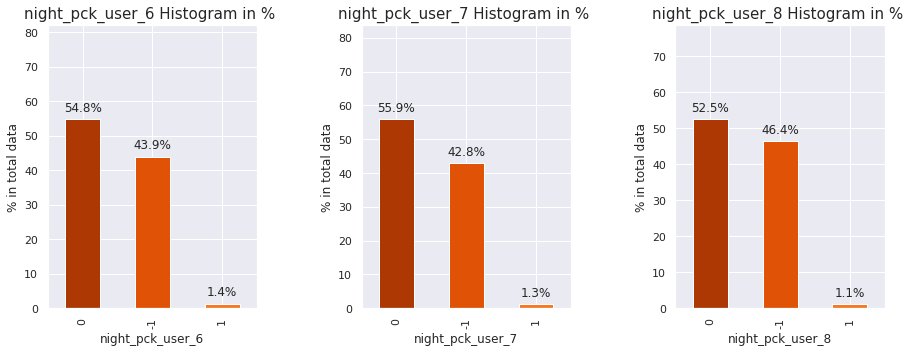

In [78]:
# Analysis of the night_pck_user_6
cat = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'] 
plt.figure(figsize=(15,15))
Multiplecatgoricalplots(cat)

#### <mark style="background:LightGreen"><b>===================a. Observation on **Night_Pck_user**:===================</b><br>
    1. Almost 99% of users are not using nightly pack in all the 3 months.  

<hr noshade>
#### <mark style="background:yellow"><b>b. Analysis of the Variable : <i>fb_pck_user</i></b></mark>

<Figure size 1080x1080 with 0 Axes>

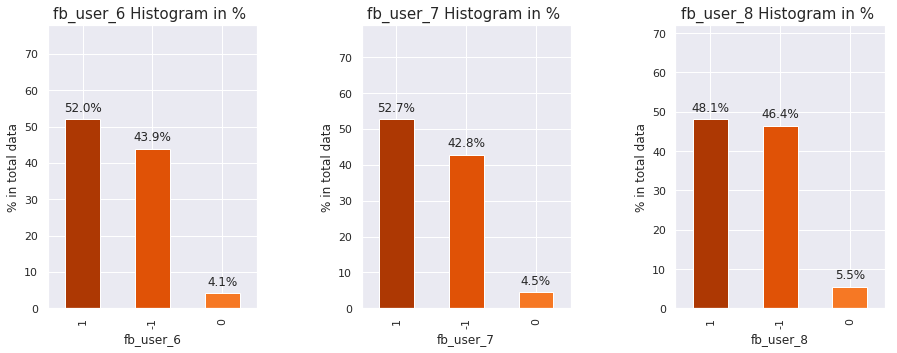

In [79]:
# Analysis of the night_pck_user_6
cat = ['fb_user_6', 'fb_user_7', 'fb_user_8'] 
plt.figure(figsize=(15,15))
Multiplecatgoricalplots(cat)

#### <mark style="background:LightGreen"><b>===================a. Observation on **Night_Pck_user**:===================</b><br>
    1. users are using facebook(fb) in equal percentage 
    2. it is observed that as the month increases, there is a decline in the fb usage. 

<hr noshade>
#### <mark style="background:yellow"><b>c. Analysis of the Variable : <i>churn</i></b></mark>

<Figure size 1080x1080 with 0 Axes>

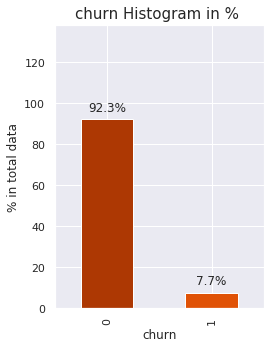

In [80]:
# Analysis of the night_pck_user_6
cat = ['churn'] 
plt.figure(figsize=(15,15))
Multiplecatgoricalplots(cat) 

### <mark style="background:gold"><b><font color=black>5.1.2 Univariate analysis of Numeric Variables</font></mark>


<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>arpu_6,arpu_7,arpu_8</i></b></mark>

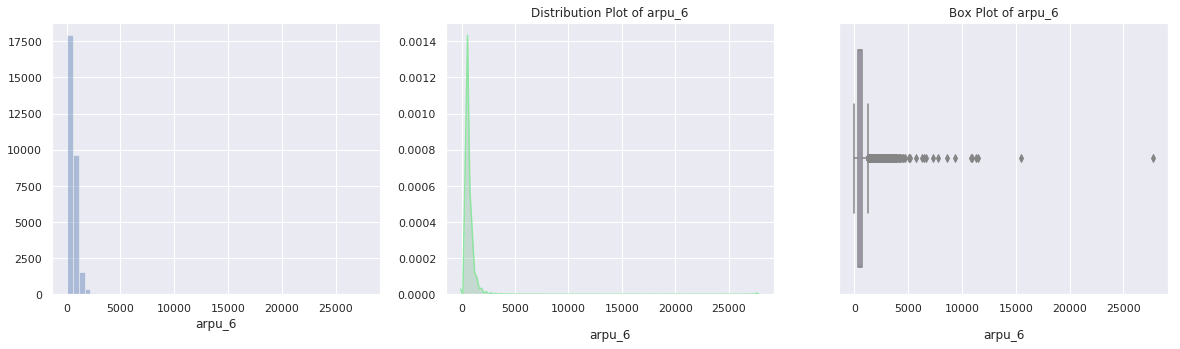

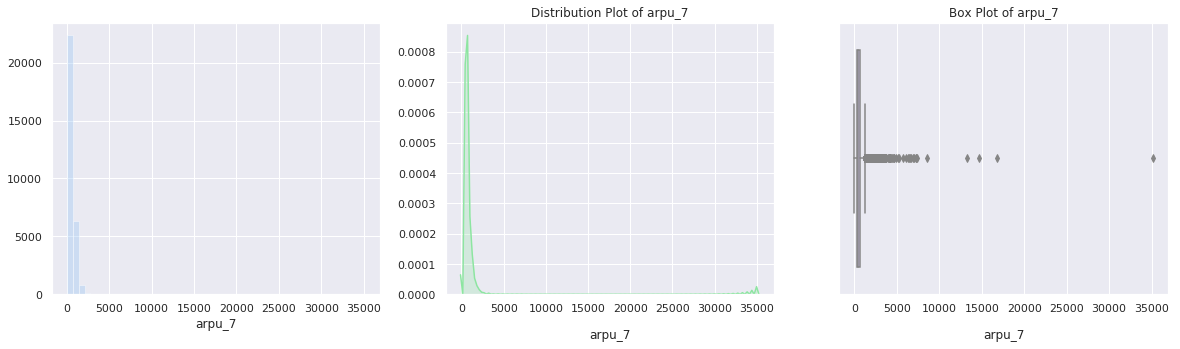

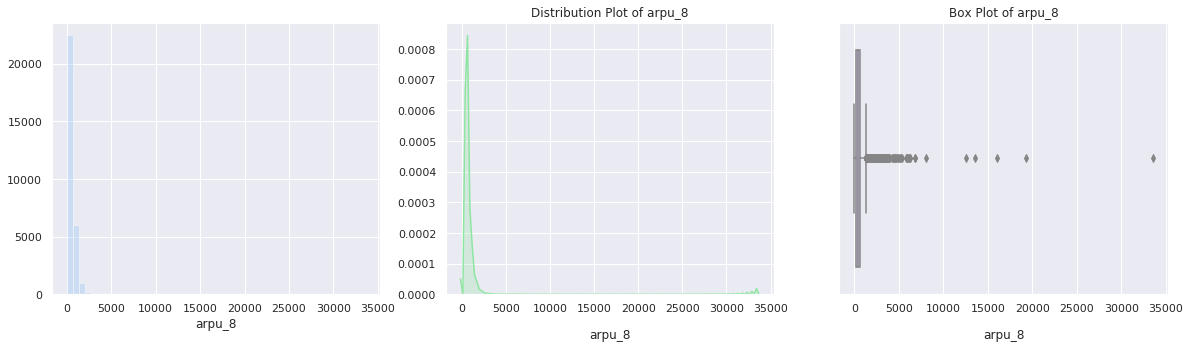

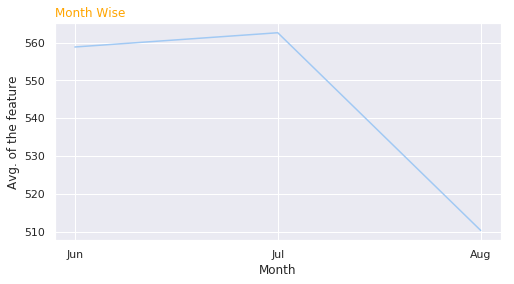

In [81]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='arpu').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **arpu**:===================</b><br>
    1. We can see the outliers in the data 
    2. Though slight increase in ARPU from June to July there is a drastic decrease in Aug

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>onnet_mou_6,onnet_mou_7,onnet_mou_8</i></b></mark>

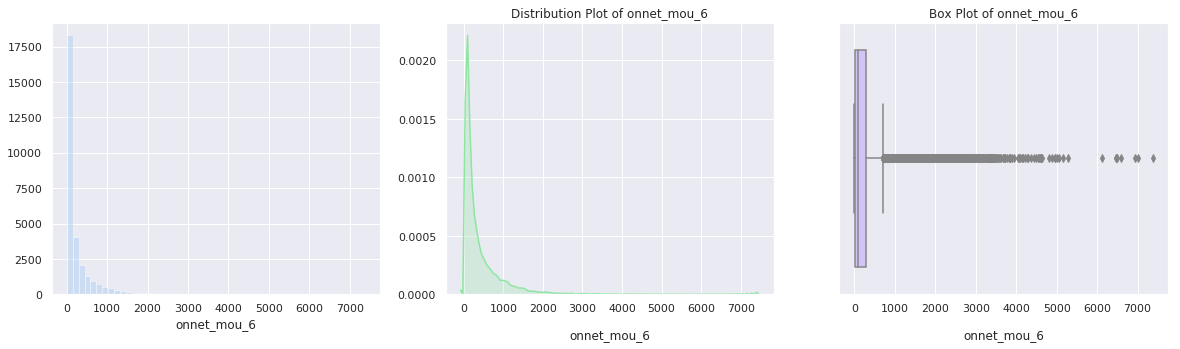

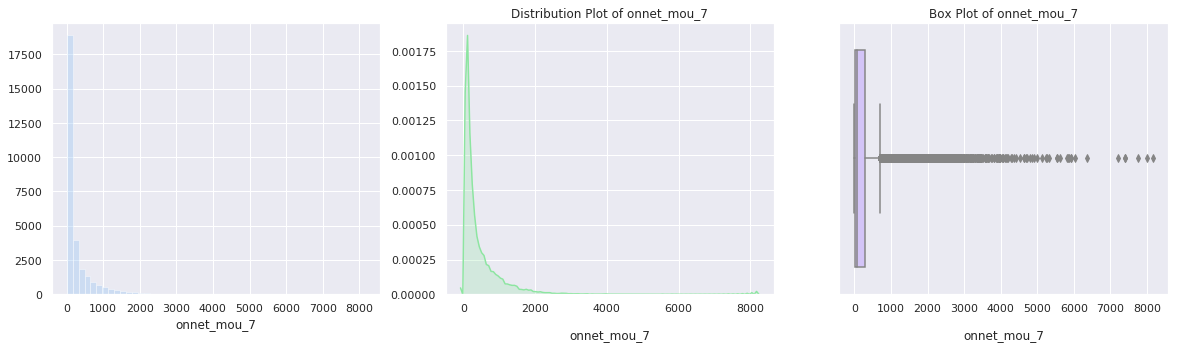

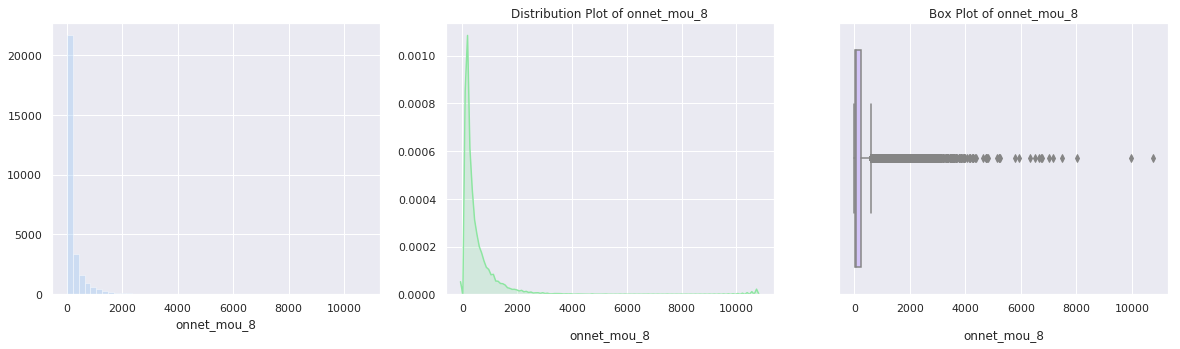

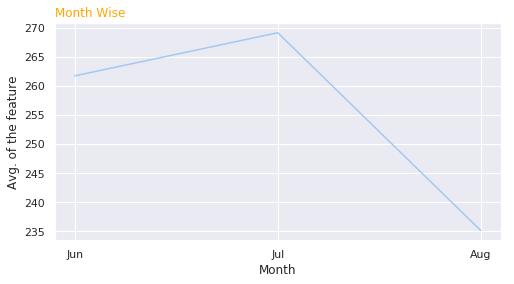

In [82]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='onnet').columns)
for i in var:
    measuresplot(i)

MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **ONNET**:===================</b><br>
    1. We can see the outliers in the data 
    2. Though slight increase in ONNET from June to July there is a drastic decrease in Aug

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>LOC_OG_MOU</i></b></mark>

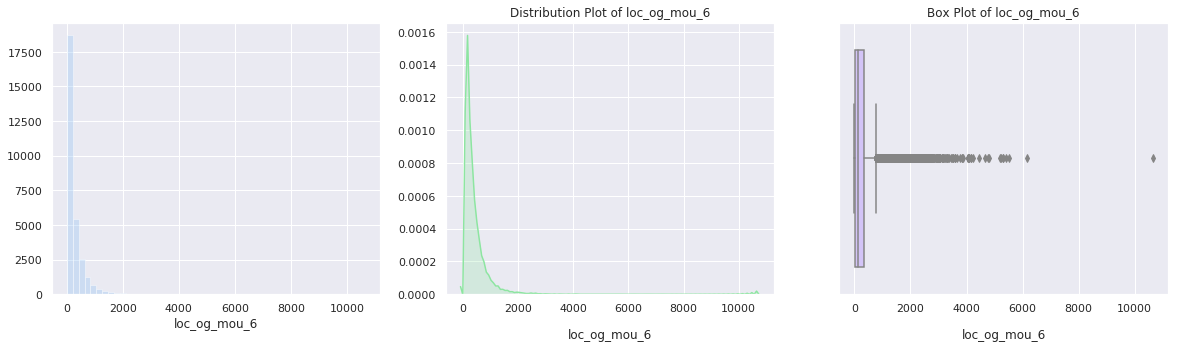

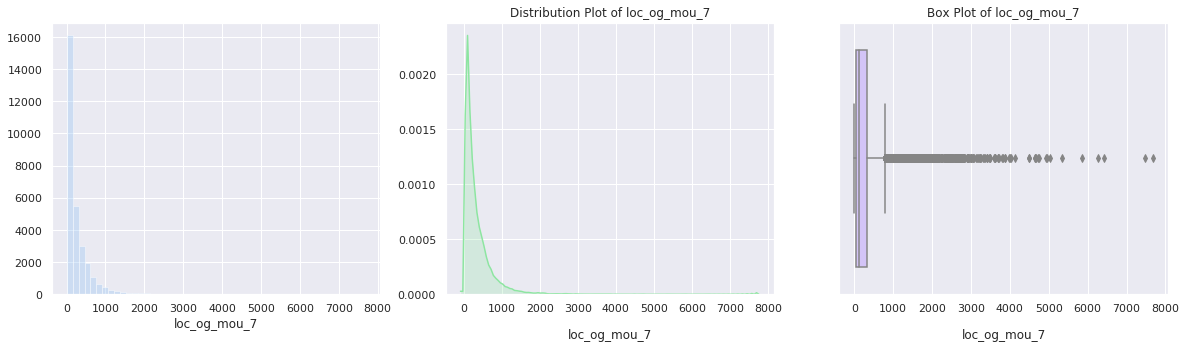

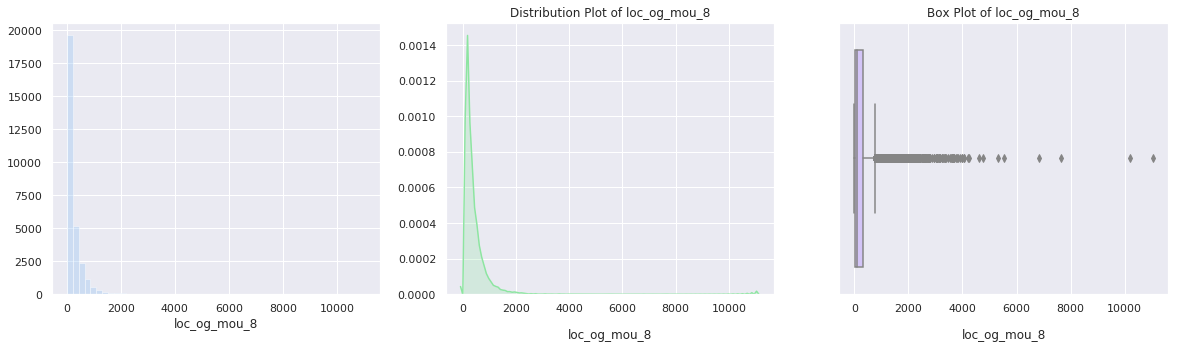

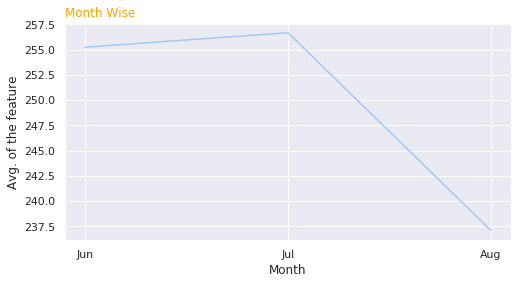

In [83]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='loc_og_mou').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **loc_og_mou**:===================</b><br>
    1. We can see the outliers in the data 
    2. Though slight increase in LOC_OG_MOU from June to July there is a drastic decrease in Aug

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>STD_OG_MOU</i></b></mark>

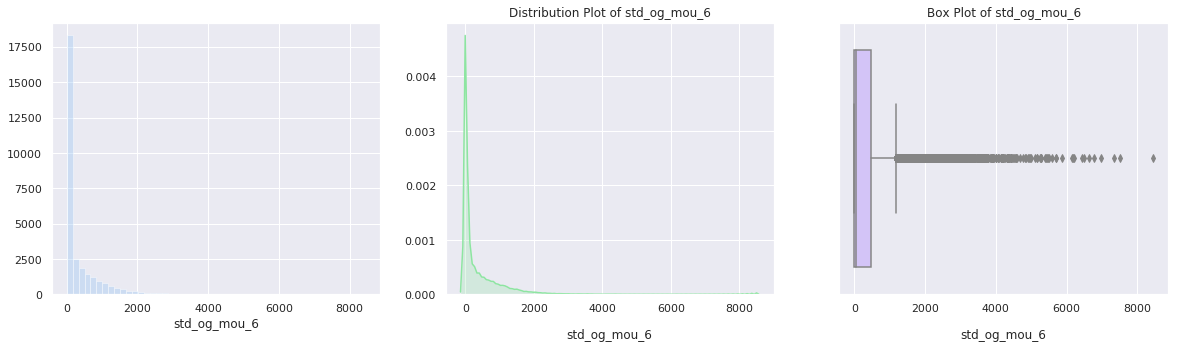

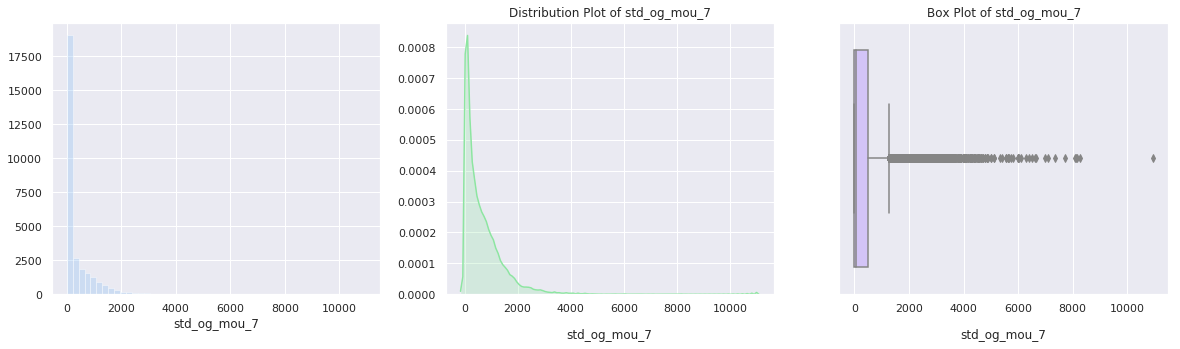

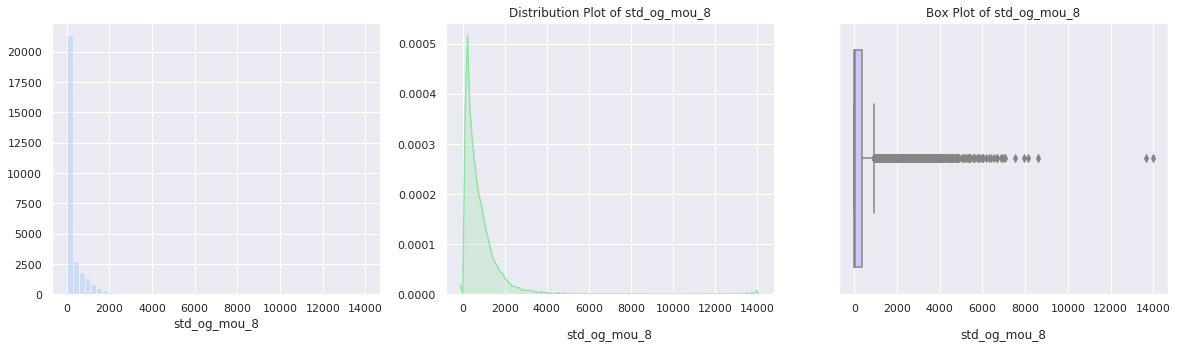

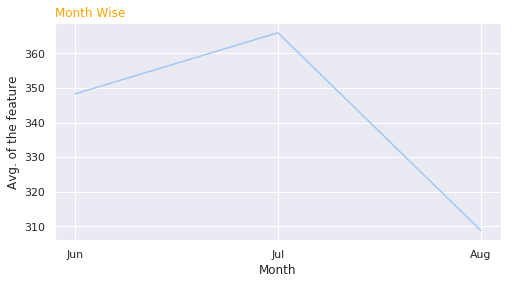

In [84]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='std_og').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)


#### <mark style="background:LightGreen"><b>===================Observation on **std_og_mou**:===================</b><br>
    1. We can see the outliers in the data 
    2. Though slight increase in LOC_OG_MOU from June to July there is a drastic decrease in Aug

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>vol_3g_mb</i></b></mark>

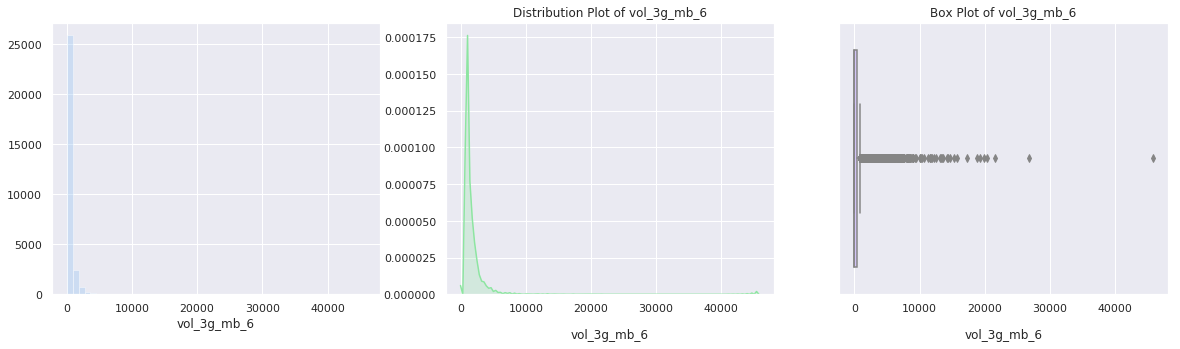

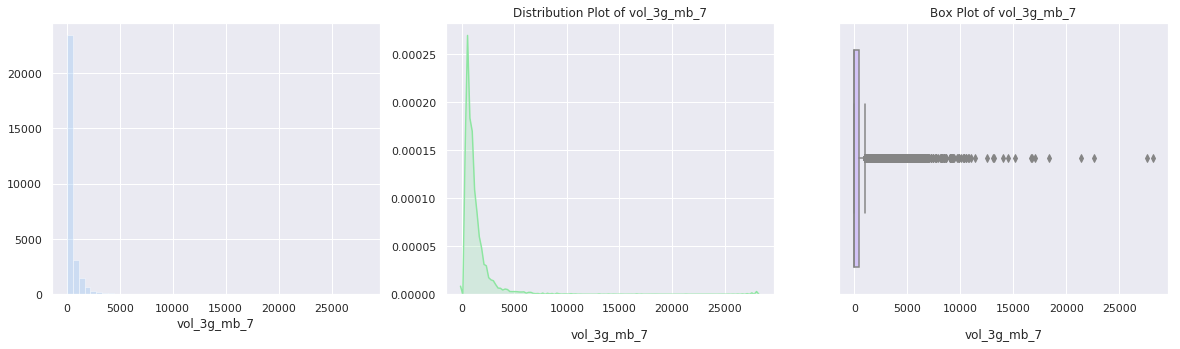

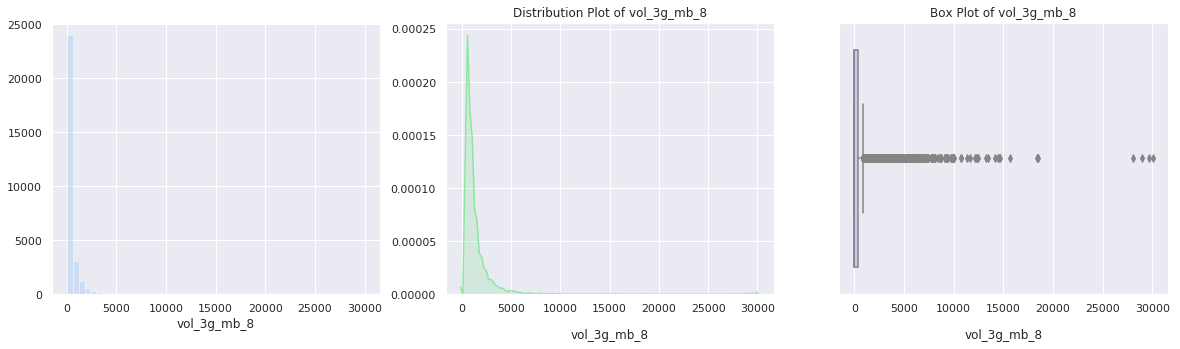

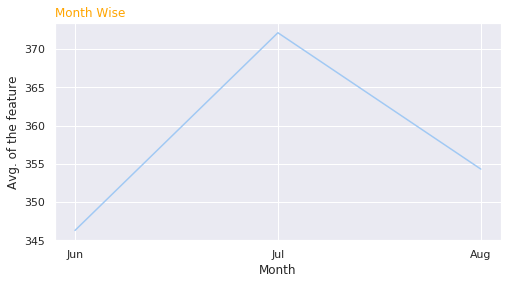

In [85]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='vol_3g_mb').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **vol_3g_mb**:===================</b><br>
    1. We can see the outliers in the data 
    2. Though slight increase in vol_3g_mb from June to July there is a drastic decrease in Aug

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>Monthly_Call_Ratio</i></b></mark>

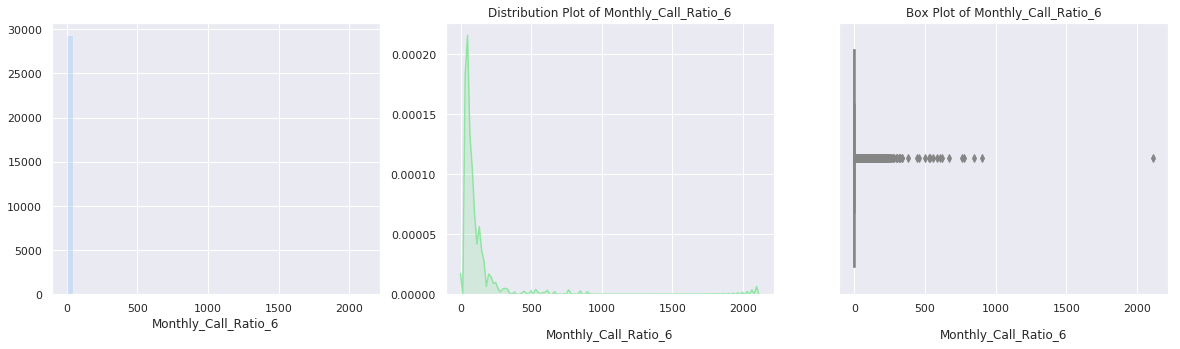

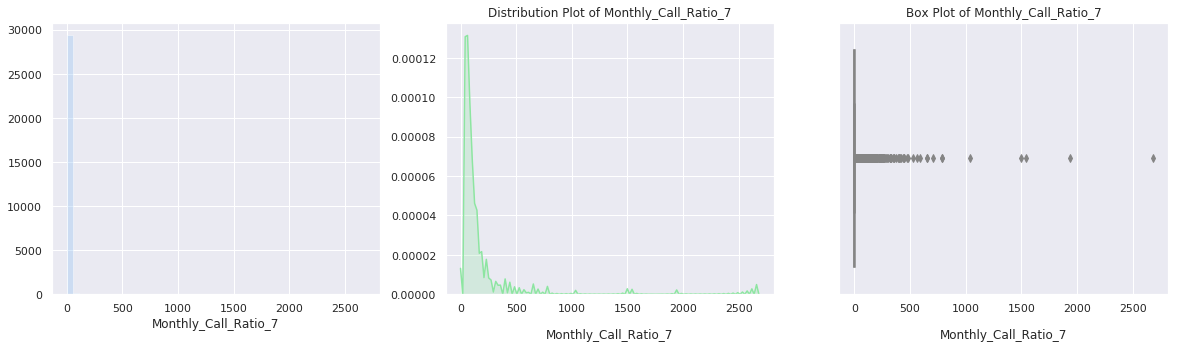

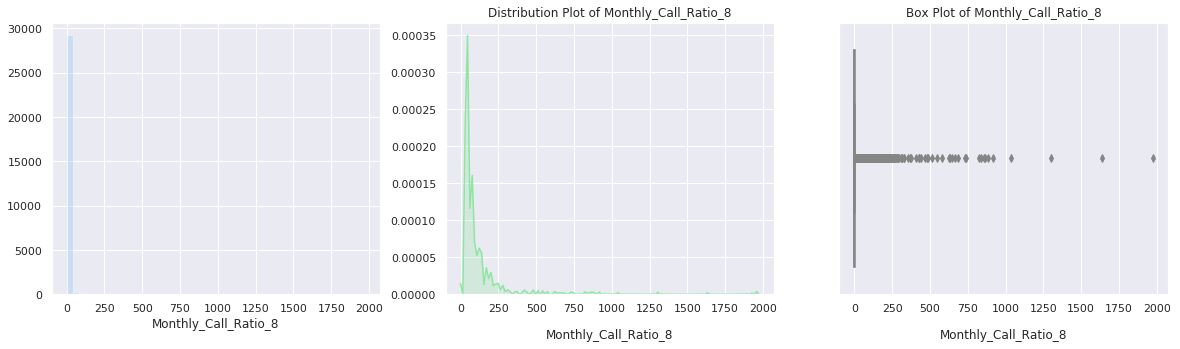

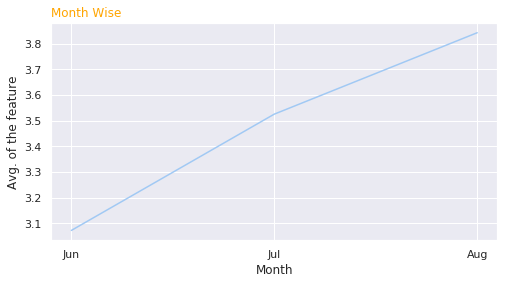

In [86]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='Monthly_Call_Ratio').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **Monthly call Ratio**:===================</b><br>
    1. Most of the numeric alues are almost distributed uniform
    2. TOo Many otlier are there in the data
    3. Monthly Call ratio can be seen increasing

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>%_loc_mou</i></b></mark>

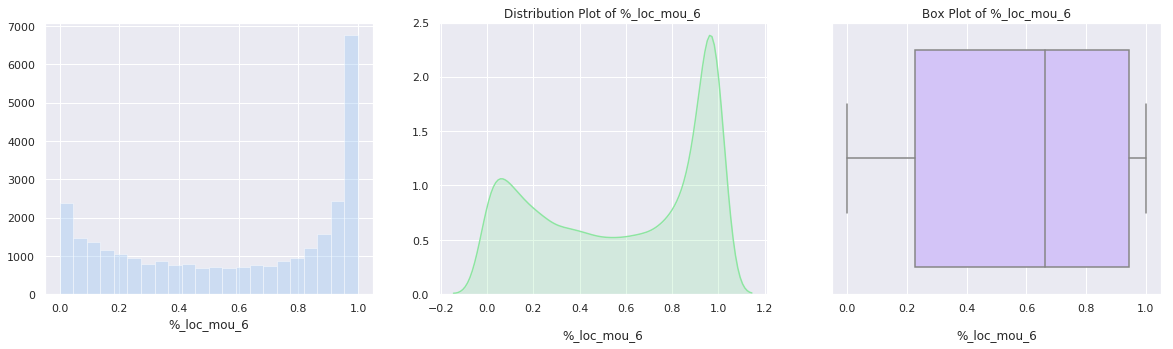

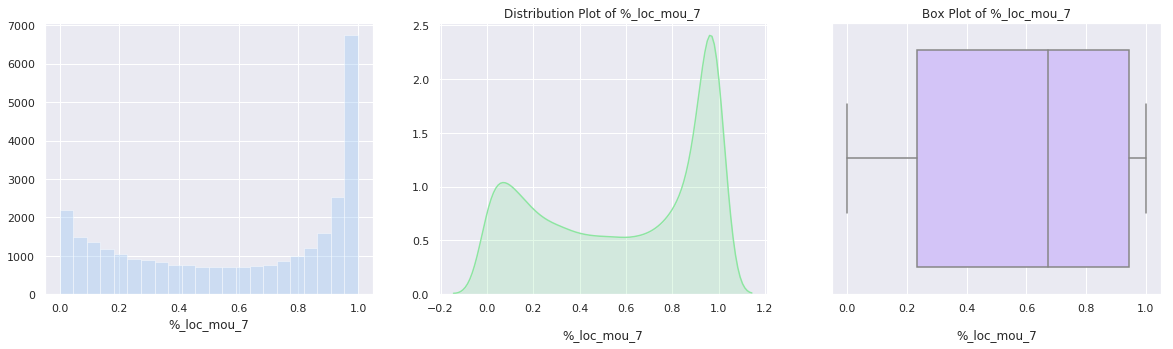

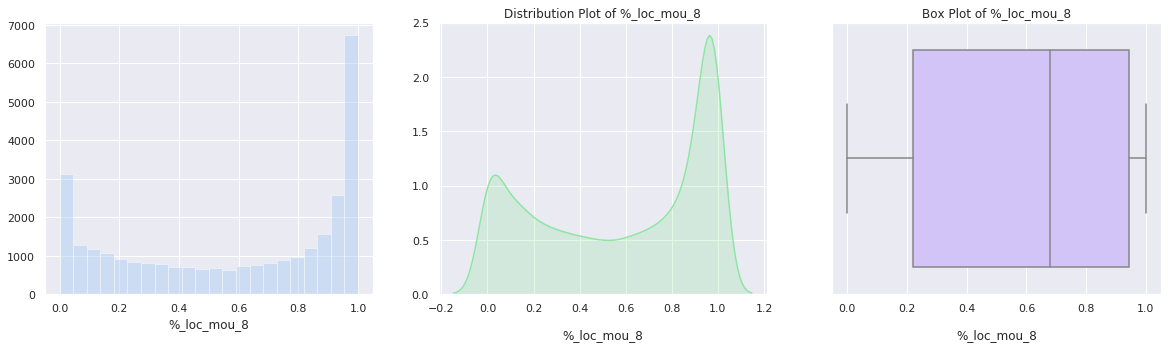

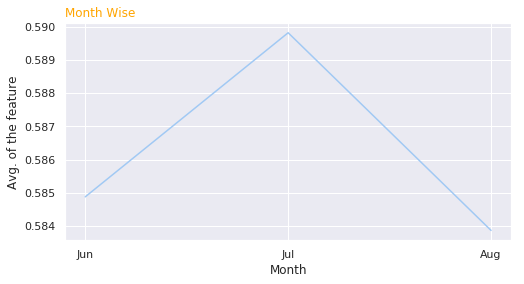

In [87]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='%_loc_mou').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **%_loc_mou**:===================</b><br>
    1. Jun to Jul and to Aug there is increase and reduce 

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>%_std_mou</i></b></mark>

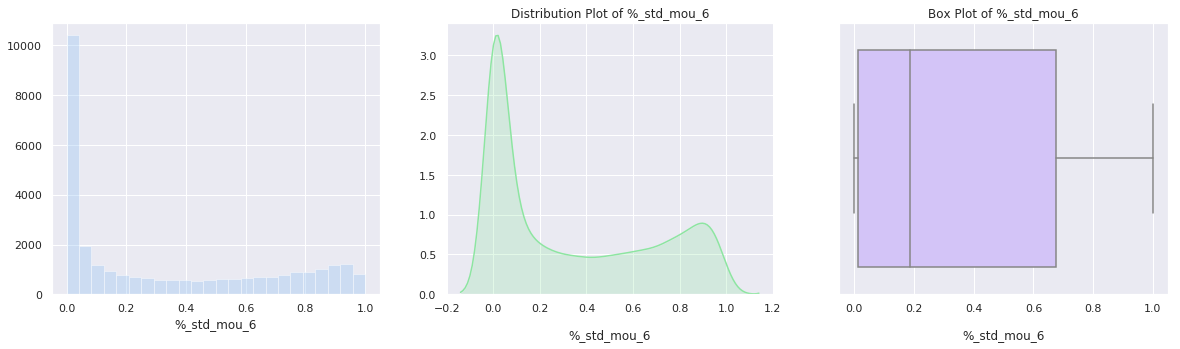

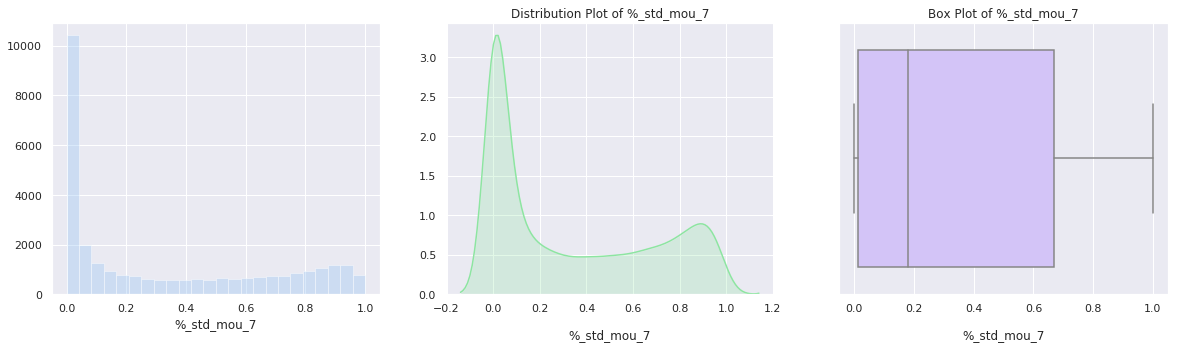

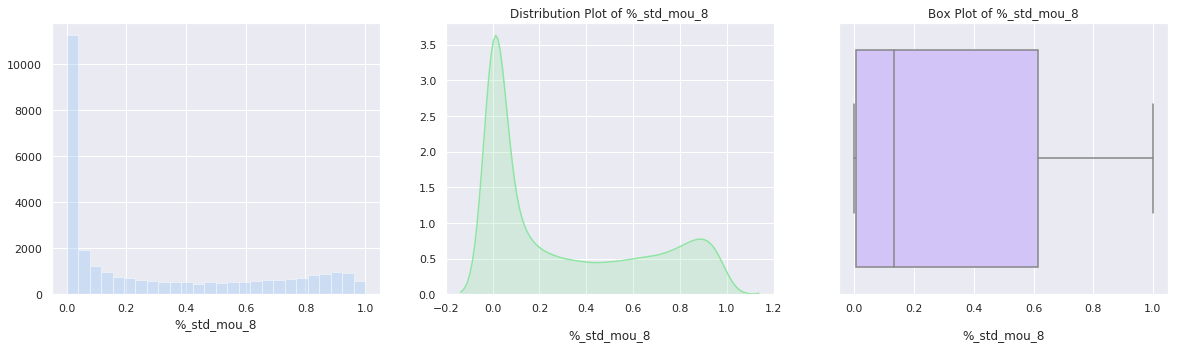

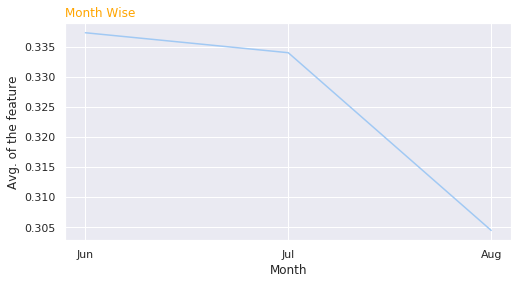

In [88]:
#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='%_std_mou').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **%_std_mou**:===================</b><br>
    1. StD MOU are reducing from Jun to Aug 

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>Total_rech_amt_dv</i></b></mark>

#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='Total_rech_amt_dv').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **Total_rech_amt_dv**:===================</b><br>
    1. Total_rech_amt of Data and Voice are reducing from Jun to Aug 

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>total_rech_num_dv</i></b></mark>

#plt.figure(figsize = (10, 8)) 
var=list(usage_df.filter(regex='Total_rech_amt_dv').columns)
for i in var:
    measuresplot(i)
MonthWiseAvgInfo(var)

#### <mark style="background:LightGreen"><b>===================Observation on **Total_rech_amt_dv**:===================</b><br>
    1. Total_rech_amt of Data and Voice are reducing from Jun to Aug 

### <mark style="background:black"><b><font color=white>5.2 Bivariate Analysis</font></mark>

#### <mark style="background:Black"><font color=white><b>We will analyse each feature with <i>Churn and Age of Network</i></b></font></mark>

<hr noshade>
#### <mark style="background:yellow"><b>Analysis Churna and aon bin</b></mark>

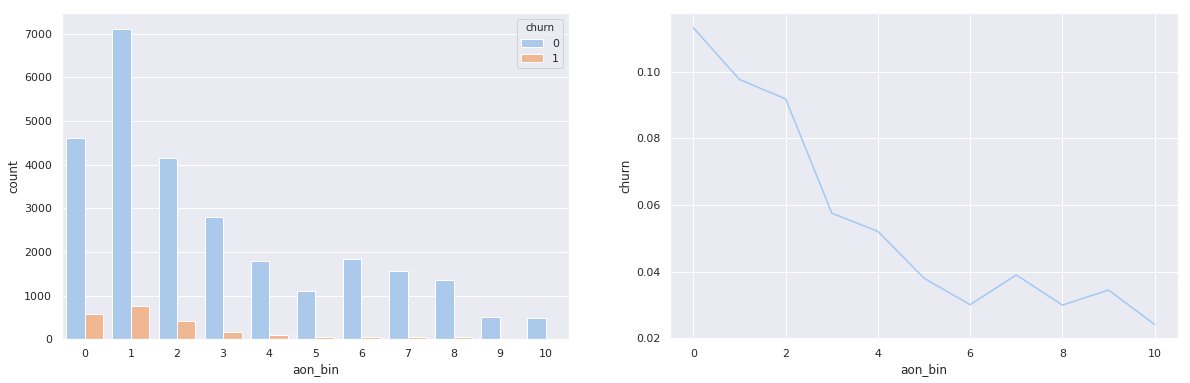

In [89]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)
sns.countplot( x = "aon_bin", hue = "churn", data = usage_df)#, showfliers = False)
plt.subplot(1,2,2)
temp_df = pd.DataFrame(usage_df.groupby('aon_bin',as_index=False)['churn'].mean())
    #temp_df['aon_bin']=pd.to_numeric(usage_df['aon_bin'])
temp_df
sns.lineplot(x="aon_bin", y='churn',data=temp_df)

In [90]:
print(sns.__version__)

0.10.1


#### <mark style="background:LightGreen"><b>===================INFERENCE ON **ARPU**:===================</b></mark>
   <mark style="background:lightsalmon"><b>Clearly subscribers are leaving in the frst 1-3 yrs </b></mark> 

<hr>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>ARPU</i></b></mark>

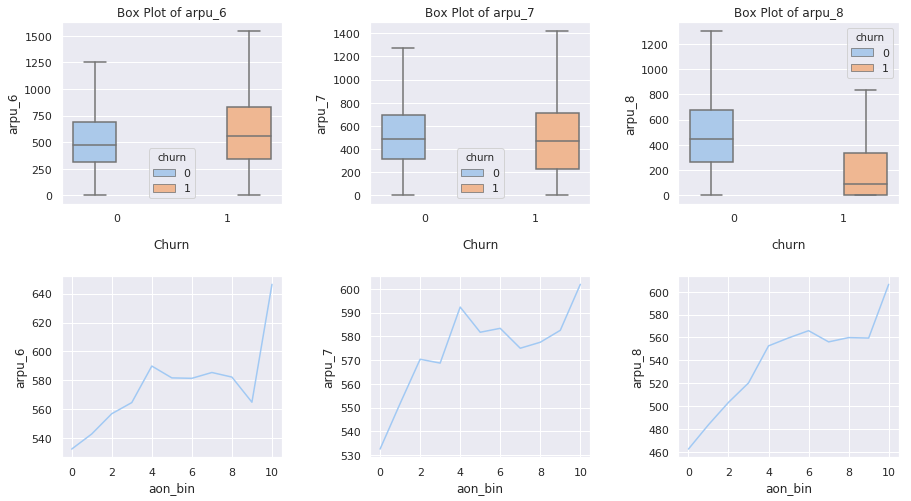

In [91]:
# Bivariate Analysis
pd.options.display.max_rows = 10000
bivariateplots('arpu') 

#### <mark style="background:LightGreen"><b>===================INFERENCE ON **ARPU**:===================</b><br>
    1. arpu_6 & arpu_7 have almost same mean for churn and non churn customers
    2. Mean of arpu reduces as the age is increasing
    

<hr noshade>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>INCOMING</i></b></mark>

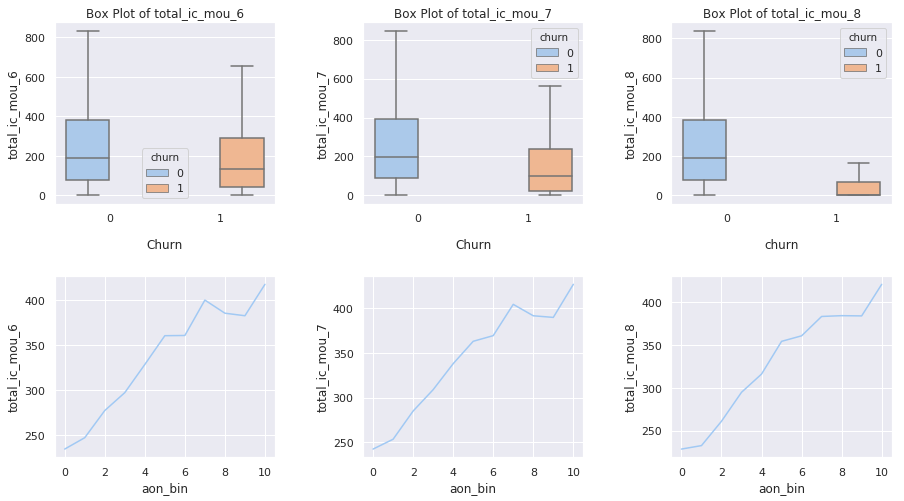

In [92]:
# Bivariate Analysis
pd.options.display.max_rows = 10000
i="total_ic_mou" 
colList=list(usage_df.filter(regex=i).columns)
bivariateplots('total_ic_mou') 

#### <mark style="background:LightGreen"><b>===================INFERENCE:===================</b><br>
    1. total recharge number from data and voice  have almost same mean for non churn  customers
    2. Total Incoming Mou increases with Age
    

<hr>
#### <mark style="background:yellow"><b>Analysis of the feature : <i>OUTGOING</i></b></mark>

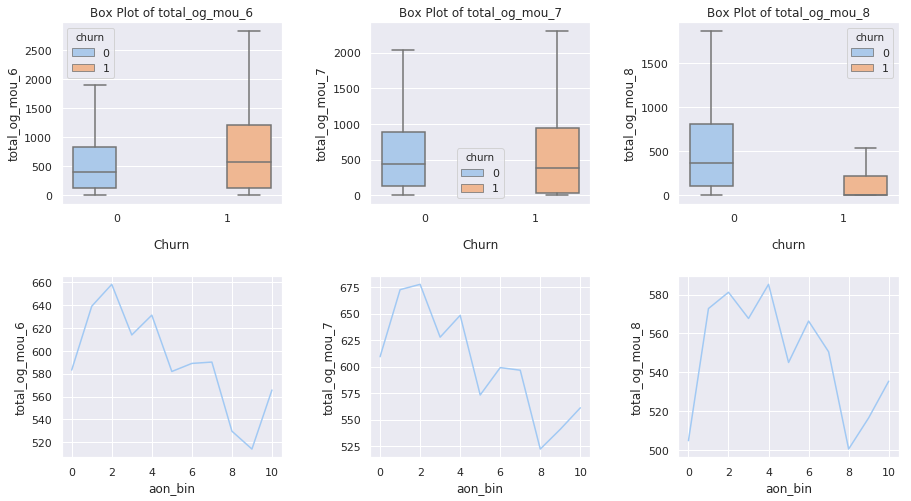

In [93]:
# Bivariate Analysis
pd.options.display.max_rows = 10000
i="total_ic_mou" 
colList=list(usage_df.filter(regex=i).columns)
bivariateplots('total_og_mou') 

#### <mark style="background:LightGreen"><b>===================INFERENCE:===================</b><br>
    1. total recharge number from data and voice  have almost same mean for non churn  customers
    2. No clear pattern
    

### <mark style="background:black"><b><font color=white>5.3 Multivariate Analysis</font></mark>
#### <mark style="background:Black"><font color=white><b>We will analyse here mutliple features</i></b></font></mark>

In [94]:
usage_df.head(2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8  %_loc_mou_6  %_loc_mou_7  %_loc_mou_8  %_std_mou_6  %_std_mou_7  %_std_mou_8 aon_bin  fb_user_6_-1  fb_user_6_0  fb_user_6_1  fb_user_7_-1  fb_user_7_0  fb_user_7_1  fb_user_8_-1  fb_user_8_0  fb_user_8_1  night_pck_user_6_-1  night_pck_user_6_0  night_pck_user_6_1  night_pck_user_7_-1  night_pck_user_7_0  night_pck_user_7_1  night_pck_user_8_-1  night_pck_user_8_0  night_pck_user_8_1
0   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0           0.0          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1              0.000000               0.00000              5.440000     0.000000     0.000000     0.844720     0.000000     0.000000     0.000000       2             0            0            1             0            0            1             0            0            1                    0                   1                   0                    0                   1                   0                    0      

<hr>
#### <mark style="background:yellow"><b>ARPU vs Recharge num & Recharge Amount</b></mark>

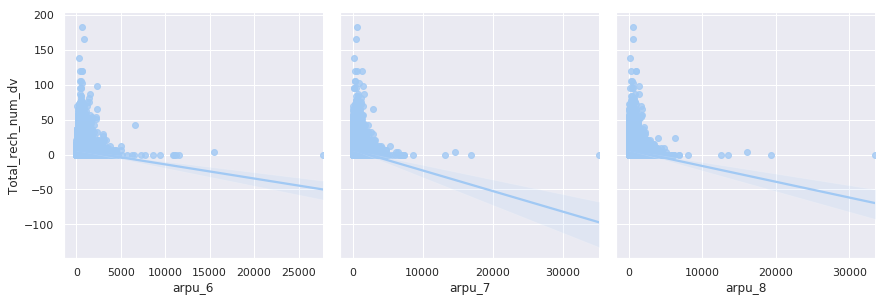

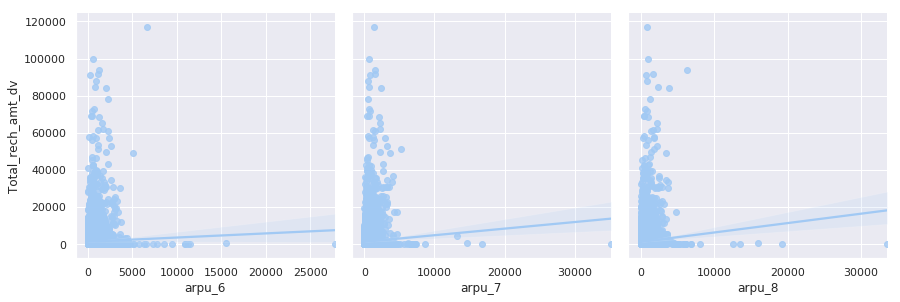

In [95]:
pp=usage_df.copy()
pp['Total_rech_num_dv']=pp['total_rech_num_data_6']+pp['total_rech_num_data_6']+pp['total_rech_num_data_6']
sns.pairplot(pp, x_vars=['arpu_6','arpu_7','arpu_8'], y_vars='Total_rech_num_dv',size=4, aspect=1, kind='reg')
pp['Total_rech_amt_dv']=pp['total_data_rech_amt_6']+pp['total_data_rech_amt_7']+pp['total_data_rech_amt_8']
sns.pairplot(pp, x_vars=['arpu_6','arpu_7','arpu_8'], y_vars='Total_rech_amt_dv',size=4, aspect=1, kind='reg')

<hr>
#### <mark style="background:yellow"><b>Local & STD Analysis</b></mark>

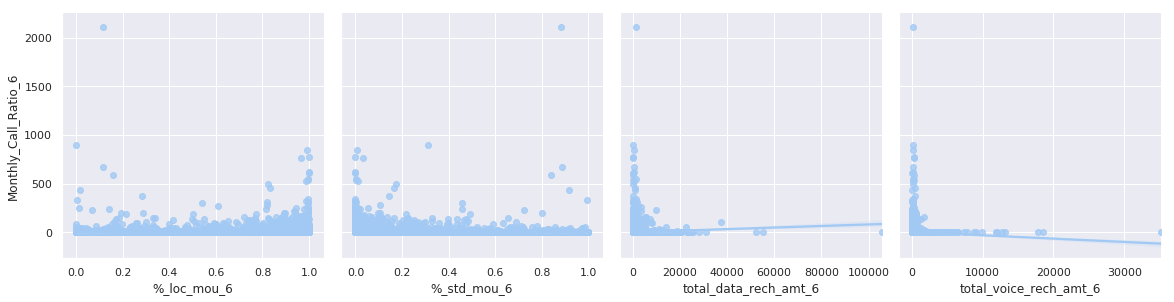

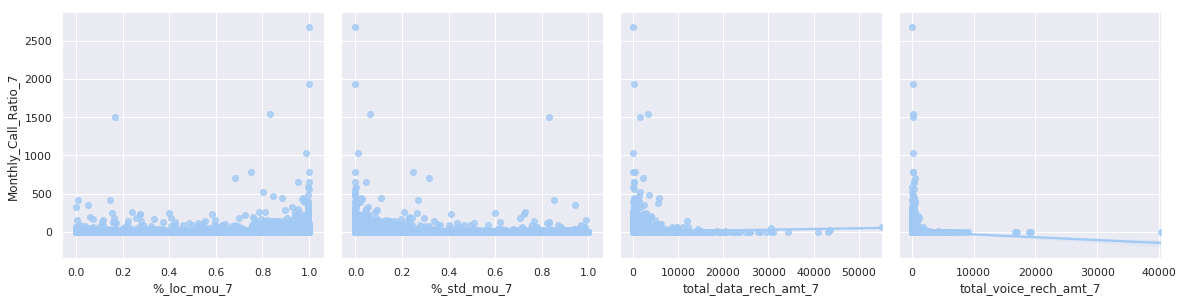

In [96]:
sns.pairplot(usage_df, x_vars=['%_loc_mou_6','%_std_mou_6','total_data_rech_amt_6','total_voice_rech_amt_6'], y_vars='Monthly_Call_Ratio_6',size=4, aspect=1, kind='reg')
sns.pairplot(usage_df, x_vars=['%_loc_mou_7','%_std_mou_7','total_data_rech_amt_7','total_voice_rech_amt_7'], y_vars='Monthly_Call_Ratio_7',size=4, aspect=1, kind='reg')

In [97]:
usage_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8  %_loc_mou_6  %_loc_mou_7  %_loc_mou_8  %_std_mou_6  %_std_mou_7  %_std_mou_8 aon_bin  fb_user_6_-1  fb_user_6_0  fb_user_6_1  fb_user_7_-1  fb_user_7_0  fb_user_7_1  fb_user_8_-1  fb_user_8_0  fb_user_8_1  night_pck_user_6_-1  night_pck_user_6_0  night_pck_user_6_1  night_pck_user_7_-1  night_pck_user_7_0  night_pck_user_7_1  night_pck_user_8_-1  night_pck_user_8_0  night_pck_user_8_1
0    197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                       4                       3                       2                     362                     252                     252             252             252             252                    1.0                    1.0                    1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1              0.000000              0.000000              5.440000     0.000000     0.000000     0.844720     0.000000     0.000000     0.000000       2             0            0            1             0            0            1             0            0            1                    0                   1                   0                    0                   1                   0                    0     

In [98]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29671
# of Columns:  132
# of Float64 type Columns: 84
# of int64 type Columns: 29
# of datetime64 type Columns: 0
# of object type Columns: 0


In [99]:
columns_to_be_deleted = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6',
'loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7',
'loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8',
'loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6',
'loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7',
'loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8']
usage_df.drop(columns_to_be_deleted, axis = 1, inplace = True)

### <mark style="background:black"><b><font color=white>5.4 Correlation</font></mark>


In [100]:
#.corr()
c = usage_df.corr().unstack().sort_values(kind="quicksort").drop_duplicates() 
type(c)
#s = c.unstack()
#so = s.sort_values(kind="quicksort").drop_duplicates()
#print(so)

pandas.core.series.Series

In [101]:
columns_to_be_deleted = ['fb_user_6','fb_user_7','fb_user_8','fb_user_6_-1','fb_user_7_-1','fb_user_8_-1','night_pck_user_6_-1','night_pck_user_7_-1',
                         'night_pck_user_8_-1','night_pck_user_6','night_pck_user_7','night_pck_user_8']
usage_df.drop(columns_to_be_deleted, axis = 1, inplace = True)

In [102]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False).drop_duplicates().to_frame()
    au_corr=au_corr.reset_index().rename(columns={"index": "col"})
    au_corr.columns = ['feature1', 'feature2', 'corr']
    return au_corr[0:n]


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [103]:
usage_df=usage_df.drop('aon_bin',axis=1)
print("Top Absolute Correlations")
print(get_top_abs_correlations(usage_df, 10))

corr_features = correlation(usage_df, 0.8)
len(set(corr_features))
 

Top Absolute Correlations
                feature1                feature2      corr
0        count_rech_2g_8             sachet_2g_8  0.987179
1        count_rech_2g_7             sachet_2g_7  0.986418
2        count_rech_2g_6             sachet_2g_6  0.970020
3                 arpu_8  total_voice_rech_amt_8  0.963768
4                 arpu_6  total_voice_rech_amt_6  0.955530
5                 arpu_7  total_voice_rech_amt_7  0.954632
6  total_rech_num_data_7         count_rech_2g_7  0.910060
7  total_rech_num_data_8         count_rech_2g_8  0.906432
8  total_rech_num_data_7             sachet_2g_7  0.904097
9  total_rech_num_data_6             sachet_2g_6  0.903494


23

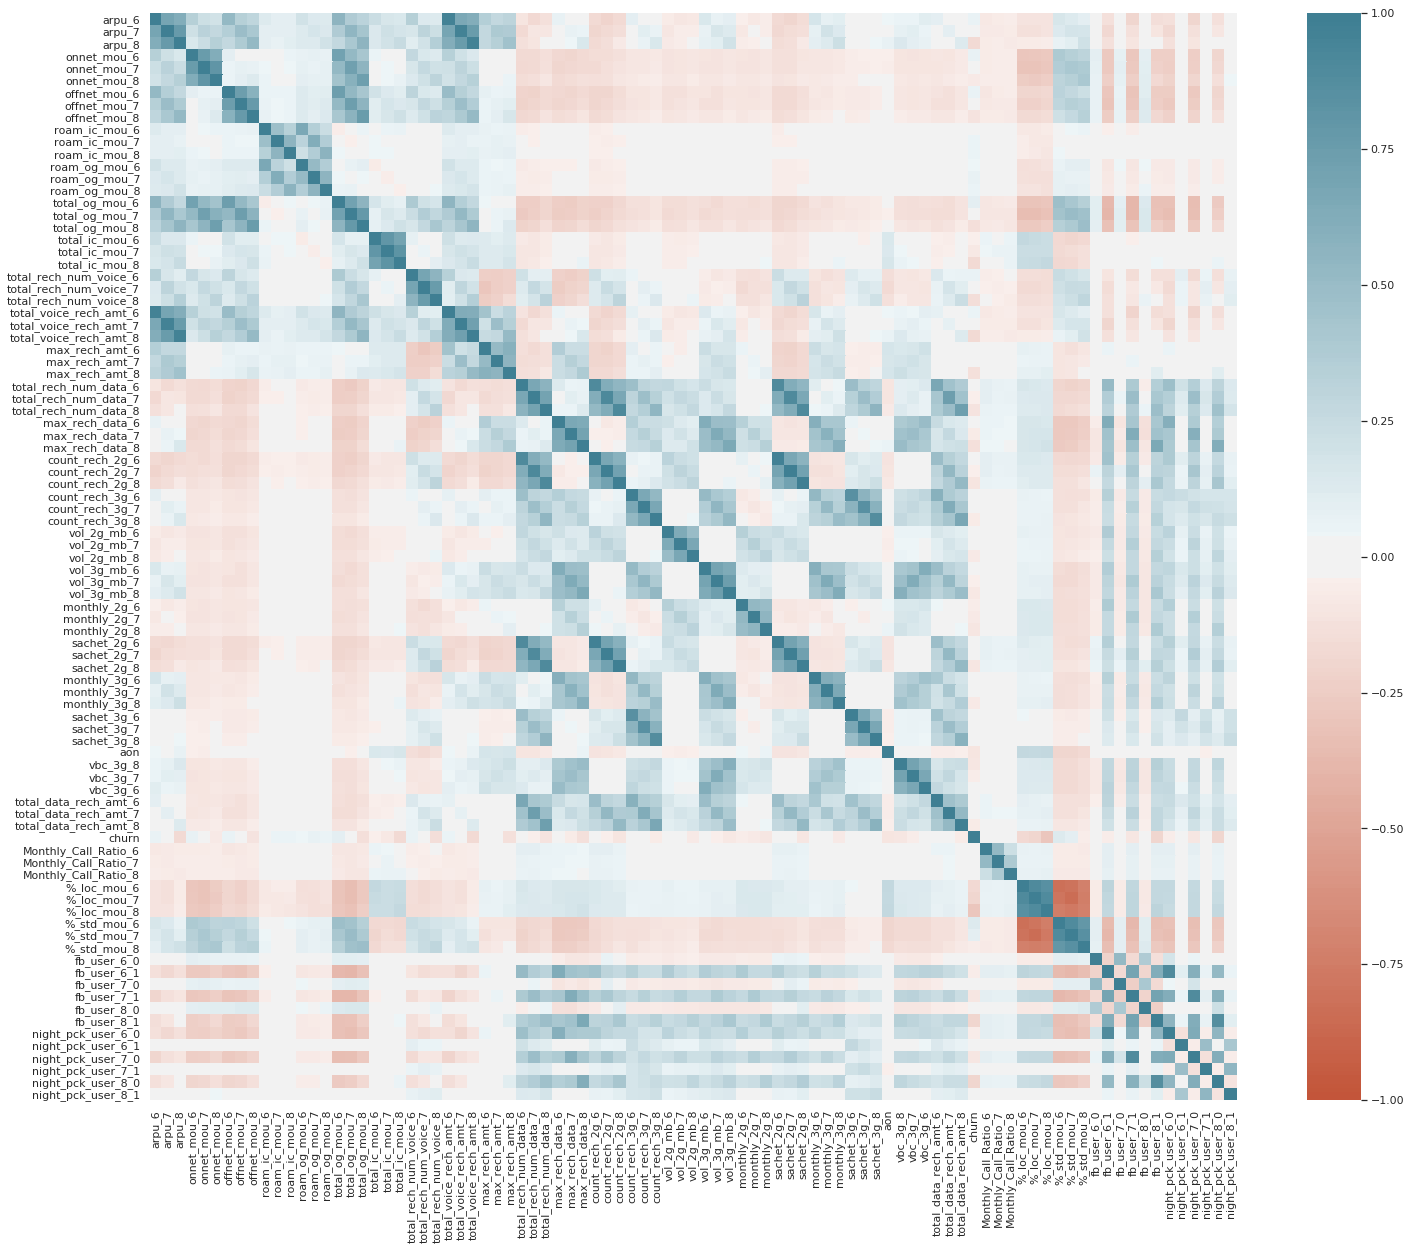

In [104]:
plt.figure(figsize = (25, 20))
corr = usage_df.corr()
ax = sns.heatmap(
    corr,  
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
) 

Heatmap for the columms of 6th month

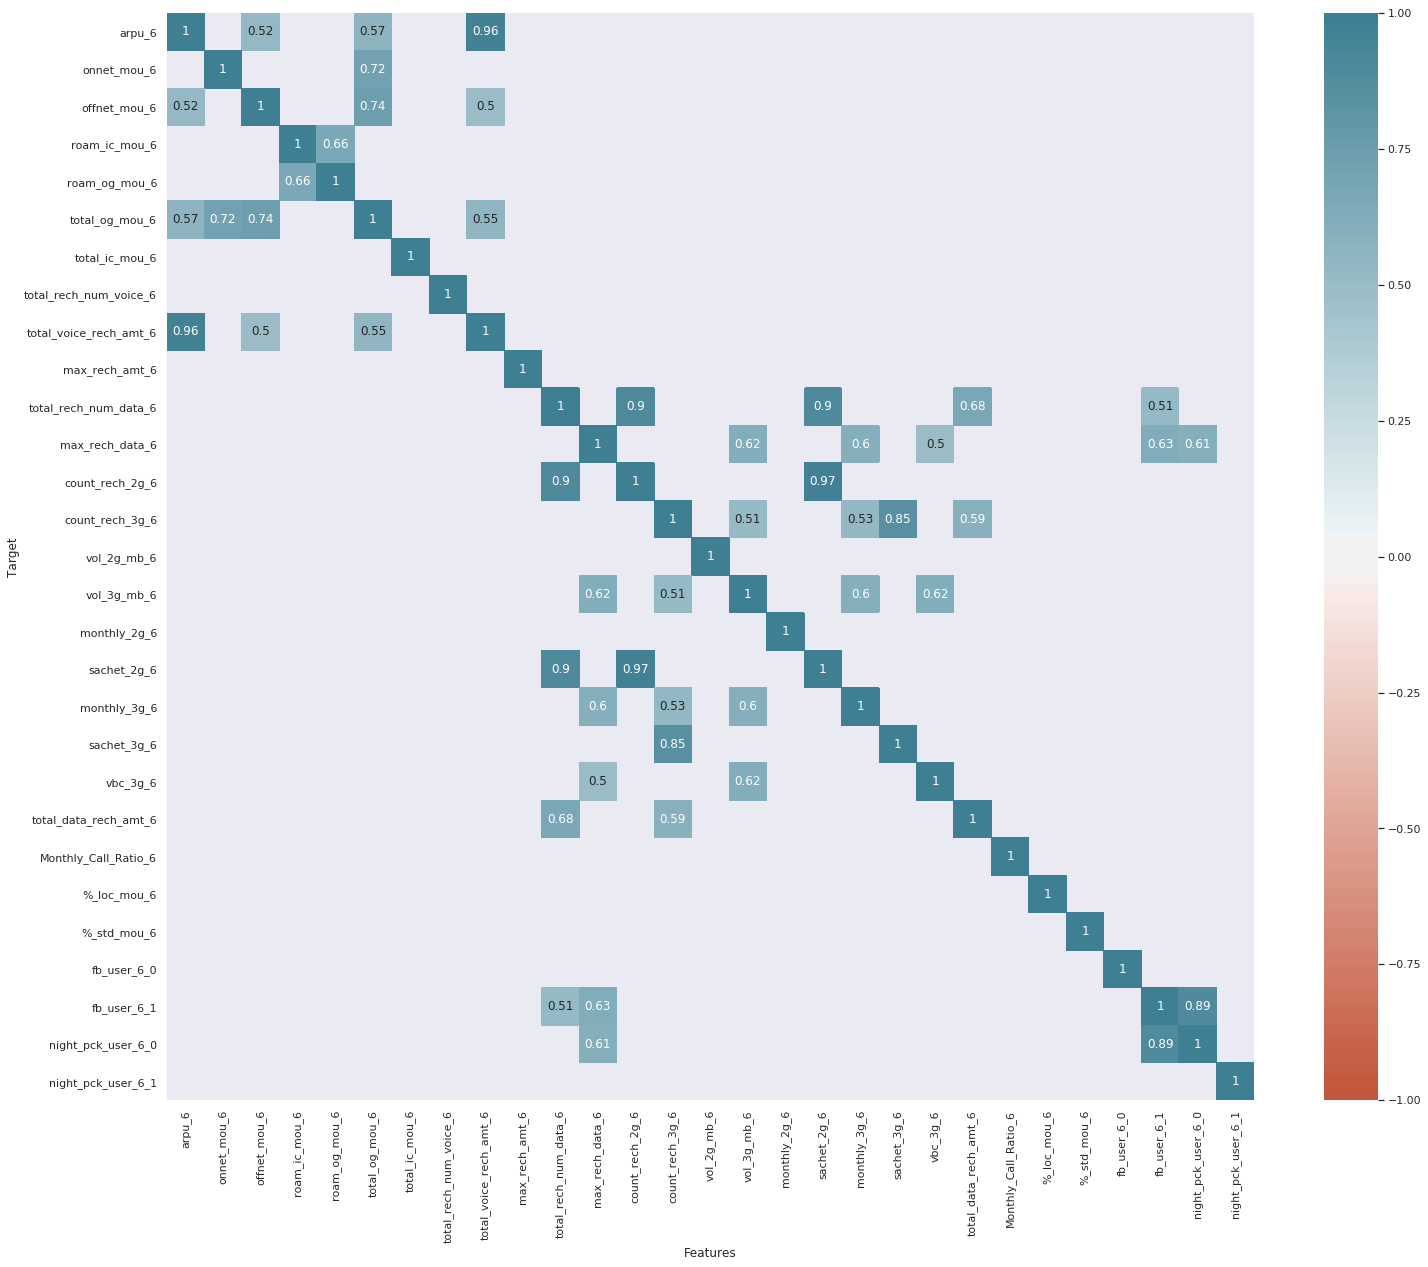

In [105]:
plt.figure(figsize = (25, 20))
within_6=usage_df.filter(regex='_6')
df_matrix = within_6.corr()
Ar_annotation = df_matrix # customized Annotation
Ar_annotation[Ar_annotation < 0.5] = None
Ar_annotation

 
sns.heatmap(df_matrix,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=Ar_annotation)
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

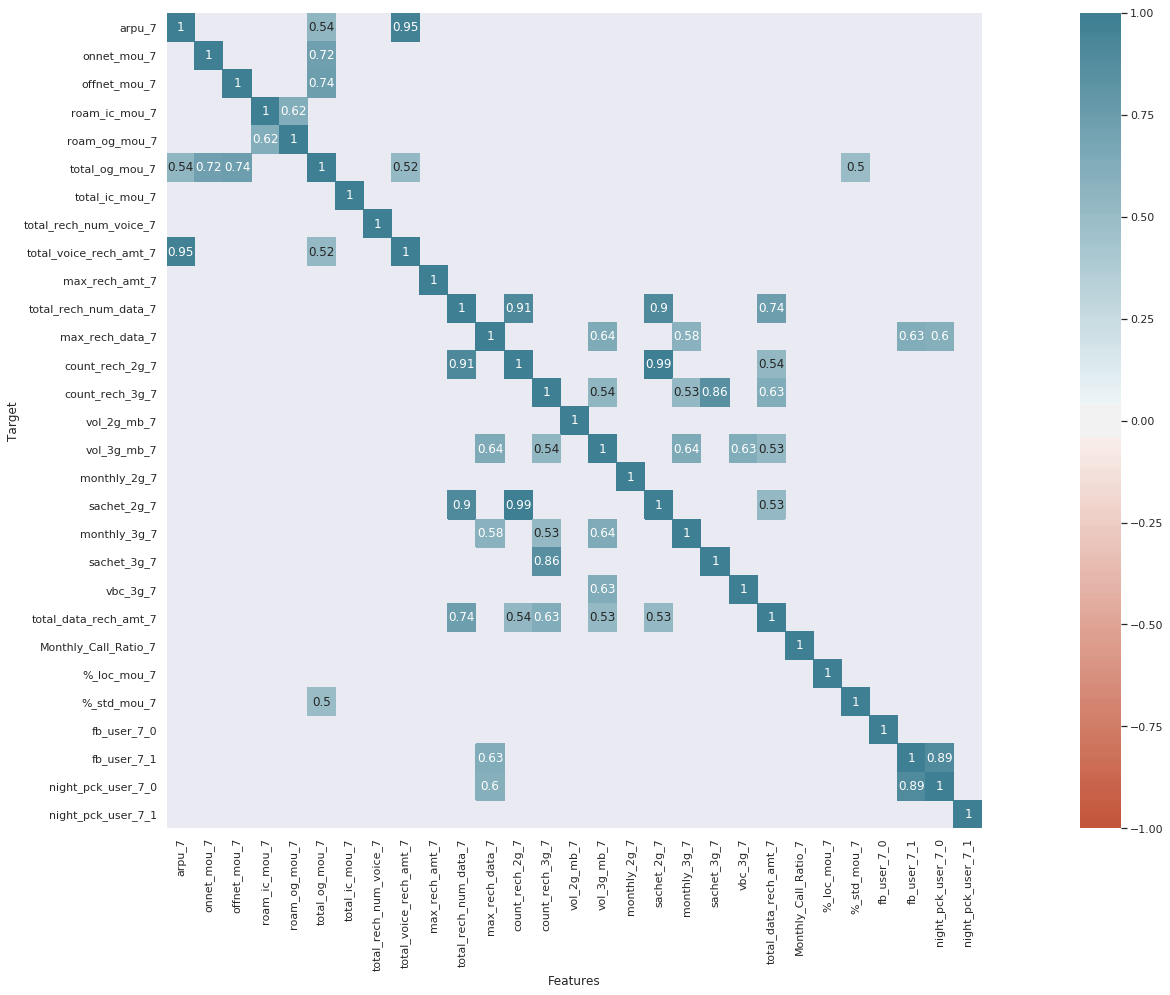

In [106]:
plt.figure(figsize = (35, 15))
within_6=usage_df.filter(regex='_7')
df_matrix = within_6.corr()
Ar_annotation = df_matrix # customized Annotation
Ar_annotation[Ar_annotation < 0.5] = None
Ar_annotation

 
sns.heatmap(df_matrix,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=Ar_annotation)
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

In [107]:
corr_matrix = usage_df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'total_voice_rech_amt_6', 'total_voice_rech_amt_7', 'total_voice_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', '%_loc_mou_7', '%_loc_mou_8', '%_std_mou_6', '%_std_mou_7', '%_std_mou_8', 'night_pck_user_6_0', 'night_pck_user_7_0', 'night_pck_user_8_0']


Total features with high correlation -  23


#### <mark style="background:LightGreen"><b>===================INFERENCE:===================</b><br>
    - There are many features that are highly correlated 
    - Total of 39 features with a correlation > 0.80

#### Note -  
- **we will be performing Principal Component Analysis in a later section these should get dropped automatically**

In [108]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  29671
# of Columns:  89
# of Float64 type Columns: 54
# of int64 type Columns: 23
# of datetime64 type Columns: 0
# of object type Columns: 0


In [109]:
outlierdf=get5pointtreatment(usage_df)
outlierdf.T

arpu_6   arpu_7   arpu_8 onnet_mou_6 onnet_mou_7 onnet_mou_8 offnet_mou_6 offnet_mou_7 offnet_mou_8 roam_ic_mou_6 roam_ic_mou_7 roam_ic_mou_8 roam_og_mou_6 roam_og_mou_7 roam_og_mou_8 total_og_mou_6 total_og_mou_7 total_og_mou_8 total_ic_mou_6 total_ic_mou_7 total_ic_mou_8 total_rech_num_voice_6 total_rech_num_voice_7 total_rech_num_voice_8 total_voice_rech_amt_6 total_voice_rech_amt_7 total_voice_rech_amt_8 max_rech_amt_6 max_rech_amt_7 max_rech_amt_8 total_rech_num_data_6 total_rech_num_data_7 total_rech_num_data_8 max_rech_data_6 max_rech_data_7 max_rech_data_8 count_rech_2g_6 count_rech_2g_7 count_rech_2g_8 count_rech_3g_6 count_rech_3g_7 count_rech_3g_8 vol_2g_mb_6 vol_2g_mb_7 vol_2g_mb_8 vol_3g_mb_6 vol_3g_mb_7 vol_3g_mb_8 monthly_2g_6 monthly_2g_7 monthly_2g_8 sachet_2g_6 sachet_2g_7 sachet_2g_8 monthly_3g_6 monthly_3g_7 monthly_3g_8 sachet_3g_6 sachet_3g_7 sachet_3g_8      aon vbc_3g_8 vbc_3g_7 vbc_3g_6 total_data_rech_amt_6 total_data_rech_amt_7 total_data_rech_amt_8      churn Monthly_Call_Ratio_6 Monthly_Call_Ratio_7 Monthly_Call_Ratio_8 %_loc_mou_6 %_loc_mou_7 %_loc_mou_8 %_std_mou_6 %_std_mou_7 %_std_mou_8 fb_user_6_0 fb_user_6_1 fb_user_7_0 fb_user_7_1 fb_user_8_0 fb_user_8_1 night_pck_user_6_0 night_pck_user_6_1 night_pck_user_7_0 night_pck_user_7_1 night_pck_user_8_0 night_pck_user_8_1
count                  29671    29671    29671       29671       29671       29671        29671        29671        29671         29671         29671         29671         29671         29671         29671          29671          29671          29671          29671          29671          29671                  29671                  29671                  29671                  29671                  29671                  29671          29671          29671          29671                 29671                 29671                 29671           29671           29671           29671           29671           29671           29671           29671           29671           29671       29671       29671       29671       29671       29671       29671        29671        29671        29671       29671       29671       29671        29671        29671        29671       29671       29671       29671    29671    29671    29671    29671                 29671                 29671                 29671      29671                29671                29671                29671       29671       29671       29671       29671       29671       29671       29671       29671       29671       29671       29671       29671              29671              29671              29671              29671              29671              29671
mean                 558.826  562.596  510.298     261.717     269.115     235.171      373.916      379.297      336.066       15.3872       11.9259       12.0371       25.3614       19.0276       19.0989        612.228        631.984        554.498        291.832        299.152         282.17                11.8723                 11.769                10.0307                659.912                661.163                586.611        168.172        170.928         160.46               1.67497               1.86603                1.6357         78.4295         80.1476         73.0825          1.1851         1.40686         1.21873        0.425567        0.459169        0.416973     127.152     125.911     106.698     346.306      372.14     354.322     0.175458     0.184456      0.15473      1.0702     1.22241       1.064     0.218833     0.230191     0.212868    0.210475    0.228978    0.204105  1211.12  170.064  179.695  159.394               457.854               531.725               467.286  0.0770449              3.07208              3.52574              3.84329     0.58488    0.589816     0.58387     0.33735    0.334028    0.304462   0.0412524    0.520138   0.0447912    0.526912    0.055138    0.480907           0.547774           0.013616           0.559064          0.0126386           0.524586       

## 6. Model Preperation
<mark style="background:black"><b><font color=white>**Preparing data for Model prep**</font> </b></mark> 

### 6.1 Handling Outliers
<mark style="background:black"><b><font color=white>**Identifying the outlier and handling them using IQR**</font> </b></mark> 

In [110]:
usage_df.describe(percentiles=[0.02,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8   %_loc_mou_6   %_loc_mou_7   %_loc_mou_8   %_std_mou_6   %_std_mou_7   %_std_mou_8   fb_user_6_0   fb_user_6_1   fb_user_7_0   fb_user_7_1   fb_user_8_0   fb_user_8_1  night_pck_user_6_0  night_pck_user_6_1  night_pck_user_7_0  night_pck_user_7_1  night_pck_user_8_0  night_pck_user_8_1
count  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000   29671.000000   29671.000000   29671.000000   29671.000000   29671.000000   29671.000000    29671.000000    29671.000000    29671.000000    29671.000000    29671.000000    29671.000000            29671.000000            29671.000000            29671.000000            29671.000000            29671.000000            29671.000000    29671.000000    29671.000000    29671.000000           29671.000000           29671.000000           29671.000000     29671.000000     29671.000000     29671.000000     29671.000000     29671.000000     29671.000000     29671.000000     29671.000000     29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000           29671.000000           29671.000000           29671.000000  29671.000000          29671.000000          29671.000000          29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000  29671.000000        29671.000000        29671.000000        29671.000000        29671.000000        29671.000000        29671.000000
mean     558.826014    562.596390    510.297872    261.717445    269.114794    235.170807    373.915810    379.296726    336.066072      15.387210      11.925869      12.037072      25.361363      19.027648      19.098909      612.227725      631.984146      554.498337      291.831814      299.152038      282.170238               11.872333               11.769034               10.030670              659.912204              661.162987              586.610596      168.172424      170.928078      160.460382               1.674969               1.866031               1.635705        78.429544        80.147619        73.082471         1.185097         1.406862         1.218732         0.425567         0.459169         0.416973    127.152328    125.910944    106.698237    346.306265    372.140264    354.322122      0.175458      0.184456      0.154730      1.070203      1.222406      1.064002      0.218833      0.230191      0.212868      0.210475      0.228978      0.204105   1211.119140    170.064149    179.694866    159.393942             457.853

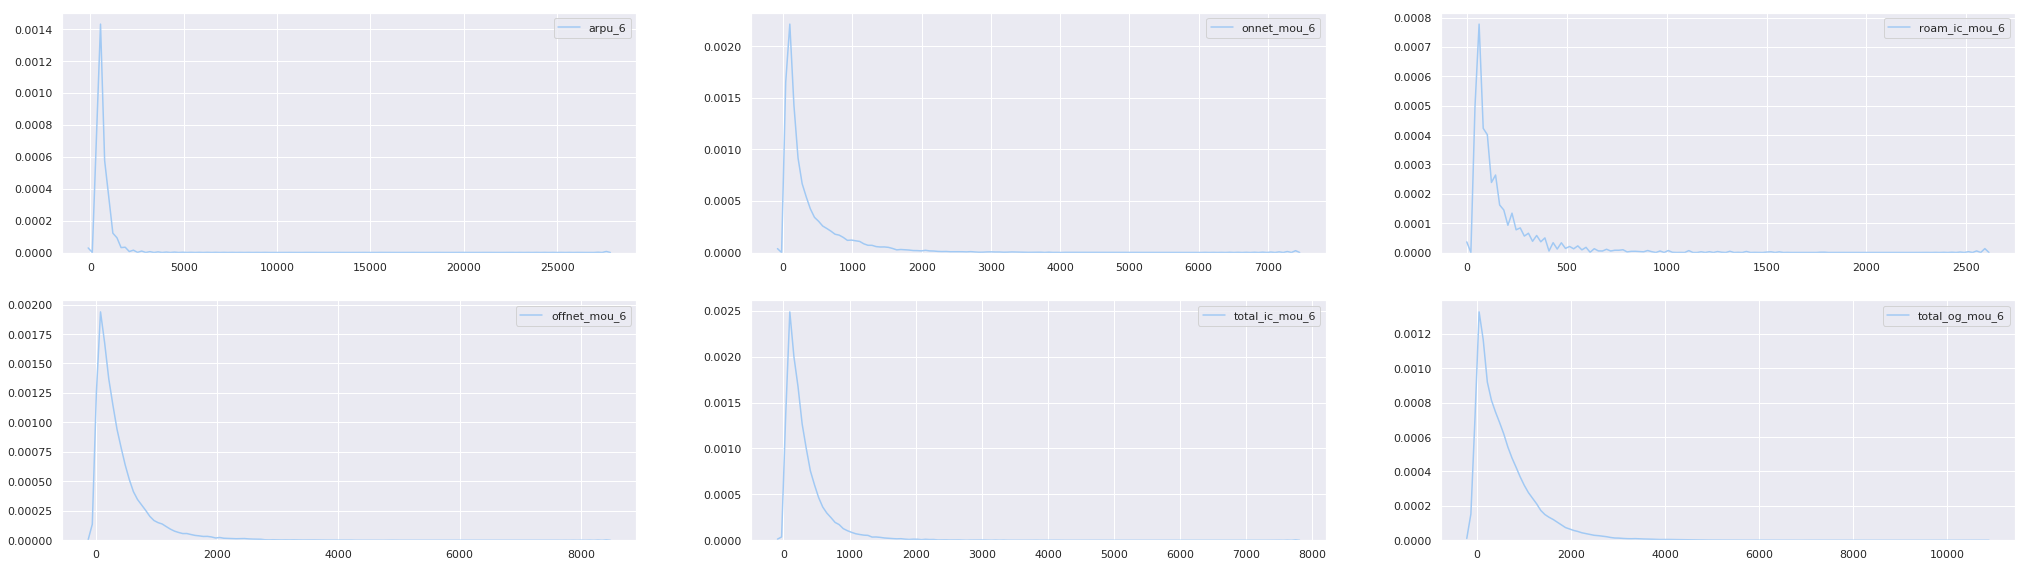

In [111]:
plt.figure(figsize = (35, 15))
plt.subplot(331)
sns.kdeplot(usage_df.arpu_6)
plt.subplot(332)
sns.kdeplot(usage_df.onnet_mou_6)

plt.subplot(333)
sns.kdeplot(usage_df.roam_ic_mou_6)
plt.subplot(334)
sns.kdeplot(usage_df.offnet_mou_6)

plt.subplot(335)
sns.kdeplot(usage_df.total_ic_mou_6)
plt.subplot(336)
sns.kdeplot(usage_df.total_og_mou_6)  

In [112]:
usage_df_bkp = usage_df.copy()
usage_df=remove_outlier(usage_df,3,98)
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  26842
# of Columns:  89
# of Float64 type Columns: 54
# of int64 type Columns: 23
# of datetime64 type Columns: 0
# of object type Columns: 0


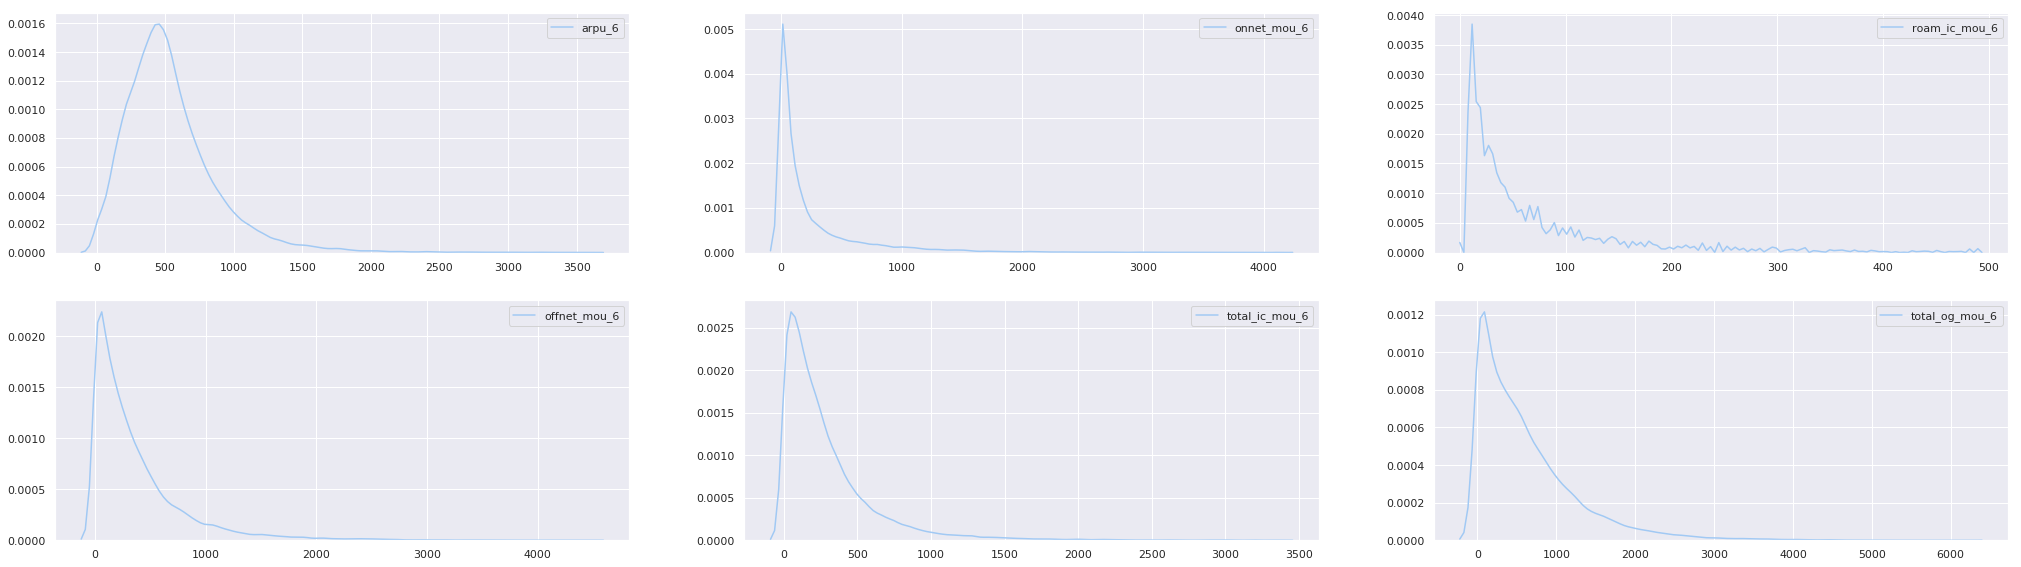

In [113]:
plt.figure(figsize = (35, 15))
plt.subplot(331)
sns.kdeplot(usage_df.arpu_6)
plt.subplot(332)
sns.kdeplot(usage_df.onnet_mou_6)

plt.subplot(333)
sns.kdeplot(usage_df.roam_ic_mou_6)
plt.subplot(334)
sns.kdeplot(usage_df.offnet_mou_6)

plt.subplot(335)
sns.kdeplot(usage_df.total_ic_mou_6)
plt.subplot(336)
sns.kdeplot(usage_df.total_og_mou_6)  

#### <mark style="background:LightGreen"><b> INFERENCE: </b><br>
    - Most of the outliers are removed

In [114]:
usage_df.describe().T

count         mean         std    min         25%         50%          75%          max
arpu_6                  26842.0   538.112338  338.767688    0.0  316.981000  480.365000   681.808000  3582.925000
arpu_7                  26842.0   537.956743  334.533604    0.0  317.888250  479.520000   680.686750  3701.046000
arpu_8                  26842.0   485.640574  359.764019    0.0  239.551000  427.578000   645.320500  3833.259000
onnet_mou_6             26842.0   261.689749  432.049485    0.0   20.610000   90.275000   298.340000  4153.530000
onnet_mou_7             26842.0   268.196101  442.892539    0.0   19.532500   88.930000   300.597500  4176.280000
onnet_mou_8             26842.0   232.857512  413.817869    0.0   13.340000   70.735000   248.040000  3973.790000
offnet_mou_6            26842.0   372.815850  447.942066    0.0   81.595000  231.890000   490.887500  4466.360000
offnet_mou_7            26842.0   376.923243  456.764000    0.0   80.060000  229.750000   497.835000  4525.240000
offnet_mou_8            26842.0   332.539984  427.713745    0.0   55.632500  192.300000   442.620000  4186.140000
roam_ic_mou_6           26842.0    10.040571   39.234264    0.0    0.000000    0.000000     0.000000   493.290000
roam_ic_mou_7           26842.0     5.871649   25.165225    0.0    0.000000    0.000000     0.000000   336.440000
roam_ic_mou_8           26842.0     6.124826   25.548654    0.0    0.000000    0.000000     0.000000   308.010000
roam_og_mou_6           26842.0    16.597234   60.220704    0.0    0.000000    0.000000     0.000000   678.160000
roam_og_mou_7           26842.0    10.348612   39.974172    0.0    0.000000    0.000000     0.000000   433.640000
roam_og_mou_8           26842.0    10.313768   39.431129    0.0    0.000000    0.000000     0.000000   416.830000
total_og_mou_6          26842.0   619.732277  643.675630    0.0  144.917500  441.360000   876.890000  6171.640000
total_og_mou_7          26842.0   637.203239  658.209938    0.0  146.180000  456.435000   909.417500  5702.180000
total_og_mou_8          26842.0   557.296141  632.191411    0.0   97.180000  360.305000   792.687500  5909.980000
total_ic_mou_6          26842.0   288.709433  331.142420    0.0   78.195000  190.195000   376.532500  3366.260000
total_ic_mou_7          26842.0   294.816863  334.358959    0.0   84.110000  193.960000   382.075000  3301.510000
total_ic_mou_8          26842.0   279.052314  327.241196    0.0   67.030000  180.770000   368.282500  3229.040000
total_rech_num_voice_6  26842.0    11.728783    8.768637    0.0    6.000000    9.000000    14.000000    90.000000
total_rech_num_voice_7  26842.0    11.593361    8.950710    0.0    6.000000    9.000000    14.000000    93.000000
total_rech_num_voice_8  26842.0     9.856158    8.761926    0.0    4.000000    8.000000    13.000000    90.000000
total_voice_rech_amt_6  26842.0   634.376835  405.138403    0.0  370.000000  564.000000   810.000000  4335.000000
total_voice_rech_amt_7  26842.0   632.005141  410.811297    0.0  361.000000  560.000000   808.000000  4355.000000
total_voice_rech_amt_8  26842.0   557.832464  433.532784    0.0  252.000000  492.000000   755.750000  4262.000000
max_rech_amt_6          26842.0   161.204009  138.668678    0.0  110.000000  120.000000   198.000000  1119.000000
max_rech_amt_7          26842.0   162.802436  141.451628    0.0  110.000000  128.000000   198.000000  1500.000000
max_rech_amt_8          26842.0   152.985918  135.562995    0.0   50.000000  130.000000   198.000000  1100.000000
total_rech_num_data_6   26842.0     1.488414    2.368708    0.0    0.000000    1.000000     2.000000    24.000000
total_rech_num_data_7   26842.0     1.647120    2.553606    0.0    0.000000    1.000000     2.000000    24.000000
total_rech_num_data_8   26842.0     1.418784    2.352044    0.0    0.000000    1.000000     2.000000    22.000000
max_rech_data_6         26842.0    72.173646   97.007503    0.0    0.000000   23.000000   154.000000   655.000000
max_rech_data_7         26842.0    7

### 6.2 Train and Test Split
<mark style="background:black"><b><font color=white>**Splitting the data into Train and Test**</font> </b></mark> 

In [115]:
getshape(usage_df)

**The given dataframe has the following # of rows, Columns and datatype after above operations:**

# of Rows:  26842
# of Columns:  89
# of Float64 type Columns: 54
# of int64 type Columns: 23
# of datetime64 type Columns: 0
# of object type Columns: 0


In [116]:
#Splitting the Data into test and train

X = usage_df.drop('churn', axis = 1)
y = usage_df[['churn']]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train_org =X_train.copy()
X_test_org = X_train.copy()
y_train_org = X_train.copy()
y_test_org =X_train.copy()

(26842, 88)
(26842, 1)
(18789, 88)
(18789, 1)
(8053, 88)
(8053, 1)


### 6.2 Feature Scaling  Scaling to quantiles and median - RobustScaling

#### <mark style="background:Gold"><b> **Scaling to quantiles and median - RobustScaling**</b><br>

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In a nutshell, RobustScaling:

- centers the median at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values vary.
- robust outliers


In [117]:
np.round(X_train.describe(), 1)

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_voice_6  total_rech_num_voice_7  total_rech_num_voice_8  total_voice_rech_amt_6  total_voice_rech_amt_7  total_voice_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8      aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  Monthly_Call_Ratio_6  Monthly_Call_Ratio_7  Monthly_Call_Ratio_8  %_loc_mou_6  %_loc_mou_7  %_loc_mou_8  %_std_mou_6  %_std_mou_7  %_std_mou_8  fb_user_6_0  fb_user_6_1  fb_user_7_0  fb_user_7_1  fb_user_8_0  fb_user_8_1  night_pck_user_6_0  night_pck_user_6_1  night_pck_user_7_0  night_pck_user_7_1  night_pck_user_8_0  night_pck_user_8_1
count  18789.0  18789.0  18789.0      18789.0      18789.0      18789.0       18789.0       18789.0       18789.0        18789.0        18789.0        18789.0        18789.0        18789.0        18789.0         18789.0         18789.0         18789.0         18789.0         18789.0         18789.0                 18789.0                 18789.0                 18789.0                 18789.0                 18789.0                 18789.0         18789.0         18789.0         18789.0                18789.0                18789.0                18789.0          18789.0          18789.0          18789.0          18789.0          18789.0          18789.0          18789.0          18789.0          18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0       18789.0       18789.0       18789.0      18789.0      18789.0      18789.0       18789.0       18789.0       18789.0      18789.0      18789.0      18789.0  18789.0   18789.0   18789.0   18789.0                18789.0                18789.0                18789.0               18789.0               18789.0               18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0      18789.0             18789.0             18789.0             18789.0             18789.0             18789.0             18789.0
mean     539.0    538.2    485.8        261.4        269.4        232.6         373.6         375.5         330.9           10.1            5.9            6.3           17.0           10.3           10.7           619.8           637.0           555.0           289.0           296.3           280.0                    11.7                    11.6                     9.9                   635.7                   632.3                   558.5           160.7           162.9           152.9                    1.5                    1.6                    1.4             72.1             72.9             66.1              1.1              1.3              1.1              0.3              0.3              0.3        115.1        113.0         92.7        270.6        287.6        272.1           0.2           0.2           0.1          1.0          1.1          1.0           0.2           0.2           0.2          0.1          0.1          0.1   1225.9     143.5     152.2     135.3                  339.4                  389.3                  325.2                   1.5                   1.5                   1.6          0.6          0.6          0.6          0.3          0.3        

In [118]:
# Normalize the data
scaler = RobustScaler() 
#scaler = RobustScaler()#,StandardScaler,MinMaxScaler,RobustScaler
X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test) 

In [119]:
np.round(pd.DataFrame(X_train_scaled).describe(), 1)

0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28       29       30       31       32       33       34       35       36       37       38       39       40       41       42       43       44       45       46       47       48       49       50       51       52       53       54       55       56       57       58       59       60       61       62       63       64       65       66       67       68       69       70       71       72       73       74       75       76       77       78       79       80       81       82       83       84       85       86       87
count  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0  18789.0
mean       0.2      0.2      0.1      0.6      0.6      0.7      0.3      0.3      0.4     10.1      5.9      6.3     17.0     10.3     10.7      0.2      0.2      0.3      0.3      0.3      0.3      0.3      0.3      0.2      0.2      0.2      0.1      0.5      0.4      0.2      0.2      0.3      0.2      0.3      0.3      0.3      1.1      1.3      1.1      0.3      0.3      0.3      1.5      1.6      2.0      0.9      0.8      1.0      0.2      0.2      0.1      1.0      1.1      1.0      0.2      0.2      0.2      0.1      0.1      0.1      0.3      1.3      1.3      1.7      0.8      0.7      1.2      0.9      0.9      1.0     -0.1     -0.1     -0.1      0.2      0.2      0.3      0.0     -0.5      0.0     -0.5      0.1      0.5     -0.5      0.0     -0.5      0.0     -0.5      0.0
std        0.9      0.9      0.9      1.6      1.6      1.7      1.1      1.1      1.1     39.0     25.4     26.2     61.4     39.7     40.3      0.9      0.9      0.9      1.1      1.1      1.1      1.1      1.1      1.0      0.9      0.9      0.9      1.6      1.6      0.9      1.2      1.3      1.2      0.6      0.6      0.6      2.3      2.5      2.3      0.7      0.7      0.7      3.5      3.8      5.2      2.0      1.7      2.1      0.4      0.4      0.4      2.3      2.5      2.3      0.5      0.5      0.5      0.5      0.5      0.5      0.7      3.1      3.1      4.1      2.0      1.8      2.9      3.9      3.6      3.9      0.5      0.5      0.5      0.5      0.5      0.6      0.2      0.5      0.2      0.5      0.2      0.5      0.5      0.1      0.5      0.1      0.5      0.1
min       -1.3     -1.3     -1.0     -0.3     -0.3     -0.3     -0.6     -0.6     -0.5      0.0      0.0      0.0      0.0      0.0      0.0     -0.6     -0.6     -0.5     -0.6     -0.7     -0.6     -1.1     -1.1     -0.9     -1.3     -1.3     -1.0     -1.4     -1.5     -0.9     -0.5     -0.5     -0.5     -0.1     -0.1     -0.1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0     -0.5      0.0      0.0      0.0     -0.2     -0.2     -0.1     -0.5     -0.5     -0.5     -0.9     -1.0     -0.9     -0.3     -0.3     -0.2      0.0     -1.0      0.0     -1.0      0.0      0.0     -1.0      0.0     -1.0      0.0     -1.0      0.0
25%       -0.5     -0.

In [120]:

# the scaler stores the IQR values of each column  as learned from train set

#print(scaler.scale_)

#### <mark style="background:LightGreen"><b> **Correlation beteen any two components is removed & thus multicollinearity** </b> </mark>

###    <font color = black>6.3 PCA - Dimensionality Reduction</font>


In [121]:
pca = PCA(svd_solver='randomized', random_state=100)

In [122]:
#Apllying the PCA on the train data
pca.fit(X_train_scaled) 

PCA(random_state=100, svd_solver='randomized')

In [123]:
pca.explained_variance_ratio_

array([5.27375988e-01, 2.24898458e-01, 1.17902441e-01, 6.10375877e-02,
       2.84695678e-02, 1.69333954e-02, 5.47588415e-03, 3.59939122e-03,
       2.69579706e-03, 2.16347740e-03, 1.09488775e-03, 9.40703736e-04,
       7.88476067e-04, 7.55631707e-04, 6.52896621e-04, 6.07607460e-04,
       5.14604815e-04, 5.08615864e-04, 4.52260614e-04, 3.72217561e-04,
       3.45591313e-04, 2.89964396e-04, 2.47337475e-04, 2.12474799e-04,
       1.73117488e-04, 1.45643738e-04, 1.40095351e-04, 1.28553491e-04,
       9.87069284e-05, 8.68070225e-05, 7.82717123e-05, 7.51075142e-05,
       6.82377836e-05, 6.48346829e-05, 5.72263453e-05, 5.50870794e-05,
       4.59201653e-05, 4.30359373e-05, 4.14999706e-05, 3.69631535e-05,
       2.89397395e-05, 2.80079260e-05, 2.61993123e-05, 2.20136018e-05,
       2.14029025e-05, 1.92086086e-05, 1.65925307e-05, 1.58303812e-05,
       1.52434451e-05, 1.32109864e-05, 1.24590304e-05, 1.19566589e-05,
       1.06881772e-05, 1.00209651e-05, 8.82130998e-06, 8.01137275e-06,
      

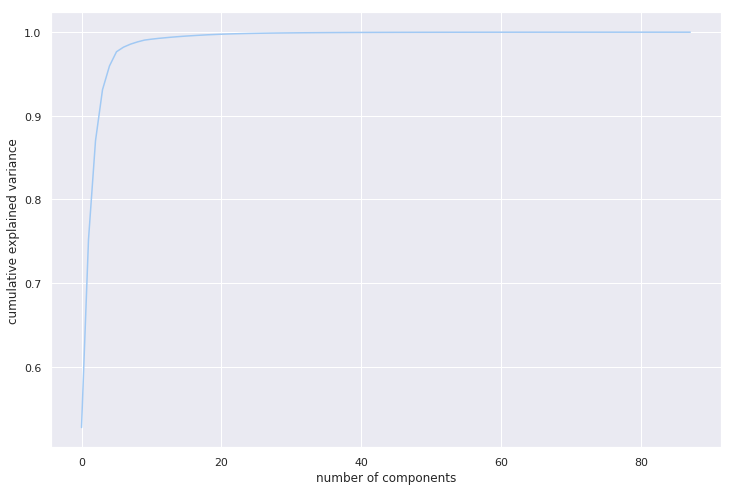

In [124]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### <mark style="background:LightGreen"><b> **From above graphs looks like 30 features explain 95% of variance in the data** </b><br>


In [125]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [126]:
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_train_pca.shape

(18789, 30)

In [127]:
#creating correlation matrix for the principal components
train_corr_pca = np.corrcoef(X_train_pca.transpose())
train_corr_pca.round(3)

array([[ 1.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,
         0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,
        -0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   ,
        -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ],
       [ 0.   , -0.   ,  1.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
         0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
        -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ],
       [-0.   , -0.   , -0.   ,  1.   , -0.   , -0.   ,  0.   , -0.   ,
         0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   , -0.   ,  0.  

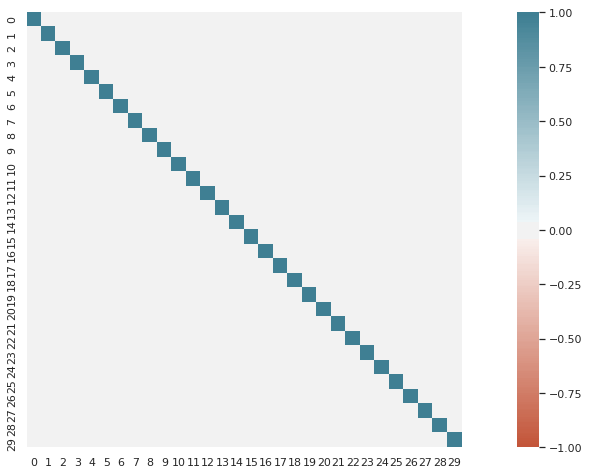

In [128]:
plt.figure(figsize = (20, 8))
corr = train_corr_pca.round(3)
ax = sns.heatmap(
    corr,  
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
) 

In [129]:
train_corr_pca_withoutdiag = train_corr_pca - np.diagflat(train_corr_pca.diagonal())
print("max corr:",train_corr_pca_withoutdiag.max(), "\nmin corr: ", train_corr_pca_withoutdiag.min())

max corr: 0.00284141067370047 
min corr:  -0.001998376057932407


In [130]:
#Applying selected components to the test data - 20 components

X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(8053, 30)

### 6.4 Class Imbalance Handling


#### <mark style="background:Gold"><b> **All About Class Imbalance Techniques**</b><br>
 
<ul><li>In the high level ,there are three main approaches to deal with imbalanced data:</li>

<ol><li>**Data-level methods** that modify the collection of examples to balance distributions and/or remove difficult samples</li>
<li>**Algorithm-level methods** that directly modify existing learning algorithms to alleviate the bias towards majority objects and adapt them to mining data with skewed distributions</li>
<li>**Hybrid methods** that combine the advantages of two previous groups</li></ol>

<ol><li>**Data-level methods**:<br>
Data-level methods concentrate on modifying the training set to make it suitable for a standard learning algorithm</li>
    
1. Undersampling
 - Random undersampling : 
     - Random Under-sampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.
     - It’s obvious that the advantages of this method is that it can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.
    - The disadvantages is that it leaves potentially useful information which could be important for building rule classifiers. And the sample chosen by random under sampling may be a biased sample.


2. Oversampling
 - Random oversampling:
    - Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.
    - The advantage of this method is that unlike under sampling it leads to no information loss. 
    - The weakness is that it increases the likelihood of overfitting since it replicates the minority class events.
 
 - Synthetic Minority Oversampling (SMOTE)
        - To avoid the over-fitting problem, Chawla et al. (2002) propose the Synthetic Minority Over-sampling Technique (SMOTE). This method is considered a state-of-art technique and works well in various applications.
        - This method generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.


3. Combined over and under sampling
 - SMOTEENN
 - SMOTETomek


#### <mark style="background:Gold"><b> **Before the handling class imbalance**</b><br>

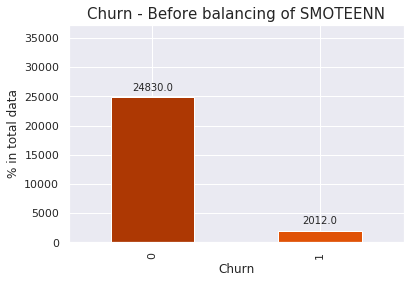

In [131]:
#usage_df['churn'].value_counts().plot('bar').set_title('churned')

values = usage_df['churn'].value_counts()
ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
ax.set_title('Churn - Before balancing of SMOTEENN',fontsize =15)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('% in total data', fontsize=12) 
addDataLabels(ax,display= 'N')  

In [132]:
printmd("**The shape of the Training data set before SMOTE is**")
print("X_train.shape is",X_train_pca.shape)
print('y_train.shape is',y_train.shape)
smtnn = SMOTE(random_state = 100)
X_train_smote, y_train_smote = smtnn.fit_sample(X_train_pca, y_train)
printmd("**The shape of the Training data set after SMOTE**")
print("X_train_resampled.shape is ",X_train_smote.shape)
print('y_train_resampled.shape is',y_train_smote.shape)
 

**The shape of the Training data set before SMOTE is**

X_train.shape is (18789, 30)
y_train.shape is (18789, 1)


**The shape of the Training data set after SMOTE**

X_train_resampled.shape is  (34710, 30)
y_train_resampled.shape is (34710, 1)


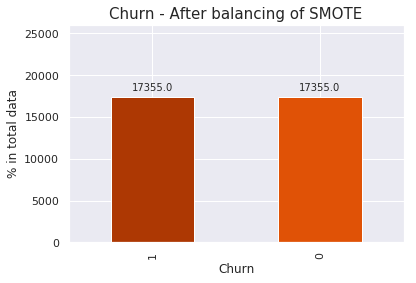

In [133]:
values = y_train_smote['churn'].value_counts()
ax = values.plot.bar(color=sns.color_palette('Oranges_r'))
ax.set_title('Churn - After balancing of SMOTE',fontsize =15)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('% in total data', fontsize=12) 
addDataLabels(ax,display= 'N')  

#### <mark style="background:LightGreen"><b> **Class is successfully balanced now** </b><br>


## 8.  Model Building
<mark style="background:black"><b><font color=white>**Build the model using various classification algorithms**</font> </b></mark> 

1. Following steps are followed:
    1. Run the model first on Scaled data without PCA and evaluate
    2. Run the model then on PCA Data and evaluate
    3. Run the model with Class Weight = Balance and determine the Tunned parameters
    4, Evaluate the model on the Tunned Parameters
    5. Run on different Class Imbalance  Models

#### Below are some generic funtions for model fitting, evaluation and predicting

In [134]:
def modelfit_predict(model,X,y,X_test,y_test,df,Algotype):
    classimb = [SMOTE(random_state=100),
               RandomUnderSampler(random_state=100),RandomOverSampler(random_state=100) ]
    result_table = pd.DataFrame(columns=['classimb','fpr','tpr','auc','prec','recall','aucpr'])
   #print(result_table)
    i=0
    for cls in classimb:
        print("Blancing the class using: ",type(cls).__name__)
        X_resampled, y_resampled = cls.fit_sample(X_train_pca, y_train)
        #print("Blancing the class done")
        
       # print("Fit the model ",type(model).__name__)
        model = model.fit(X_resampled, y_resampled )
        #print("Predicting the model") 
        data_predictions = model.predict(X_test_pca)
        data_predprob= model.predict_proba(X_test_pca)[:, 1:]
        #param_grid='{max_depth: 13, max_features: 15, min_samples_leaf: 200, min_samples_split: 100}'
        #df=evaluatemodel123(Samplescores_df,model,X_test_pca,y_test,pred_test,123, "Decision Tree with Hyperparameters","SMOTETomek", model)
        # runid=Samplescores_df.RunId.max()+1        
        #data_predictions = y_Pred
        #data_predprob = clm.predict_proba(X)[:,1]

        Y = y_test
        fpr, tpr, thresholds = roc_curve(Y, data_predictions)
        p, r, t = precision_recall_curve(Y, data_predprob)


        True_Negative, False_Positive, False_Negative, True_Positive = confusion_matrix(Y, data_predictions).ravel()

        model_f1_score = f1_score(Y, data_predictions)
        model_precision_score = precision_score(Y, data_predictions)
        model_recall_score = recall_score(Y, data_predictions)
        model_accuracy_score = accuracy_score(Y, data_predictions)
        model_accuracy_from_CM = (True_Positive+True_Negative)/((True_Positive+True_Negative+False_Positive+False_Negative))
        model_specificity = (True_Negative / (True_Negative+False_Positive))
        model_sensitivity = (True_Positive / (True_Positive+False_Negative))
        model_auc_roc = metrics.roc_auc_score(y_test, data_predictions)
        model_auc_pr = 0#auc(r,p)
        scores_new=pd.Series({'classimb':  type(cls).__name__, 'fpr':fpr,  'tpr':tpr, 
                                            'auc': roc_auc_score(y_test, data_predictions), 'prec':p, 
                                            'recall':r,   
                                            'aucpr':0})
        result_table = result_table.append(scores_new, ignore_index=True)
       #print('result_table')
        #print(result_table)
        #result_table.set_index('classimb', inplace=True)
        #print('model_f1_score',model_f1_score,'\n')
        #print('model_precision_score',model_precision_score,'\n')
        #print('model_recall_score',model_recall_score,'\n')
        #print('model_accuracy_score',model_accuracy_score,'\n')
       # Algotype = type(model).__name__ + '_Base Model'
        Confusion_matrix_str = [[True_Positive,False_Negative],[False_Positive,True_Negative]]
        new_row = pd.Series({"RunId":i,"Algo":Algotype,  "PCA":'YES',"Tunned_params":"None",
                             "Sampletype": type(cls).__name__,
                             'Accuracy':model_accuracy_score,
                             'Precision':model_precision_score,"Recall" : model_recall_score,
                             "ROC_AUC": model_auc_roc, "Specificity":model_specificity,
                             "Sensitivity":model_sensitivity,
                              "F1_score":model_f1_score,  "Confusion Matrix":Confusion_matrix_str,
                             "Param_Grid": model.get_params }) 

        i=i+1

        df = df.append(new_row, ignore_index=True) 
       # print('scored')
       # print(df)
       
             


        # Set name of the classifiers as index labels
    result_table.set_index('classimb', inplace=True)
        #result_tablepr.set_index('classimb', inplace=True)
    return df,result_table

 
     
    
    
    return  dfc 

In [135]:
def draw_roc_pr_curves(df):
    df.set_index('AlgoType', inplace=True) 
    fig = plt.figure(figsize=(18,6))

    plt.subplot(1,2,1)
    for i in result_table.index:
        plt.plot(df.loc[i]['fpr'], 
                 df.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, df.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.subplot(122)

    for i in result_table.index:
        plt.plot(df.loc[i]['recall'], 
                 df.loc[i]['prec'], 
                #label="{}, AV PR Score={:.3f}".format(i, result_tablepr.loc[i]['auc'])
                )

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Recall", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("Precision", fontsize=15)

    plt.title('Precision Recall Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()



In [136]:
def fitPred_evalmodel(model,PCA,TunnedParams,cls,X_train,y_train,X_test,y_test,df,AlgoType,runid,rt):
    #result_table = pd.DataFrame(columns=['AlgoType','fpr','tpr','auc','prec','recall','aucpr'])
    print("Fit the model ",type(model).__name__)
    model = model.fit(X_train, y_train )
    pred = model.predict_proba(X_train)[:,1]
    print(type(model).__name__,' Train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
    print("Predict using the model") 
    data_predictions = model.predict(X_test)
    data_predprob= model.predict_proba(X_test)[:, 1:]
    print(type(model).__name__,' Test  roc-auc: {}'.format(roc_auc_score(y_test, data_predprob)))
    
    
    Y = y_test
    fpr, tpr, thresholds = roc_curve(Y, data_predictions)
    p, r, t = precision_recall_curve(Y, data_predprob)


    True_Negative, False_Positive, False_Negative, True_Positive = confusion_matrix(Y, data_predictions).ravel()
    train_roc_auc = roc_auc_score(y_train, pred)
    model_f1_score = f1_score(Y, data_predictions)
    model_precision_score = precision_score(Y, data_predictions)
    model_recall_score = recall_score(Y, data_predictions)
    model_accuracy_score = accuracy_score(Y, data_predictions)
    model_accuracy_from_CM = (True_Positive+True_Negative)/((True_Positive+True_Negative+False_Positive+False_Negative))
    model_specificity = (True_Negative / (True_Negative+False_Positive))
    model_sensitivity = (True_Positive / (True_Positive+False_Negative))
    model_auc_roc = metrics.roc_auc_score(y_test, data_predictions)
    model_auc_pr = 0#auc(r,p)
    scores_new=pd.Series({'AlgoType':  AlgoType, 'fpr':fpr,  'tpr':tpr, 
        'auc': roc_auc_score(y_test, data_predictions), 'prec':p, 
        'recall':r,   
        'aucpr':0})
    rt = rt.append(scores_new, ignore_index=True)  

    Confusion_matrix_str = [[True_Positive,False_Negative],[False_Positive,True_Negative]]
    new_row = pd.Series({"RunId":runid,"Algo": type(model).__name__,"PCA":PCA,"Tunned_params":TunnedParams,
         "Sampletype": cls,
         'Accuracy':model_accuracy_score,"Train_ROC_AOC":train_roc_auc,
         'Precision':model_precision_score,"Recall" : model_recall_score,
         "ROC_AUC": model_auc_roc, "Specificity":model_specificity,
         "Sensitivity":model_sensitivity,
          "F1_score":model_f1_score,  "Confusion Matrix":Confusion_matrix_str,
         "Param_Grid":'None'}) 

    df = df.append(new_row, ignore_index=True) 
   # print('*****************MODEL sCORES**********************')
   # print('Accuracy      :',model_accuracy_score)
   # print('Precision     :',model_precision_score),'/n',
   # print("Recall        :" , model_recall_score)
   # print("TRAIN ROC_AUC :",train_roc_auc)
   # print("ROC_AUC       :", model_auc_roc)
   # print( "Specificity  :",model_specificity)
   # print("Sensitivity   :",model_sensitivity)
   # print( "F1_score     :",model_f1_score)
    print('**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##')

    # Set name of the classifiers as index labels
    #t.set_index('AlgoType', inplace=True) 
    return df,rt



In [137]:
# Objects to collect scores
modelscores=[]
modelscores_df = pd.DataFrame(columns = ["RunId",'Algo','PCA' ,'Tunned_params','Sampletype','Accuracy',"Train_ROC_AOC",
                'Precision',"Recall","ROC_AUC","Specificity","Sensitivity","F1_score",
                                         "Confusion Matrix","Param_Grid"])  # Dataframe to collect the Scored details
hyper_dict={}# Dictionary to collect the tuned params

### <mark style="background:Black"><font color=white><b> **8.1 Logistic regression**</font></mark>

## <mark style="background:Gold"><b> **8.1.1 LOGISTIC REGRESSION WITH BASE MODEL - NO PCA - SMOTE**</mark>

In [138]:
# Logistic Regression with Default Parameters 
from sklearn.linear_model import LogisticRegression 
result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])

#Predicting on Test data
pred_test = model.predict(X_test_scaled)
probs= model.predict_proba(X_test_scaled)[:, 1:]

In [139]:
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = LogisticRegression(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",1,result_table)

Fit the model  LogisticRegression
LogisticRegression  Train roc-auc: 0.8988319637466362
Predict using the model
LogisticRegression  Test  roc-auc: 0.8971718878383538
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [140]:
printmd("<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITHOUT PCA MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITHOUT PCA MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 80.623%
MODEL F1_Score      : 42.969%
MODEL PRECISION     : 29.290%
MODEL ACCURACY      : 84.639%
MODEL TRAIN ROC AUC SORE  : 89.883%
MODEL TEST ROC AUC SORE  : 82.786%


## <mark style="background:Gold"><b> **8.1.2 LOGISTIC REGRESSION WITH PCA - CLASS WEIGHT**</mark>

In [141]:
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = LogisticRegression(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  LogisticRegression
LogisticRegression  Train roc-auc: 0.8710525184362805
Predict using the model
LogisticRegression  Test  roc-auc: 0.8646514911296015
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [142]:
printmd("<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITH PCA-CLASS WEIGHT MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0]))  
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITH PCA-CLASS WEIGHT MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 79.931%
MODEL F1_Score      : 36.580%
MODEL PRECISION     : 23.717%
MODEL ACCURACY      : 80.107%
MODEL TRAIN ROC AUC SORE  : 87.105%
MODEL TEST ROC AUC SORE  : 80.026%


## <mark style="background:Gold"><b> **8.1.3 Logistic Regression - HyperTuning**</mark>

In [143]:
from sklearn.model_selection import GridSearchCV

LR_GRIDSEARCHCV = LogisticRegression(class_weight='balanced',n_jobs = -1, random_state = 44)

param_grid = [
    { 
    'penalty' : ['l1', 'l2'],
    'C' : [0.1, 1,2,3,4,5,10,20,50,100],
    'solver' : ['liblinear','sag','saga']}
]
 
gcv = GridSearchCV(estimator = LR_GRIDSEARCHCV  , param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = -1, cv = 3, verbose = 2)

gcv = gcv.fit(X_train_pca,y_train)

scores = gcv.cv_results_ 
gcv.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   24.7s finished


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [144]:
hyper_dict["LR_C"] = gcv.best_params_['C']
hyper_dict["LR_penalty"] = gcv.best_params_['penalty']
hyper_dict["LR_solver"] = gcv.best_params_['solver'] 

In [145]:
# Logistic with best parameters obtained from grid search
runid=modelscores_df.RunId.max()+1
model = LogisticRegression(class_weight='balanced',C = hyper_dict["LR_C"],penalty = hyper_dict["LR_penalty"] , solver=hyper_dict["LR_solver"] , n_jobs = -1,random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca,y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)


Fit the model  LogisticRegression
LogisticRegression  Train roc-auc: 0.8713966328700005
Predict using the model
LogisticRegression  Test  roc-auc: 0.8648176736758052
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [146]:
printmd("<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITH TUNNED PARAMS MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**LOGISTIC REGRESSION WITH TUNNED PARAMS MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 79.931%
MODEL F1_Score      : 36.250%
MODEL PRECISION     : 23.440%
MODEL ACCURACY      : 79.821%
MODEL TRAIN ROC AUC SORE  : 87.140%
MODEL TEST ROC AUC SORE  : 79.872%


No handles with labels found to put in legend.


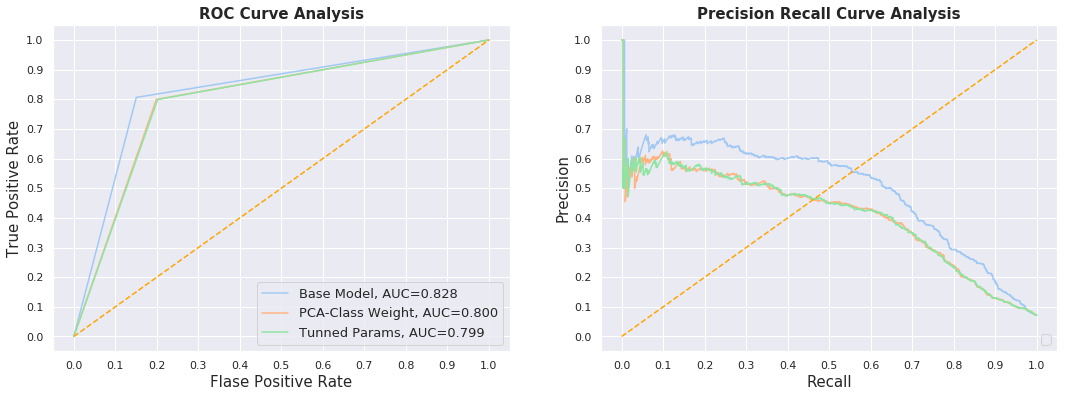

In [147]:
# ROC Curves of all three models for analysis
draw_roc_pr_curves(result_table)

In [148]:
printmd('**Base model, PCA model and Tuned model score details**')
LogisticRegression=modelscores_df[modelscores_df['Algo'].str.contains("LogisticRegression")]
LogisticRegression[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score',"Train_ROC_AOC",'ROC_AUC','Confusion Matrix']]

**Base model, PCA model and Tuned model score details**

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score  Train_ROC_AOC   ROC_AUC            Confusion Matrix
0  LogisticRegression   NO            NO  Class Weight   0.292898  0.806228  0.846393  0.429691       0.898832  0.827863  [[466, 112], [1125, 6350]]
1  LogisticRegression  YES            NO  Class Weight   0.237166  0.799308  0.801068  0.365796       0.871053  0.800256  [[462, 116], [1486, 5989]]
2  LogisticRegression  YES           YES  Class Weight   0.234399  0.799308  0.798212  0.362495       0.871397  0.798718  [[462, 116], [1509, 5966]]

#### <mark style="background:Lime"><b> Observations: </b></mark>
-**Since the class is imbalance with more 0's the model also predicted more 0's which is shown in True 
    negative of confusion matrix**
-**There is a slight increase in Recall and Precision when compared between PCA and hyper tunned model**
    
<br> 


### <mark style="background:Black"><font color=white><b> **8.2 Decision Tree**</font></mark>

## <mark style="background:Gold"><b> **8.2.1 DECISISON TREE CLASSIFIER WITH BASE MODEL - NO PCA - CLASS WEIGHT**</mark>

In [149]:
# Decision Tree with Default Parameters
# Logistic Regression with Default Parameters 
from sklearn.tree import DecisionTreeClassifier
result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])


In [150]:
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = DecisionTreeClassifier(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

Fit the model  DecisionTreeClassifier
DecisionTreeClassifier  Train roc-auc: 1.0
Predict using the model
DecisionTreeClassifier  Test  roc-auc: 0.7059078126627397
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [151]:
printmd("<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 45.329%
MODEL F1_Score      : 45.565%
MODEL PRECISION     : 45.804%
MODEL ACCURACY      : 92.226%
MODEL TRAIN ROC AUC SORE  : 100.000%
MODEL TEST ROC AUC SORE  : 70.591%


## <mark style="background:Gold"><b> **8.2.2 DECISISON TREE CLASSIFIER WITH PCA - CLASS WEIGHT**</mark>

In [152]:
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = DecisionTreeClassifier(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  DecisionTreeClassifier
DecisionTreeClassifier  Train roc-auc: 1.0
Predict using the model
DecisionTreeClassifier  Test  roc-auc: 0.6410822696184514
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [153]:
printmd("<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 32.872%
MODEL F1_Score      : 34.050%
MODEL PRECISION     : 35.316%
MODEL ACCURACY      : 90.861%
MODEL TRAIN ROC AUC SORE  : 100.000%
MODEL TEST ROC AUC SORE  : 64.108%


## <mark style="background:Gold"><b> **8.2.3 DECISION TREE with HYPERTUNNING**</mark>

#### Decision Tree - HyperTuning 

In [154]:
# GridSearchCV to find optimal parametes
# Create a based model

model = DecisionTreeClassifier(class_weight='balanced', random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   # 'max_depth': range(5,15,2),
    #'min_samples_leaf': range(50, 300, 50),
   # 'min_samples_split': range(100, 300, 50),
   # 'max_features': [8,10,15,20] 
    'criterion':['gini','entropy'],
     'max_features': range(1,20,2),
    'min_samples_split': range(50, 300, 50),
    'min_samples_leaf':range(10, 300, 50), 
    'max_depth': range(5,15,2)
}

scoring_met=['precision','recall','f1'] 
  
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv =2 , n_jobs = -1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

grid_search.best_params_

Fitting 2 folds for each of 3000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3705 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4312 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5130 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  4.0min finished


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [155]:
hyper_dict["DT_criterion"] = grid_search.best_params_['criterion']
hyper_dict["DT_max_features"] = grid_search.best_params_['max_features']
hyper_dict["DT_min_samples_split"] = grid_search.best_params_['min_samples_split'] 
hyper_dict["DT_min_samples_leaf"] = grid_search.best_params_['min_samples_leaf']
hyper_dict["DT_max_depth"] = grid_search.best_params_['max_depth'] 

In [156]:
# Logistic with best parameters obtained from grid search
runid=modelscores_df.RunId.max()+1
model = DecisionTreeClassifier( class_weight='balanced',
                               criterion='gini',
                               max_depth= hyper_dict["DT_max_depth"] ,
                               max_features=hyper_dict["DT_max_features"] ,
                               min_samples_leaf= hyper_dict["DT_min_samples_leaf"],
                               min_samples_split= hyper_dict["DT_min_samples_split"],
                               random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)


Fit the model  DecisionTreeClassifier
DecisionTreeClassifier  Train roc-auc: 0.9024639300648891
Predict using the model
DecisionTreeClassifier  Test  roc-auc: 0.809717165638634
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [157]:
printmd("<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**DECISION TREE CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 72.664%
MODEL F1_Score      : 36.474%
MODEL PRECISION     : 24.348%
MODEL ACCURACY      : 81.833%
MODEL TRAIN ROC AUC SORE  : 90.246%
MODEL TEST ROC AUC SORE  : 77.603%


No handles with labels found to put in legend.


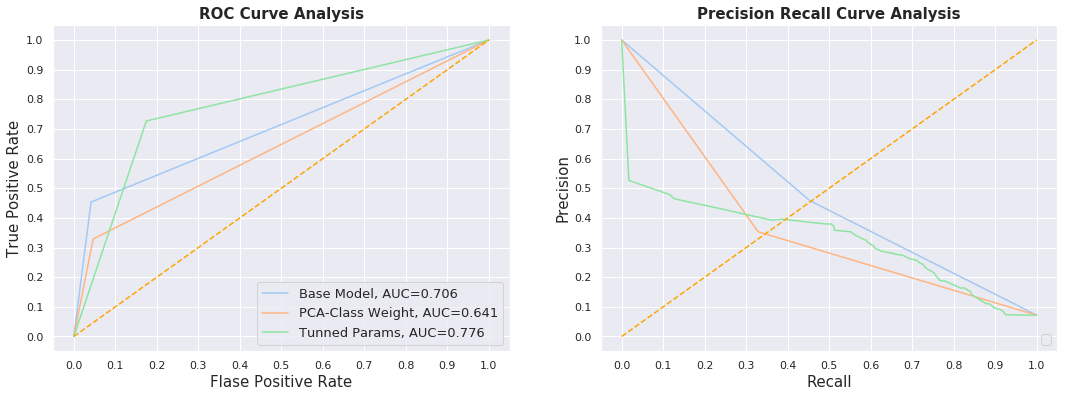

In [158]:
draw_roc_pr_curves(result_table)

In [159]:
printmd('**Base model, Model with PCA & Model with Class balance - Scores**')
DecisionTreeClassifier=modelscores_df[modelscores_df['Algo'].str.contains("DecisionTreeClassifier")]
DecisionTreeClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score',"Train_ROC_AOC",'ROC_AUC','Confusion Matrix']]

**Base model, Model with PCA & Model with Class balance - Scores**

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score  Train_ROC_AOC   ROC_AUC            Confusion Matrix
3  DecisionTreeClassifier   NO            NO  Class Weight   0.458042  0.453287  0.922265  0.455652       1.000000  0.705908   [[262, 316], [310, 7165]]
4  DecisionTreeClassifier  YES            NO  Class Weight   0.353160  0.328720  0.908605  0.340502       1.000000  0.641082   [[190, 388], [348, 7127]]
5  DecisionTreeClassifier  YES           YES  Class Weight   0.243478  0.726644  0.818329  0.364742       0.902464  0.776031  [[420, 158], [1305, 6170]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
1.**TH
     


## <mark style="background:Black"><font color=white><b> **8.3 RANDOM FOREST**</font></mark>

In [160]:
from sklearn.ensemble import RandomForestClassifier
result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])


## <mark style="background:Gold"><b> **8.3.1 RANDOM FOREST CLASSIFIER WITH BASE MODEL - NO PCA - CLASS WEIGHT**</mark>

In [161]:
%%time
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = RandomForestClassifier(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

Fit the model  RandomForestClassifier
RandomForestClassifier  Train roc-auc: 1.0
Predict using the model
RandomForestClassifier  Test  roc-auc: 0.9189312703243799
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 7.18 s, sys: 0 ns, total: 7.18 s
Wall time: 7.17 s


In [162]:
printmd("<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 40.484%
MODEL F1_Score      : 53.486%
MODEL PRECISION     : 78.788%
MODEL ACCURACY      : 94.946%
MODEL TRAIN ROC AUC SORE  : 100.000%
MODEL TEST ROC AUC SORE  : 69.821%


## <mark style="background:Gold"><b> **8.3.2 RANDOM FOREST CLASSIFIER WITH  PCA - CLASS WEIGHT**</mark>

In [163]:
%%time
#Calculating the scores
runid=modelscores_df.RunId.max()+1
model = RandomForestClassifier(class_weight='balanced',random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  RandomForestClassifier
RandomForestClassifier  Train roc-auc: 1.0
Predict using the model
RandomForestClassifier  Test  roc-auc: 0.8826733864901459
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 8.24 s, sys: 4.39 ms, total: 8.24 s
Wall time: 8.24 s


In [164]:
printmd("<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER WITH PCA SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER WITH PCA SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 17.301%
MODEL F1_Score      : 27.397%
MODEL PRECISION     : 65.789%
MODEL ACCURACY      : 93.419%
MODEL TRAIN ROC AUC SORE  : 100.000%
MODEL TEST ROC AUC SORE  : 58.303%


## <mark style="background:Gold"><b> **8.2.3 RANDOM FOREST CLASSIFIER WITH HYPERTUNNING**</mark>

#### Random Forest Classifier - HyperTuning - n-estimators

In [165]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   'n_estimators': range(0,200,20),
   # 'max_depth': range(5,30,5),
    #'min_samples_leaf': range(0, 200, 50),
   # 'min_samples_split': range(0, 300, 50),
   # 'max_features': [8,10,15,20]
}
  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["RFC_estimator"] = grid_search.best_params_['n_estimators']

print('*************************************************')
print("the best value for n_estimators = ",grid_search.best_params_['n_estimators'])
print('************************************************')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.5s finished


*************************************************
the best value for n_estimators =  100
************************************************
CPU times: user 7.83 s, sys: 2.35 ms, total: 7.83 s
Wall time: 52.2 s


#### Random Forest Classifier - HyperTuning - max_depth

In [166]:
# GridSearchCV to find optimal parametes
# Create a based model  
model = RandomForestClassifier(class_weight='balanced',n_estimators =  80, random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   #'n_estimators': range(0,200,20),
    'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 200, 50),
   # 'min_samples_split': range(0, 300, 50),
   # 'max_features': [8,10,15,20]
}
  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["RFC_maxdepth"] = grid_search.best_params_['max_depth']
print('*************************************************')
print("the best value for max_depth = ",grid_search.best_params_['max_depth'])
print('************************************************')

Fitting 3 folds for each of 23 candidates, totalling 69 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:  1.3min finished


*************************************************
the best value for max_depth =  7
************************************************


#### Random Forest Classifier - HyperTuning - min_samples_leaf

In [167]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 
model = RandomForestClassifier(class_weight='balanced',n_estimators =  80,max_depth =  5, random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   #'n_estimators': range(0,200,20),
    #'max_depth': range(5,50,2),
    'min_samples_leaf': range(0, 300, 10),
   # 'min_samples_split': range(0, 300, 50),
   # 'max_features': [8,10,15,20]
}
  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["RFC_minsamplesleaf"] = grid_search.best_params_['min_samples_leaf']
print('*************************************************')
print("the best value for min_samples_leaf = ",grid_search.best_params_['min_samples_leaf'])
print('************************************************')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   53.3s finished


*************************************************
the best value for min_samples_leaf =  10
************************************************
CPU times: user 3.63 s, sys: 35.7 ms, total: 3.67 s
Wall time: 56.5 s


#### Random Forest Classifier - HyperTuning - min_samples_split

In [168]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 
model = RandomForestClassifier(class_weight='balanced',n_estimators =  80,max_depth =  5,min_samples_leaf =  280, random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   #'n_estimators': range(0,200,20),
    #'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 300, 10),
    'min_samples_split': range(0, 300, 10),
   # 'max_features': [8,10,15,20]
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')


    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["RFC_minsamplessplit"] = grid_search.best_params_['min_samples_split']
print('*************************************************')
print("the best value for min_samples_split = ",grid_search.best_params_['min_samples_split'])
print('************************************************')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   49.3s finished


*************************************************
the best value for min_samples_split =  10
************************************************
CPU times: user 3.45 s, sys: 18.6 ms, total: 3.47 s
Wall time: 52.3 s


#### Random Forest Classifier - HyperTuning - max_features

In [169]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced',n_estimators =  80,max_depth =  5,min_samples_leaf =  280,min_samples_split =  290, random_state=100)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   #'n_estimators': range(0,200,20),
    #'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 300, 10),
    #'min_samples_split': range(0, 300, 10),
    'max_features': range(5,22,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["RFC_maxfeatures"] = grid_search.best_params_['max_features']
print('*************************************************')
print("the best value for max_features = ",grid_search.best_params_['max_features'])
print('************************************************')

Fitting 3 folds for each of 17 candidates, totalling 51 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:  1.2min finished


*************************************************
the best value for max_features =  9
************************************************
CPU times: user 6.2 s, sys: 3.27 ms, total: 6.2 s
Wall time: 1min 17s


In [170]:
# Logistic with best parameters obtained from grid search
runid=modelscores_df.RunId.max()+1
model = RandomForestClassifier(class_weight='balanced',n_estimators = hyper_dict["RFC_estimator"],max_depth =hyper_dict["RFC_maxdepth"] ,max_features=hyper_dict["RFC_maxfeatures"], min_samples_split = hyper_dict["RFC_minsamplessplit"], min_samples_leaf = hyper_dict["RFC_minsamplesleaf"], random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)


Fit the model  RandomForestClassifier
RandomForestClassifier  Train roc-auc: 0.9442257766784117
Predict using the model
RandomForestClassifier  Test  roc-auc: 0.8861253775560982
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [171]:
printmd("<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**RANDOM FOREST CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 70.242%
MODEL F1_Score      : 47.597%
MODEL PRECISION     : 35.993%
MODEL ACCURACY      : 88.899%
MODEL TRAIN ROC AUC SORE  : 94.423%
MODEL TEST ROC AUC SORE  : 80.292%


No handles with labels found to put in legend.


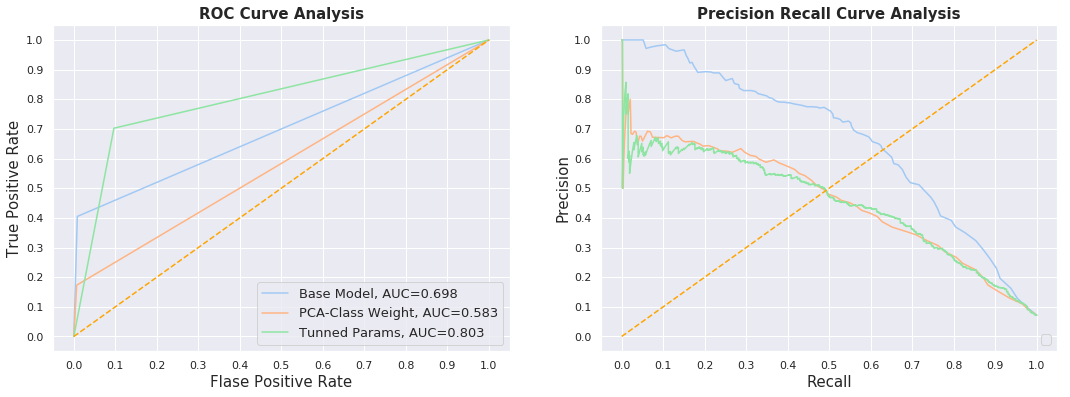

In [172]:
draw_roc_pr_curves(result_table)

In [173]:
printmd('**Base model, Model with PCA & Model with Class balance - Scores**')
RandomForestClassifier=modelscores_df[modelscores_df['Algo'].str.contains("RandomForestClassifier")]
RandomForestClassifier[['Algo','PCA','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

**Base model, Model with PCA & Model with Class balance - Scores**

Algo  PCA    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC           Confusion Matrix
6  RandomForestClassifier   NO  Class Weight   0.787879  0.404844  0.949460  0.534857  0.698208   [[234, 344], [63, 7412]]
7  RandomForestClassifier  YES  Class Weight   0.657895  0.173010  0.934186  0.273973  0.583027   [[100, 478], [52, 7423]]
8  RandomForestClassifier  YES  Class Weight   0.359929  0.702422  0.888985  0.475967  0.802917  [[406, 172], [722, 6753]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **Recall, F1 and Accuracy have improved but the Precision has reduced**
- **Tuned Model ROC Curve is aligned more towards Y axis compared to other models**
     


## <mark style="background:Black"><font color=white><b> **8.4 SVM **</font></mark>

In [174]:
from sklearn.svm import SVC
result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])


## <mark style="background:Gold"><b> **8.4.1 SUPPORT VECTOR CLASSIFIER WITH BASE MODEL - NO PCA - CLASS WEIGHT**</mark>


In [175]:
%%time

runid=modelscores_df.RunId.max()+1
model = SVC(class_weight='balanced',probability = True,random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)


Fit the model  SVC
SVC  Train roc-auc: 0.9025954642310243
Predict using the model
SVC  Test  roc-auc: 0.8713478608047586
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 5min 25s, sys: 158 ms, total: 5min 25s
Wall time: 5min 25s


In [176]:
printmd("<mark style=background:GOLD><font color=BLACK>**SUPPORT VECTOR CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**SUPPORT VECTOR CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 75.779%
MODEL F1_Score      : 40.763%
MODEL PRECISION     : 27.880%
MODEL ACCURACY      : 84.192%
MODEL TRAIN ROC AUC SORE  : 90.260%
MODEL TEST ROC AUC SORE  : 80.311%


## <mark style="background:Gold"><b> **8.4.2 SUPPORT VECTOR CLASSIFIER WITH  PCA - CLASS WEIGHT**</mark>

In [177]:
%%time

runid=modelscores_df.RunId.max()+1
model = SVC(class_weight='balanced',random_state=44,probability = True)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  SVC
SVC  Train roc-auc: 0.8894950269356738
Predict using the model
SVC  Test  roc-auc: 0.8511187233106895
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 2min 6s, sys: 0 ns, total: 2min 6s
Wall time: 2min 6s


In [178]:
printmd("<mark style=background:GOLD><font color=BLACK>**SVC GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</mark>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**SVC GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</mark>

MODEL RECALL        : 74.567%
MODEL F1_Score      : 37.187%
MODEL PRECISION     : 24.770%
MODEL ACCURACY      : 81.920%
MODEL TRAIN ROC AUC SORE  : 88.950%
MODEL TEST ROC AUC SORE  : 78.528%


## <mark style="background:Gold"><b> **8.4.3 SVM with HYPERTUNNING - LINEAR MODEL**</mark>

#### SVM - HyperTuning -  Parameter to be tuned: C

In [179]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model
from sklearn.ensemble import RandomForestClassifier

model = SVC(class_weight='balanced', probability = True, random_state=44)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid  = {"C": [0.1, 1, 10, 100, 1000]}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["SVC_C"] = grid_search.best_params_['C']
print('*************************************************')
print("the best value for C = ",grid_search.best_params_['C'])
print('************************************************')

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.5min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished


*************************************************
the best value for C =  1000
************************************************
CPU times: user 2min 20s, sys: 194 ms, total: 2min 20s
Wall time: 4min 26s


In [180]:
%%time
# svc with best parameters obtained from grid search

runid=modelscores_df.RunId.max()+1
model = SVC(class_weight='balanced',C=hyper_dict["SVC_C"], probability = True, random_state=44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)


Fit the model  SVC
SVC  Train roc-auc: 0.9469110264888554
Predict using the model
SVC  Test  roc-auc: 0.8108460728379489
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 2min 36s, sys: 344 µs, total: 2min 36s
Wall time: 2min 36s


In [181]:
printmd("<mark style=background:GOLD><font color=BLACK>**SUPORT VECTOR CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0])) 


<mark style=background:GOLD><font color=BLACK>**SUPORT VECTOR CLASSIFIER GRIDSEARCHCV MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 66.436%
MODEL F1_Score      : 41.424%
MODEL PRECISION     : 30.094%
MODEL ACCURACY      : 86.514%
MODEL TRAIN ROC AUC SORE  : 94.691%
MODEL TEST ROC AUC SORE  : 77.251%


No handles with labels found to put in legend.


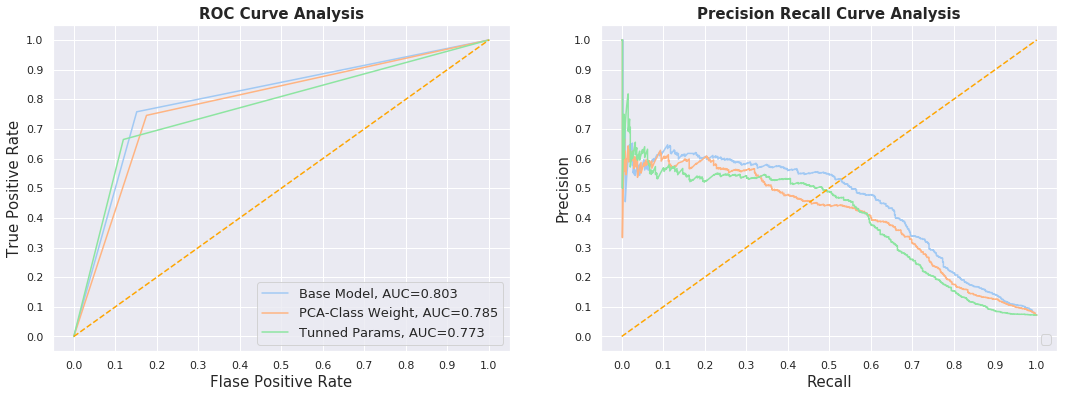

In [182]:
draw_roc_pr_curves(result_table)

In [183]:
SVC=modelscores_df[modelscores_df['Algo'].str.contains("SVC")]
SVC[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC            Confusion Matrix
9   SVC   NO            NO  Class Weight   0.278803  0.757785  0.841922  0.407631  0.803107  [[438, 140], [1133, 6342]]
10  SVC  YES            NO  Class Weight   0.247701  0.745675  0.819198  0.371872  0.785279  [[431, 147], [1309, 6166]]
11  SVC  YES           YES  Class Weight   0.300940  0.664360  0.865143  0.414239  0.772514   [[384, 194], [892, 6583]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **The tuned Model looks to be very good from Accuracy perspective compared to default one**
- **Precision too has increased**
- **ROC Curve Also says the same thing**
     


## <mark style="background:Black"><font color=white><b> **8.5 Boosting Methods **</font></mark>

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])

## <mark style="background:Gold"><b> **8.5.1 ADABOOST ON DECISION TREE CLASSIFIER WITH BASE MODEL**</mark> 

In [185]:
%%time
# Adaboost with Default Parameters

DT_HT =  DecisionTreeClassifier( class_weight='balanced',  criterion=hyper_dict['LGB_criterion'],  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
 
runid=modelscores_df.RunId.max()+1
model = AdaBoostClassifier(base_estimator = DT_HT, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

KeyError: 'criterion'

In [186]:
printmd("<mark style=background:GOLD><font color=BLACK>**ADABOOST ON DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**ADABOOST ON DECISION TREE CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 66.436%
MODEL F1_Score      : 41.424%
MODEL PRECISION     : 30.094%
MODEL ACCURACY      : 86.514%
MODEL TRAIN ROC AUC SORE  : 94.691%
MODEL TEST ROC AUC SORE  : 77.251%


## <mark style="background:Gold"><b> **8.5.2 ADABOOST ON DECISION TREE CLASSIFIER   PCA - CLASS WEIGHT**</mark>

In [187]:
%%time
# Adaboost with Default Parameters

DT_HT =  DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
 
runid=modelscores_df.RunId.max()+1
model = AdaBoostClassifier(base_estimator = DT_HT, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  AdaBoostClassifier
AdaBoostClassifier  Train roc-auc: 1.0
Predict using the model
AdaBoostClassifier  Test  roc-auc: 0.7490171390216523
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 11.5 s, sys: 0 ns, total: 11.5 s
Wall time: 11.5 s


In [188]:
printmd("<mark style=background:GOLD><font color=BLACK>** ADABOOST ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>** ADABOOST ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 31.142%
MODEL F1_Score      : 35.122%
MODEL PRECISION     : 40.268%
MODEL ACCURACY      : 91.742%
MODEL TRAIN ROC AUC SORE  : 100.000%
MODEL TEST ROC AUC SORE  : 63.785%


## <mark style="background:Gold"><b> **8.5.3 ADABOOST - DECISION TREE with HYPERTUNNING MODEL**</mark>

#### Adaboost - HyperTuning n_estimators

In [189]:
DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
model = AdaBoostClassifier(base_estimator = DT_HT, random_state = 44)

In [190]:
%%time 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   'n_estimators': range(0,200,20) 
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["ABC_estimator"] = grid_search.best_params_['n_estimators']
print('*************************************************')
print("the best value for n_estimators = ",grid_search.best_params_['n_estimators'])
print('************************************************')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


*************************************************
the best value for n_estimators =  20
************************************************
CPU times: user 4.94 s, sys: 177 ms, total: 5.12 s
Wall time: 2min 15s


#### Adaboost - HyperTuning learning_rate

In [191]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   #'n_estimators': range(0,200,20),
    'learning_rate':  np.arange(0,2 , 0.2) 
} 

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 2,scoring = 'recall')#,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["ABC_learningrate"] = grid_search.best_params_['learning_rate']
print('*************************************************')
print("the best value for learning_rate = ",grid_search.best_params_['learning_rate'])
print('************************************************')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


*************************************************
the best value for learning_rate =  0.2
************************************************
CPU times: user 10.8 s, sys: 8.24 ms, total: 10.8 s
Wall time: 1min 13s


In [192]:
%%time
# Adaboost with Default Parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44) 
runid=modelscores_df.RunId.max()+1
model = AdaBoostClassifier(base_estimator = DT_HT,learning_rate=hyper_dict["ABC_learningrate"] ,n_estimators=hyper_dict["ABC_estimator"] ,random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)

Fit the model  AdaBoostClassifier
AdaBoostClassifier  Train roc-auc: 0.9948097345328317
Predict using the model
AdaBoostClassifier  Test  roc-auc: 0.734083160708706
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 4.46 s, sys: 8 µs, total: 4.46 s
Wall time: 4.46 s


In [193]:
printmd("<mark style=background:GOLD><font color=BLACK>** ADABOOST ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>** ADABOOST ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 48.270%
MODEL F1_Score      : 37.349%
MODEL PRECISION     : 30.459%
MODEL ACCURACY      : 88.377%
MODEL TRAIN ROC AUC SORE  : 99.481%
MODEL TEST ROC AUC SORE  : 69.874%


No handles with labels found to put in legend.


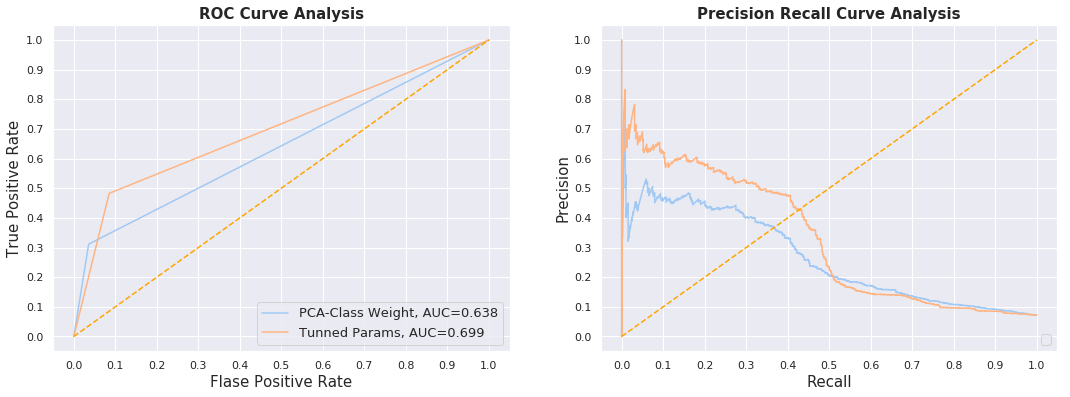

In [194]:
draw_roc_pr_curves(result_table)

In [195]:
AdaBoostClassifier=modelscores_df[modelscores_df['Algo'].str.contains("AdaBoostClassifier")]
AdaBoostClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC           Confusion Matrix
12  AdaBoostClassifier  YES            NO  Class Weight   0.402685  0.311419  0.917422  0.351220  0.637850  [[180, 398], [267, 7208]]
13  AdaBoostClassifier  YES           YES  Class Weight   0.304585  0.482699  0.883770  0.373494  0.698741  [[279, 299], [637, 6838]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **Recall is better than untuned model**
     


<hr>

## <mark style="background:Black"><font color=white><b> **8.5 XGBoost **</font></mark>

In [196]:
from xgboost import XGBClassifier

result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])

## <mark style="background:Gold"><b> **8.5.1 XGBBOOST CLASSIFIER WITH BASE MODEL**</mark> 

In [197]:
%%time
# xgb with Default Parameters
runid=modelscores_df.RunId.max()+1
model = XGBClassifier(n_jobs = -1, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

Fit the model  XGBClassifier
XGBClassifier  Train roc-auc: 0.99989918459666
Predict using the model
XGBClassifier  Test  roc-auc: 0.9209982525372928
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 13.4 s, sys: 39.9 ms, total: 13.4 s
Wall time: 11.9 s


In [198]:
printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 48.270%
MODEL F1_Score      : 58.246%
MODEL PRECISION     : 73.421%
MODEL ACCURACY      : 95.033%
MODEL TRAIN ROC AUC SORE  : 99.990%
MODEL TEST ROC AUC SORE  : 73.459%


## <mark style="background:Gold"><b> **8.5.2 XGBBOOST CLASSIFIER WITH PCA **</mark> 

In [199]:
%%time
# xgbOost with Default Parameters
 
runid=modelscores_df.RunId.max()+1
model = XGBClassifier(random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  XGBClassifier
XGBClassifier  Train roc-auc: 0.9998478326295542
Predict using the model
XGBClassifier  Test  roc-auc: 0.8935008274409508
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 8.47 s, sys: 3.87 ms, total: 8.47 s
Wall time: 8.47 s


In [200]:
printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 34.602%
MODEL F1_Score      : 44.994%
MODEL PRECISION     : 64.309%
MODEL ACCURACY      : 93.928%
MODEL TRAIN ROC AUC SORE  : 99.985%
MODEL TEST ROC AUC SORE  : 66.559%


## <mark style="background:Gold"><b> **8.5.1 XGBBOOST CLASSIFIER WITH HYPERPARAMETER TUNING **</mark> 

#### XGBoost - HyperTuning max_depth

In [201]:
%%time
# GridSearchCV to find optimal max_depth

model = XGBClassifier(n_jobs = -1, random_state = 100)


# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': range(4, 20,2)} 


  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["XGB_maxdepth"] = grid_search.best_params_['max_depth']
print('*************************************************')
print("the best value for max_depth = ",grid_search.best_params_['max_depth'])
print('************************************************')

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   25.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   31.6s finished


*************************************************
the best value for max_depth =  4
************************************************
CPU times: user 6.2 s, sys: 7.24 ms, total: 6.21 s
Wall time: 37.8 s


<hr>

#### XGBoost - HyperTuning n_estimators

In [202]:
%%time
# GridSearchCV to find optimal max_depth

model = XGBClassifier(n_jobs = -1, random_state = 100)


# Create the parameter grid based on the results of random search 

param_grid = {'n_estimators': range(0, 1100, 100)}

  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["XGB_estimator"] = grid_search.best_params_['n_estimators']
print('*************************************************')
print("the best value for n_estimators = ",grid_search.best_params_['n_estimators'])
print('************************************************')

Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:  1.9min remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  2.1min finished


*************************************************
the best value for n_estimators =  400
************************************************
CPU times: user 31.5 s, sys: 7.4 ms, total: 31.5 s
Wall time: 2min 35s


In [203]:
%%time
# GridSearchCV to find optimal max_depth

model = XGBClassifier(n_jobs = -1, random_state = 100)


# Create the parameter grid based on the results of random search 

param_grid = {'min_child_weight': range(1, 40, 3)}

  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["XGB_minchildwt"] = grid_search.best_params_['min_child_weight']

print('*************************************************')
print("the best value for min_child_weight = ",grid_search.best_params_['min_child_weight'])
print('************************************************')

Fitting 2 folds for each of 13 candidates, totalling 26 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   30.9s finished


*************************************************
the best value for min_child_weight =  34
************************************************
CPU times: user 6.9 s, sys: 11.5 ms, total: 6.91 s
Wall time: 37.8 s


In [204]:
%%time
# GridSearchCV to find optimal max_depth

model = XGBClassifier(n_jobs = -1, random_state = 100)


# Create the parameter grid based on the results of random search 

param_grid = {'subsample':  np.arange(0, 1, 0.1)}

  
scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["XGB_subsample"] = grid_search.best_params_['subsample']

print('*************************************************')
print("the best value for subsample= ",grid_search.best_params_['subsample'])
print('************************************************')

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   17.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.1s finished


*************************************************
the best value for subsample=  0.7000000000000001
************************************************
CPU times: user 7.95 s, sys: 4.04 ms, total: 7.96 s
Wall time: 28 s


In [275]:
# Logistic with best parameters obtained from grid search
runid=modelscores_df.RunId.max()+1
model = XGBClassifier(n_jobs = -1, max_depth =  hyper_dict["XGB_maxdepth"] , 
                      n_estimators = hyper_dict["XGB_estimator"],min_child_weight =  hyper_dict["XGB_minchildwt"],
                      subsample =  hyper_dict["XGB_subsample"] ,  random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)


Fit the model  XGBClassifier
XGBClassifier  Train roc-auc: 0.9940386714868403
Predict using the model
XGBClassifier  Test  roc-auc: 0.8843674995081645
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [206]:
printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 37.024%
MODEL F1_Score      : 45.874%
MODEL PRECISION     : 60.282%
MODEL ACCURACY      : 93.729%
MODEL TRAIN ROC AUC SORE  : 99.404%
MODEL TEST ROC AUC SORE  : 67.569%


No handles with labels found to put in legend.


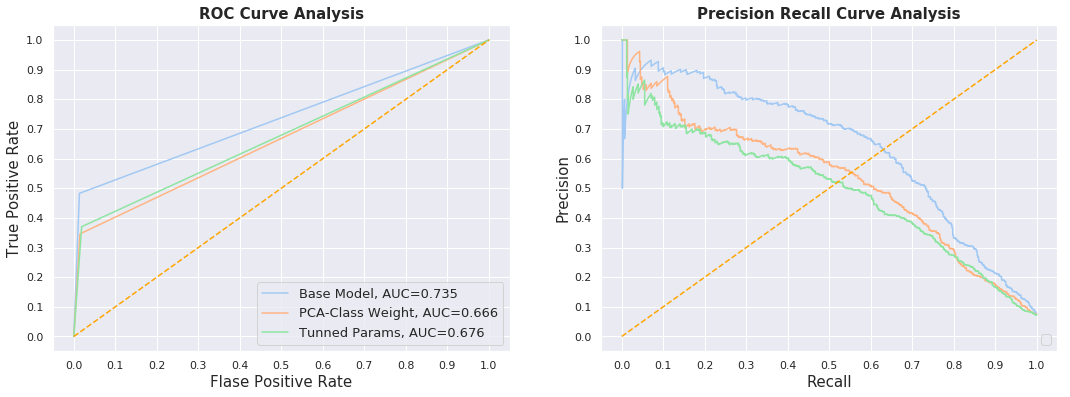

In [207]:
draw_roc_pr_curves(result_table)

In [208]:
XGBClassifier=modelscores_df[modelscores_df['Algo'].str.contains("XGBClassifier")]
XGBClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC           Confusion Matrix
14  XGBClassifier   NO            NO  Class Weight   0.734211  0.482699  0.950329  0.582463  0.734594  [[279, 299], [101, 7374]]
15  XGBClassifier  YES            NO  Class Weight   0.643087  0.346021  0.939277  0.449944  0.665586  [[200, 378], [111, 7364]]
16  XGBClassifier  YES           YES  Class Weight   0.602817  0.370242  0.937290  0.458735  0.675690  [[214, 364], [141, 7334]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **XGBoost shows improvement in Recall,Accuracy F1 score too**
     


## <mark style="background:Black"><font color=white><b> **8.6LightGBM **</font></mark>

In [209]:


from lightgbm import LGBMClassifier

result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])

## <mark style="background:Gold"><b> **8.5.1 LightGBM CLASSIFIER WITH BASE MODEL**</mark> 

In [210]:

%%time
# LGBMClassifier with Default Parameters
 
runid=modelscores_df.RunId.max()+1
model =LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

Fit the model  LGBMClassifier
LGBMClassifier  Train roc-auc: 0.9916304329919111
Predict using the model
LGBMClassifier  Test  roc-auc: 0.9240330513476295
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 2.48 s, sys: 0 ns, total: 2.48 s
Wall time: 2.48 s


In [211]:
printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 75.952%
MODEL F1_Score      : 60.096%
MODEL PRECISION     : 49.717%
MODEL ACCURACY      : 92.760%
MODEL TRAIN ROC AUC SORE  : 99.163%
MODEL TEST ROC AUC SORE  : 85.006%


## <mark style="background:Gold"><b> **8.5.2 LightGBM CLASSIFIER WITH PCA **</mark> 

In [212]:

%%time
# LGBMClassifier with Default Parameters
 
runid=modelscores_df.RunId.max()+1
model =LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  LGBMClassifier
LGBMClassifier  Train roc-auc: 0.9883824813447304
Predict using the model
LGBMClassifier  Test  roc-auc: 0.8978178704100173
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 1.48 s, sys: 0 ns, total: 1.48 s
Wall time: 1.48 s


In [213]:
printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 71.626%
MODEL F1_Score      : 49.970%
MODEL PRECISION     : 38.369%
MODEL ACCURACY      : 89.706%
MODEL TRAIN ROC AUC SORE  : 98.838%
MODEL TEST ROC AUC SORE  : 81.365%


## <mark style="background:Gold"><b> **8.5.1 LightGBM CLASSIFIER WITH HYPERPARAMETER TUNNING **</mark> 

#### LightGBM - HyperTuning n_estimators

In [214]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44) 
 
param_grid = {
    'n_estimators': range(0,1000,50)
    #'num_leaves': range(10, 80)
    #'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 300, 10),
    #'min_samples_split': range(0, 300, 10),
    #'max_features': range(5,22,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["LGB_estimator"] = grid_search.best_params_['n_estimators']
print('*************************************************')
print("the best value for n_estimators= ",grid_search.best_params_['n_estimators'])
print('************************************************')

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   56.3s finished


*************************************************
the best value for n_estimators=  150
************************************************
CPU times: user 1.85 s, sys: 12 ms, total: 1.86 s
Wall time: 58.1 s


#### LightGBM - HyperTuning num_leaves

In [215]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
#parameter = 'num_leaves'


param_grid = {
    'num_leaves': range(5,40,2)
   #'n_estimators': range(0,200,20),
    #'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 300, 10),
    #'min_samples_split': range(0, 300, 10),
    #'max_features': range(5,22,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["LGB_numleaves"] = grid_search.best_params_['num_leaves']

print('*************************************************')
print("the best value for num_leaves = ",grid_search.best_params_['num_leaves'])
print('************************************************')

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.2s finished


*************************************************
the best value for num_leaves =  35
************************************************
CPU times: user 1.46 s, sys: 23.4 ms, total: 1.48 s
Wall time: 11.5 s


#### LightGBM - HyperTuning max_depth

In [216]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
  
param_grid = {
    #'num_leaves': range(10, 80)
   #'n_estimators': range(0,200,20),
    'max_depth': range(0,20,2)
    #'min_samples_leaf': range(0, 300, 10),
    #'min_samples_split': range(0, 300, 10),
    #'max_features': range(5,22,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["LGB_maxdepth"] = grid_search.best_params_['max_depth']


print('*************************************************')
print("the best value for max_depth = ",grid_search.best_params_['max_depth'])
print('************************************************')

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    5.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished


*************************************************
the best value for max_depth =  8
************************************************
CPU times: user 1.16 s, sys: 11.7 ms, total: 1.17 s
Wall time: 7.04 s


#### LightGBM - HyperTuning min_child_samples

In [217]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
 
param_grid = {
    'min_child_samples': range(0, 80,10)
   #'n_estimators': range(0,200,20),
    #'max_depth': range(5,50,2),
    #'min_samples_leaf': range(0, 300, 10),
    #'min_samples_split': range(0, 300, 10),
    #'max_features': range(5,22,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)
hyper_dict["LGB_minchildsamples"] = grid_search.best_params_['min_child_samples']

print('*************************************************')
print("the best value for min_child_samples = ",grid_search.best_params_['min_child_samples'])
print('************************************************')

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    5.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.5s finished


*************************************************
the best value for min_child_samples =  30
************************************************
CPU times: user 1.28 s, sys: 4.31 ms, total: 1.28 s
Wall time: 6.83 s


#### LightGBM - HyperTuning subsample

In [218]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
 
param_grid = {
    'subsample': np.arange(0,20,1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["LGB_subsample"] = grid_search.best_params_['subsample']

print('*************************************************')
print("the best value for subsample = ",grid_search.best_params_['subsample'])
print('************************************************')

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished


*************************************************
the best value for subsample =  1
************************************************
CPU times: user 1.45 s, sys: 8.42 ms, total: 1.46 s
Wall time: 2.72 s


#### LightGBM - HyperTuning learning_rate

In [219]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',objective = 'binary', n_jobs = -1, random_state = 44)
 
param_grid = {
    'learning_rate': np.arange(0.1, 3, 0.1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["LGB_learningrate"] = grid_search.best_params_['learning_rate']

print('*************************************************')
print("the best value for learning_rate = ",grid_search.best_params_['learning_rate'])
print('************************************************')

Fitting 2 folds for each of 29 candidates, totalling 58 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   13.7s finished


*************************************************
the best value for learning_rate =  0.1
************************************************
CPU times: user 1.55 s, sys: 28.2 ms, total: 1.57 s
Wall time: 14.9 s


#### LightGBM - HyperTuning colsample_bytree

In [220]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 

model =  LGBMClassifier(class_weight='balanced',n_estimators=  1100,max_depth =  11,num_leaves =  12,
                        min_child_samples =  77,subsample =  0.1,learning_rate =  1.0,
                        objective = 'binary', n_jobs = -1, random_state = 44)
 
param_grid = {
    'colsample_bytree': np.arange(0.1, 3, 0.1)
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs =-1,verbose = 2,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["LGB_colsamplebytree"] = grid_search.best_params_['colsample_bytree']

print('*************************************************')
print("the best value for colsample_bytree = ",grid_search.best_params_['colsample_bytree'])
print('************************************************')

Fitting 2 folds for each of 29 candidates, totalling 58 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   16.0s finished


*************************************************
the best value for colsample_bytree =  1.0
************************************************
CPU times: user 4.94 s, sys: 27.8 ms, total: 4.97 s
Wall time: 20.6 s


In [221]:
model =  LGBMClassifier(class_weight='balanced',n_estimators=  hyper_dict["LGB_estimator"],
                        max_depth =  hyper_dict["LGB_maxdepth"] ,  num_leaves =  hyper_dict["LGB_numleaves"] ,
                        min_child_samples =  hyper_dict["LGB_minchildsamples"] , 
                        subsample =  hyper_dict["LGB_subsample"] ,learning_rate =  hyper_dict["LGB_learningrate"] ,
                        colsample_bytree =  hyper_dict["LGB_colsamplebytree"] , objective = 'binary', 
                        n_jobs = -1, random_state = 44)

runid=modelscores_df.RunId.max()+1
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)

Fit the model  LGBMClassifier
LGBMClassifier  Train roc-auc: 0.9966342763531424
Predict using the model
LGBMClassifier  Test  roc-auc: 0.890940505259747
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##


In [222]:

printmd("<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>**XGBBOOST CLASSIFIER BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 66.263%
MODEL F1_Score      : 52.251%
MODEL PRECISION     : 43.131%
MODEL ACCURACY      : 91.308%
MODEL TRAIN ROC AUC SORE  : 99.663%
MODEL TEST ROC AUC SORE  : 79.754%


No handles with labels found to put in legend.


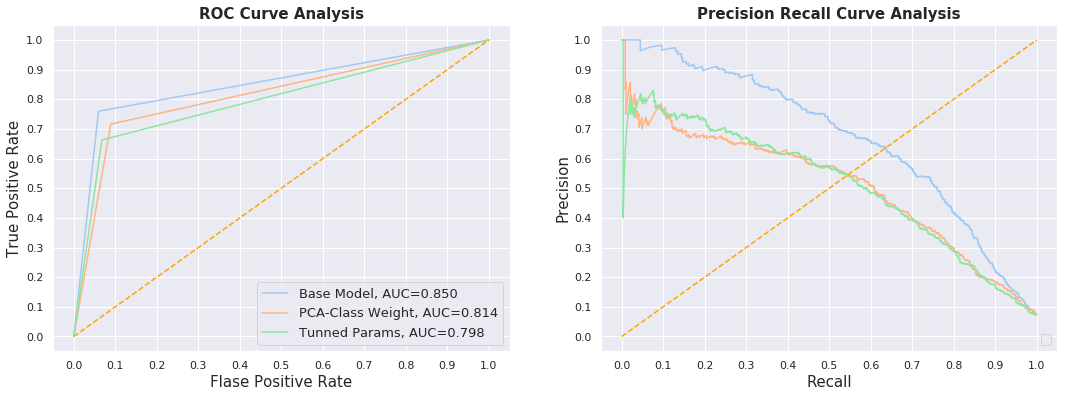

In [223]:
draw_roc_pr_curves(result_table)

In [224]:
LGBMClassifier=modelscores_df[modelscores_df['Algo'].str.contains("LGBMClassifier")]
LGBMClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC           Confusion Matrix
17  LGBMClassifier   NO            NO  Class Weight   0.497169  0.759516  0.927605  0.600958  0.850059  [[439, 139], [444, 7031]]
18  LGBMClassifier  YES            NO  Class Weight   0.383689  0.716263  0.897057  0.499698  0.813650  [[414, 164], [665, 6810]]
19  LGBMClassifier  YES           YES  Class Weight   0.431306  0.662630  0.913076  0.522510  0.797536  [[383, 195], [505, 6970]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **LightGBM has shown very good improvement in Precision, Accuracy and F1_Score compared to Default mode**
     


## <mark style="background:Black"><font color=white><b> **8.6 Bagging Classifier **</font></mark>

In [225]:
from sklearn.ensemble import BaggingClassifier 
from sklearn import tree
result_table = pd.DataFrame(columns = ['AlgoType' , 'fpr' ,  'tpr' ,'auc' , 'prec' , 'recall' ,       'aucpr' ])

## <mark style="background:Gold"><b> **8.x.1 BAGGING TREE ON DECISION TREE CLASSIFIER WITH BASE MODEL**</mark> 

In [226]:
%%time
# Adaboost with Default Parameters
DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
runid=modelscores_df.RunId.max()+1
model = BaggingClassifier(base_estimator = DT_HT, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"NO","NO","Class Weight",X_train_scaled, y_train,X_test_scaled,y_test,modelscores_df,"Base Model",runid,result_table)

Fit the model  BaggingClassifier
BaggingClassifier  Train roc-auc: 0.9479452985023951
Predict using the model
BaggingClassifier  Test  roc-auc: 0.9144199233893833
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 782 ms, sys: 7.93 ms, total: 790 ms
Wall time: 787 ms


In [227]:
printmd("<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 77.163%
MODEL F1_Score      : 54.657%
MODEL PRECISION     : 42.315%
MODEL ACCURACY      : 90.811%
MODEL TRAIN ROC AUC SORE  : 94.795%
MODEL TEST ROC AUC SORE  : 84.514%


## <mark style="background:Gold"><b> **8.x.1 BAGGING TREE ON DECISION TREE CLASSIFIER PCA - CLASS WEIGHT**</mark>  

In [228]:
%%time
# Adaboost with Default Parameters

DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44) 
runid=modelscores_df.RunId.max()+1
model = BaggingClassifier(base_estimator = DT_HT, random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","NO","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"PCA-Class Weight",runid,result_table)

Fit the model  BaggingClassifier
BaggingClassifier  Train roc-auc: 0.9338324680245605
Predict using the model
BaggingClassifier  Test  roc-auc: 0.8786316556919835
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 1.37 s, sys: 3.79 ms, total: 1.38 s
Wall time: 1.38 s


In [229]:
printmd("<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 70.069%
MODEL F1_Score      : 43.974%
MODEL PRECISION     : 32.041%
MODEL ACCURACY      : 87.185%
MODEL TRAIN ROC AUC SORE  : 93.383%
MODEL TEST ROC AUC SORE  : 79.289%


## <mark style="background:Gold"><b> **8.5.3 BAGGING TREE - DECISION TREE with HYPERTUNNING MODEL**</mark>

#### Adaboost - HyperTuning n_estimators

In [230]:
%%time
# GridSearchCV to find optimal parametes
# Create a based model 
DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
 
# parameters to build the model on
# Create the parameter grid based on the results of random search 
param_grid = {
   'n_estimators': range(10,200,10) 
}

scoring_met=['precision','recall','f1']

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs =-1,verbose = 1,scoring = scoring_met,refit='f1')
    
# Fit the grid search to the data
grid_search=grid_search.fit(X_train_pca, y_train)

hyper_dict["BGC_estimator"] = grid_search.best_params_['n_estimators']

hyper_dict["BGC_estimator"] =  grid_search.best_params_['n_estimators']
print('*************************************************')
print("the best value for n_estimators = ",grid_search.best_params_['n_estimators'])
print('************************************************')

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  2.6min finished


*************************************************
the best value for n_estimators =  170
************************************************
CPU times: user 22.4 s, sys: 24.4 ms, total: 22.5 s
Wall time: 3min


In [231]:
%%time
# Adaboost with Default Parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

DT_HT = DecisionTreeClassifier( class_weight='balanced',  criterion='gini',  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44) 
runid=modelscores_df.RunId.max()+1
model = BaggingClassifier(base_estimator = DT_HT,n_estimators=hyper_dict["BGC_estimator"] ,random_state = 44)
modelscores_df,result_table = fitPred_evalmodel(model,"YES","YES","Class Weight",X_train_pca, y_train,X_test_pca,y_test,modelscores_df,"Tunned Params",runid,result_table)

Fit the model  BaggingClassifier
BaggingClassifier  Train roc-auc: 0.9419175499566642
Predict using the model
BaggingClassifier  Test  roc-auc: 0.8891467521496105
**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##
CPU times: user 24.2 s, sys: 0 ns, total: 24.2 s
Wall time: 24.2 s


In [232]:
printmd("<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>")  
row = modelscores_df.loc[modelscores_df['RunId'] == modelscores_df.RunId.max() ]

print("MODEL RECALL        : {:2.3%}".format(row['Recall'].values[0]))
print("MODEL F1_Score      : {:2.3%}".format(row['F1_score'].values[0])) 
print("MODEL PRECISION     : {:2.3%}".format(row['Precision'].values[0]))
print("MODEL ACCURACY      : {:2.3%}".format(row['Accuracy'].values[0])) 
print("MODEL TRAIN ROC AUC SORE  : {:2.3%}".format(row['Train_ROC_AOC'].values[0])) 
print("MODEL TEST ROC AUC SORE  : {:2.3%}".format(row['ROC_AUC'].values[0]))

<mark style=background:GOLD><font color=BLACK>** BAGGING TREE ON DECISION TREE CLASSIFIER  BASE MODEL SCORE DETAILS ARE SHOWN BELOW**</MARK>

MODEL RECALL        : 71.453%
MODEL F1_Score      : 46.879%
MODEL PRECISION     : 34.882%
MODEL ACCURACY      : 88.377%
MODEL TRAIN ROC AUC SORE  : 94.192%
MODEL TEST ROC AUC SORE  : 80.569%


No handles with labels found to put in legend.


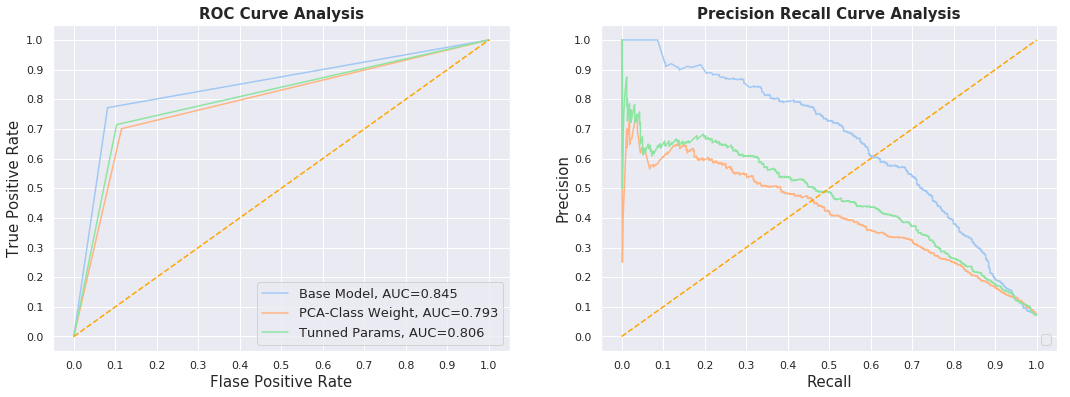

In [233]:
draw_roc_pr_curves(result_table)

In [234]:
BaggingClassifier=modelscores_df[modelscores_df['Algo'].str.contains("BaggingClassifier")]
BaggingClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA Tunned_params    Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC           Confusion Matrix
20  BaggingClassifier   NO            NO  Class Weight   0.423150  0.771626  0.908109  0.546569  0.845144  [[446, 132], [608, 6867]]
21  BaggingClassifier  YES            NO  Class Weight   0.320411  0.700692  0.871849  0.439739  0.792888  [[405, 173], [859, 6616]]
22  BaggingClassifier  YES           YES  Class Weight   0.348818  0.714533  0.883770  0.468785  0.805695  [[413, 165], [771, 6704]]

#### <mark style="background:Lime"><b> OBSERVATIONS: </b></mark>
- **The Tuned Model looks to perform better than default medal** 


### <mark style="background:Gold"><font color=Black><b> **Tuned Hyperparametes are:**</font></mark> 

## <mark style="background:black"><font color=white><b> **9 Evaluate the Model for Different Class Imbalance techniques**</font></mark> 

For tuned Parameters we will run the following Class Imbalance techniques:
<ol><li>SMOTE</li><li>RandomUndersampling</li><li>RandomOversampling</li></ol>


And compare with Class Balance weight

In [ ]:
# Dataframes for samplings
Samplescores=[]
Samplescores_df = pd.DataFrame(columns = ["RunId",'Algo', 'Sampletype','Accuracy',
                                    'Precision',"Recall","ROC_AUC","Specificity","Sensitivity","F1_score","Confusion Matrix","Param_Grid"])
 

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

from lightgbm import LGBMClassifier


In [238]:
%%time
print('*****************LOGISTIC REGRESSION**********************')
runid=1
Algotype='LogisticRegression'
model =  LogisticRegression(C = hyper_dict["LR_C"],penalty = hyper_dict["LR_penalty"] , 
                            solver=hyper_dict["LR_solver"] , n_jobs = -1,random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)

print('*****************DECISION TREE**********************')
runid=modelscores_df.RunId.max()+1
Algotype='DecisionTreeClassifier'
model =  DecisionTreeClassifier(   criterion=hyper_dict["DT_criterion"],  
                                max_depth= hyper_dict["DT_max_depth"] ,    
                                max_features=hyper_dict["DT_max_features"] ,   
                                min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   
                                min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)
print('*****************RANDOM FOREST**********************')
runid=modelscores_df.RunId.max()+1
Algotype='RandomForestClassifier'
model = model = RandomForestClassifier(class_weight='balanced',n_estimators = hyper_dict["RFC_estimator"],max_depth =hyper_dict["RFC_maxdepth"] ,max_features=hyper_dict["RFC_maxfeatures"], min_samples_split = hyper_dict["RFC_minsamplessplit"], min_samples_leaf = hyper_dict["RFC_minsamplesleaf"], random_state = 44)


modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)

print('***********************ADABOOST******************')
runid=modelscores_df.RunId.max()+1
DT_HT = DecisionTreeClassifier(  criterion=hyper_dict["DT_criterion"],  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
Algotype='AdaBoostClassifier'
runid=modelscores_df.RunId.max()+1
model = AdaBoostClassifier(base_estimator = DT_HT,learning_rate=hyper_dict["ABC_learningrate"] ,
                           n_estimators=hyper_dict["ABC_estimator"] ,random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)
print('***********************XGBOOST******************')

Algotype='XGBClassifier'
runid=modelscores_df.RunId.max()+1
model = model = XGBClassifier(n_jobs = -1, max_depth =  hyper_dict["XGB_maxdepth"] ,
                        n_estimators = hyper_dict["XGB_estimator"],min_child_weight =  hyper_dict["XGB_minchildwt"],
                      subsample =  hyper_dict["XGB_subsample"] ,  random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)

print('***********************lgbm******************')
 
# LGBMClassifier with Default Parameters
Algotype='LGBMClassifier'
runid=modelscores_df.RunId.max()+1
model =LGBMClassifier(n_estimators=  hyper_dict["LGB_estimator"],
                      max_depth =  hyper_dict["LGB_maxdepth"] ,  num_leaves =  hyper_dict["LGB_numleaves"] ,
                      min_child_samples =  hyper_dict["LGB_minchildsamples"] , 
                      subsample =  hyper_dict["LGB_subsample"] ,learning_rate =  hyper_dict["LGB_learningrate"] ,colsample_bytree =  hyper_dict["LGB_colsamplebytree"] , objective = 'binary', n_jobs = -1, random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)
 

*****************LOGISTIC REGRESSION**********************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
*****************DECISION TREE**********************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
*****************RANDOM FOREST**********************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
***********************ADABOOST******************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
***********************XGBOOST******************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
***********************lgbm******************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnde

In [245]:
%%time
from sklearn.ensemble import BaggingClassifier 
from sklearn import tree
 
print('***********************BAGGING******************')  
# Adaboost with Default Parameters
Algotype='BaggingClassifier'
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

DT_HT = DecisionTreeClassifier( criterion=hyper_dict["DT_criterion"],  max_depth= hyper_dict["DT_max_depth"] ,    max_features=hyper_dict["DT_max_features"] ,   min_samples_leaf= hyper_dict["DT_min_samples_leaf"],   min_samples_split= hyper_dict["DT_min_samples_split"],  random_state = 44)
 
runid=modelscores_df.RunId.max()+1
model = BaggingClassifier(base_estimator = DT_HT,n_estimators=hyper_dict["BGC_estimator"],random_state = 44)
modelscores_df,result_table = modelfit_predict(model,X_train_pca, y_train,X_test_pca,y_test,modelscores_df,Algotype)

***********************BAGGING******************
Blancing the class using:  SMOTE
Blancing the class using:  RandomUnderSampler
Blancing the class using:  RandomOverSampler
CPU times: user 2min 4s, sys: 0 ns, total: 2min 4s
Wall time: 2min 4s


In [257]:
LogisticRegression=modelscores_df[modelscores_df['Algo'].str.contains("LogisticRegression")]
LogisticRegression[['Algo', 'Sampletype','Accuracy', 'Precision',"Recall","ROC_AUC","F1_score","Confusion Matrix"]]


Algo          Sampletype  Accuracy  Precision    Recall   ROC_AUC  F1_score            Confusion Matrix
0   LogisticRegression        Class Weight  0.846393   0.292898  0.806228  0.827863  0.429691  [[466, 112], [1125, 6350]]
1   LogisticRegression        Class Weight  0.801068   0.237166  0.799308  0.800256  0.365796  [[462, 116], [1486, 5989]]
2   LogisticRegression        Class Weight  0.798212   0.234399  0.799308  0.798718  0.362495  [[462, 116], [1509, 5966]]
23  LogisticRegression               SMOTE  0.808891   0.243733  0.790657  0.800479  0.372605  [[457, 121], [1418, 6057]]
24  LogisticRegression  RandomUnderSampler  0.789892   0.227228  0.802768  0.795832  0.354198  [[464, 114], [1578, 5897]]
25  LogisticRegression   RandomOverSampler  0.798088   0.234280  0.799308  0.798651  0.362353  [[462, 116], [1510, 5965]]

### <mark style="background:Gold"><b> **Observation**</mark>
- **SMOTE looks good from Accuracy and Precision perspective**

In [258]:
DecisionTreeClassifier=modelscores_df[modelscores_df['Algo'].str.contains("DecisionTreeClassifier")]
DecisionTreeClassifier[['Algo', 'Sampletype','Accuracy', 'Precision',"Recall","ROC_AUC","F1_score","Confusion Matrix"]]



Algo          Sampletype  Accuracy  Precision    Recall   ROC_AUC  F1_score            Confusion Matrix
3   DecisionTreeClassifier        Class Weight  0.922265   0.458042  0.453287  0.705908  0.455652   [[262, 316], [310, 7165]]
4   DecisionTreeClassifier        Class Weight  0.908605   0.353160  0.328720  0.641082  0.340502   [[190, 388], [348, 7127]]
5   DecisionTreeClassifier        Class Weight  0.818329   0.243478  0.726644  0.776031  0.364742  [[420, 158], [1305, 6170]]
26  DecisionTreeClassifier               SMOTE  0.826648   0.250000  0.707612  0.771733  0.369467  [[409, 169], [1227, 6248]]
27  DecisionTreeClassifier  RandomUnderSampler  0.797591   0.215060  0.686851  0.746503  0.327558  [[397, 181], [1449, 6026]]
28  DecisionTreeClassifier   RandomOverSampler  0.809264   0.233593  0.726644  0.771148  0.353535  [[420, 158], [1378, 6097]]

### <mark style="background:Gold"><b> **Observation**</mark>
- **SMOTE looks good from Accuracy and Precision perspective**

In [259]:


RandomForestClassifier=modelscores_df[modelscores_df['Algo'].str.contains("RandomForestClassifier")]
RandomForestClassifier[['Algo', 'Sampletype','Accuracy', 'Precision',"Recall","ROC_AUC","F1_score","Confusion Matrix"]]



Algo          Sampletype  Accuracy  Precision    Recall   ROC_AUC  F1_score            Confusion Matrix
6   RandomForestClassifier        Class Weight  0.949460   0.787879  0.404844  0.698208  0.534857    [[234, 344], [63, 7412]]
7   RandomForestClassifier        Class Weight  0.934186   0.657895  0.173010  0.583027  0.273973    [[100, 478], [52, 7423]]
8   RandomForestClassifier        Class Weight  0.888985   0.359929  0.702422  0.802917  0.475967   [[406, 172], [722, 6753]]
29  RandomForestClassifier               SMOTE  0.856948   0.302069  0.757785  0.811200  0.431953  [[438, 140], [1012, 6463]]
30  RandomForestClassifier  RandomUnderSampler  0.823917   0.261092  0.794118  0.810169  0.392979  [[459, 119], [1299, 6176]]
31  RandomForestClassifier   RandomOverSampler  0.870607   0.325038  0.745675  0.812971  0.452731   [[431, 147], [895, 6580]]

### <mark style="background:Gold"><b> **Observation**</mark>
- **SMOTE is a clear winner**

In [260]:

SVC=modelscores_df[modelscores_df['Algo'].str.contains("SVC")]
SVC[['Algo', 'Sampletype','Accuracy', 'Precision',"Recall","ROC_AUC","F1_score","Confusion Matrix"]]


Algo    Sampletype  Accuracy  Precision    Recall   ROC_AUC  F1_score            Confusion Matrix
9   SVC  Class Weight  0.841922   0.278803  0.757785  0.803107  0.407631  [[438, 140], [1133, 6342]]
10  SVC  Class Weight  0.819198   0.247701  0.745675  0.785279  0.371872  [[431, 147], [1309, 6166]]
11  SVC  Class Weight  0.865143   0.300940  0.664360  0.772514  0.414239   [[384, 194], [892, 6583]]

### <mark style="background:Gold"><b> **Observation**</mark>
- **SVM Class weight is a clear winner**

In [261]:


AdaBoostClassifier=modelscores_df[modelscores_df['Algo'].str.contains("AdaBoostClassifier")]
AdaBoostClassifier[['Algo', 'Sampletype','Accuracy', 'Precision',"Recall","ROC_AUC","F1_score","Confusion Matrix"]]


Algo          Sampletype  Accuracy  Precision    Recall   ROC_AUC  F1_score            Confusion Matrix
12  AdaBoostClassifier        Class Weight  0.917422   0.402685  0.311419  0.637850  0.351220   [[180, 398], [267, 7208]]
13  AdaBoostClassifier        Class Weight  0.883770   0.304585  0.482699  0.698741  0.373494   [[279, 299], [637, 6838]]
32  AdaBoostClassifier               SMOTE  0.867627   0.302908  0.648789  0.766669  0.412996   [[375, 203], [863, 6612]]
33  AdaBoostClassifier  RandomUnderSampler  0.807401   0.238581  0.768166  0.789300  0.364084  [[444, 134], [1417, 6058]]
34  AdaBoostClassifier   RandomOverSampler  0.895815   0.334601  0.456747  0.693257  0.386247   [[264, 314], [525, 6950]]

### <mark style="background:Gold"><b> **Observation**</mark>
- ** RandomUndersample has good Recall overall SMote is better

In [253]:


XGBClassifier=modelscores_df[modelscores_df['Algo'].str.contains("XGBClassifier")]
XGBClassifier[['Algo','PCA','Tunned_params','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]


Algo  PCA Tunned_params          Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC            Confusion Matrix
14  XGBClassifier   NO            NO        Class Weight   0.734211  0.482699  0.950329  0.582463  0.734594   [[279, 299], [101, 7374]]
15  XGBClassifier  YES            NO        Class Weight   0.643087  0.346021  0.939277  0.449944  0.665586   [[200, 378], [111, 7364]]
16  XGBClassifier  YES           YES        Class Weight   0.602817  0.370242  0.937290  0.458735  0.675690   [[214, 364], [141, 7334]]
35  XGBClassifier  YES          None               SMOTE   0.390955  0.673010  0.901279  0.494596  0.795970   [[389, 189], [606, 6869]]
36  XGBClassifier  YES          None  RandomUnderSampler   0.241724  0.795848  0.806159  0.370818  0.801402  [[460, 118], [1443, 6032]]
37  XGBClassifier  YES          None   RandomOverSampler   0.491322  0.636678  0.926611  0.554635  0.792854   [[368, 210], [381, 7094]]

### <mark style="background:Gold"><b> **Observation**</mark>
- ** RandomOverSampler is a winner for XGB

In [262]:

LGBMClassifier=modelscores_df[modelscores_df['Algo'].str.contains("LGBMClassifier")]
LGBMClassifier[['Algo','PCA','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]



Algo  PCA          Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC            Confusion Matrix
17  LGBMClassifier   NO        Class Weight   0.497169  0.759516  0.927605  0.600958  0.850059   [[439, 139], [444, 7031]]
18  LGBMClassifier  YES        Class Weight   0.383689  0.716263  0.897057  0.499698  0.813650   [[414, 164], [665, 6810]]
19  LGBMClassifier  YES        Class Weight   0.431306  0.662630  0.913076  0.522510  0.797536   [[383, 195], [505, 6970]]
38  LGBMClassifier  YES               SMOTE   0.378788  0.692042  0.896436  0.489596  0.802141   [[400, 178], [656, 6819]]
39  LGBMClassifier  YES  RandomUnderSampler   0.272519  0.821799  0.829753  0.409306  0.826084  [[475, 103], [1268, 6207]]
40  LGBMClassifier  YES   RandomOverSampler   0.446408  0.655709  0.916925  0.531184  0.796417   [[379, 199], [470, 7005]]

### <mark style="background:Gold"><b> **Observation**</mark>
- ** RandomOversample is good

In [263]:

BaggingClassifier=modelscores_df[modelscores_df['Algo'].str.contains("BaggingClassifier")]
BaggingClassifier[['Algo','PCA','Sampletype','Precision','Recall','Accuracy','F1_score','ROC_AUC','Confusion Matrix']]

Algo  PCA          Sampletype  Precision    Recall  Accuracy  F1_score   ROC_AUC            Confusion Matrix
20  BaggingClassifier   NO        Class Weight   0.423150  0.771626  0.908109  0.546569  0.845144   [[446, 132], [608, 6867]]
21  BaggingClassifier  YES        Class Weight   0.320411  0.700692  0.871849  0.439739  0.792888   [[405, 173], [859, 6616]]
22  BaggingClassifier  YES        Class Weight   0.348818  0.714533  0.883770  0.468785  0.805695   [[413, 165], [771, 6704]]
41  BaggingClassifier  YES               SMOTE   0.297829  0.759516  0.854216  0.427875  0.810527  [[439, 139], [1035, 6440]]
42  BaggingClassifier  YES  RandomUnderSampler   0.262586  0.794118  0.825158  0.394669  0.810838  [[459, 119], [1289, 6186]]
43  BaggingClassifier  YES   RandomOverSampler   0.325094  0.750865  0.870235  0.453738  0.815165   [[434, 144], [901, 6574]]

### <mark style="background:Gold"><b> **Observation**</mark>
- ** RANDOMOversample is doing good for Bagging classifier**

## <mark style="background:black"><font color=white><b> **10 INFERENCE AND FEATURE IMPORTANCE**</font></mark> 
 
 
To understand the churn for the telecom company we have created the following classifier models 

1. Logistic Regression Model.
2. Support Vector Machine.
3. Decision Tree Classifier.
4. Random Forest Classifier.
5. Bagging classifier

Since the above models initially did not give the accurate parameters we have tuned the parameters using GridSearchCV and then tried predicting. Though scores were okie compared to base model. we  have applied the following boosting methods

1. AdaBoostClassifier.
2. Extreme Gradient Boosting with XGBoost.
3. Light Gradient Boosting Machine with LightGBM.

The above boosting models were initially created with default parameters which performed better than any of the logistic regression model , SVM model, the decision tree or the random forest classifier. The classification scores and metrics shoot up very high. 
We have also analysed different Class imbalance techniques. 

### <mark style="background:black"><font color=white><b> **10.1 RECOMMENDATION**</font></mark> 
    
<mark style="background:GOLD"> Considering the scores we arrived at we would suggest the **LightGBM model with RandomOversampling**</mark>


In [317]:
# Sampling through RandomOverSampler
sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train_pca, y_train)
 
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(34710, 30)
(34710, 1)


In [318]:
X=pd.DataFrame(data = X_train_pca)


In [319]:
model =  LGBMClassifier(n_estimators=  150, max_depth = 8 ,  num_leaves =  35, min_child_samples =  30 , 
                        subsample = 1 ,learning_rate =  0.1, colsample_bytree =  1.0 , objective = 'binary', _jobs = -1, random_state = 44)

model=model.fit(X_train_resampled,y_train_resampled)

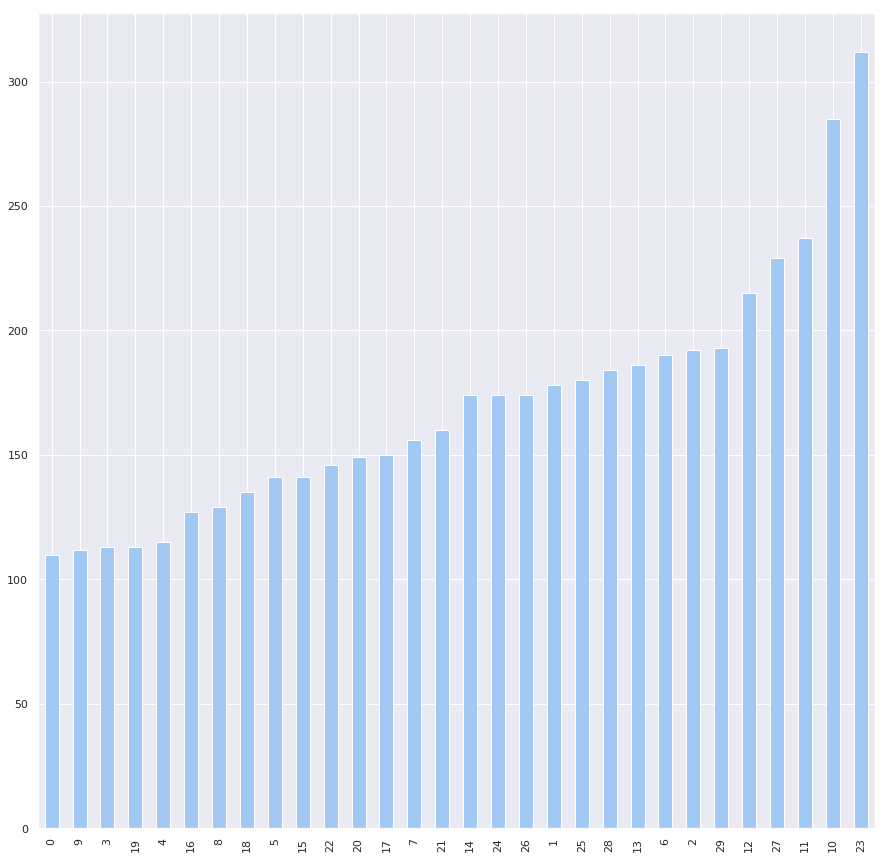

In [320]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='bar', align='center')

***********The End**************